In [1]:
import numpy as np # linear algebra
import os
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame
from netCDF4 import Dataset
from math import log10
from scipy import interpolate
from scipy.stats import variation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
##### read various files and variables
## model runs
file   = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40.nc')
file1  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_1_4.nc')
file2  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150.nc')
file3  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150.nc')
file4  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150.nc')
file5  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2.nc')
file6  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL.nc')
file7  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t.nc')

file00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60.nc')
file05 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va.nc')
file10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60.nc')
file20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW.nc')
file30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70.nc')
file40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200.nc')
file50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL.nc')
file60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t.nc')

##########
#color2 = ['k', 'b', 'tab:red', 'tab:green', 'tab:orange', 'deepskyblue', 'k', 'b', 'tab:red', 'tab:green', 'tab:orange']

#lb    = ['40-40to150', '40-40', 'M', '150-40', '40-150', 'MX3', '70-60', '250-60', '250-200', 'M', 'MX3']
#color2 = ['darkgoldenrod', 'crimson', 'slateblue',  'hotpink', 'forestgreen', 'deepskyblue', \
#          'hotpink',       'crimson', 'forestgreen', 'slateblue', 'deepskyblue']
#marker2 = ['o', 'x', 's', '*', '^', '+', 'o', 'x', 's', '*', '^', '+']

#color2= ['darkviolet', 'slateblue' , 'forestgreen', 'deepskyblue', 'hotpink'    ,  'tomato' , 'crimson', 'darkgoldenrod'\
#        , 'limegreen','forestgreen', 'darkviolet' ,'slateblue'   , 'deepskyblue', 'hotpink' , 'crimson', 'darkgoldenrod']

#color2= [myblue1     , myblue2  , mygreen2, 'deepskyblue', mypink    ,  myorange , myred,  'goldenrod'\
#        , mygreen, mygreen2, myblue1     , myblue2   , 'deepskyblue',  mypink, myred, 'goldenrod']

######
# from distinctipy import distinctipy
# c_org = distinctipy.get_colors(8)
# print(c_org)
# distinctipy.color_swatch(c_org)
#mygreen = (60/256, 180/256, 75/256)
#mygreen2= (0,1,0)
#mypink = (1, 0, 1)  
#myorange = (1, 0.5, 0) 
#myred = (0.8885918791878429, 0.004974868016797029, 0.1756185500416343)

####
myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)

lb    = [ '40-40-LD',  '40-40', '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD', 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD', '250-60', '70-60-LD'   , '70-60'      , '110-60'     , '250-200'  , 'MERRA'      , 'MERRAX3' ]

color2= ['crimson'  , 'tomato', 'forestgreen', 'deepskyblue', 'hotpink'    ,  myblue1   , 'darkviolet' , 'darkgoldenrod',\
         'crimson'  , 'tomato', 'forestgreen', 'limegreen'  , 'deepskyblue', 'hotpink'  , 'darkviolet' , 'darkgoldenrod']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [180, 130, 130, 130, 130, 130, 130, 130, 180, 130, 130, 130, 130, 130, 130, 130]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  ]
#alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6 , .6 ]

##########

#ls = ['-', '-', '-', '-', '-', '-']
#fn = [file, file1, file2, file3, file4, file5]
#NN = len(fn)
#cc = ['slateblue', 'forestgreen', 'hotpink', 'deepskyblue','crimson', 'darkgoldenrod']
#lb = ['40-40'    , '40-40to150' , '150-40' , '40-150'     , 'M'     , 'MX3'     ]
#lw = ['2', '2', '2', '2', '3', '2']

casename = 'CSET-RF06-Tr2.3-3D-Lx10-multi'
init_time = '2015-07-17 00Z' 
Obs_jump= 18
period   = ''
ylim = 4000
#xlim = 3.6

## SAM, ERA5, & aircraft days for plotting profiles:
pd__= [.74, 1.74, 2.74, 3.71]
pde = [.75, 1.75, 2.75, 3.71]
pda = [.74, 2.74]
###
idx_calday = 1

#####
blue1  = [204/255, 236/255, 251/255]
blue2  = [152/255, 214/255, 245/255]
blue3  = [110/255, 176/255, 221/255]
blue4  = [ 72/255, 146/255, 188/255]
green3 = [ 73/255, 166/255, 120/255]
green2 = [102/255, 189/255,  74/255]
green1 = [173/255, 209/255,  82/255]
yellow = [249/255, 208/255,  82/255]
orange1= [246/255, 142/255,  56/255]
orange2= [237/255,  88/255,  41/255]
red1   = [219/255,  50/255,  40/255]
red2   = [192/255,  28/255,  36/255]
red3   = [158/255,  23/255,  28/255]
purple = [140/255,  35/255, 204/255]

#colors = ListedColormap(['white', blue1, blue2, blue3, blue4, green3, green2, green1, yellow, orange1, orange2, red1, red2, red3, purple])
colors = ListedColormap([blue1, blue2, blue3, blue4, green3, green2, green1, yellow, orange1, orange2, red1, red2, red3, purple])


In [3]:
###############################################################
## Define required functions for calculations of variables:

### Calculate inversion height (min of dtheta/dz * dRH/dz)

## find delta after calculating mid-point values
def delta(THETA):
    nz = THETA.shape[1]
    THETAi = np.arange(THETA.shape[0] * (nz+1)).reshape(THETA.shape[0], nz+1).astype(float)
    THETAi[:] = np.nan
    THETAi[:,0] = 0
    THETAi[:,1:nz] = 0.5 * (THETA[:,:nz-1] + THETA[:,1:nz])
    THETAi[:,nz] = 1.5 * THETA[:,nz-1] - 0.5 * THETA[:,nz-2]
    d_THETA = THETAi[:,1:] - THETAi[:,:-1]
    return d_THETA

def inv_h(THETA, RH, dzz, zz):        
#    d_THETA = delta(THETA)
#    d_RH = delta(RH)
    d_THETA = THETA[:,1:] - THETA[:,:-1]
    d_RH = RH[:,1:] - RH[:,:-1]

    ZINV = d_THETA[:,0].copy()
    ZINV[:] = np.nan
    for i in range(d_THETA.shape[0]):
        z  = zz[i,:]  if len(zz.shape) > 1 else zz
        dz = dzz[i,:] if len(zz.shape) > 1 else dzz
        dTHETA_dz = d_THETA[i,:] / dz[1:]
        dRH_dz = d_RH[i,:] / dz[1:]
        dTHETA_dz[dTHETA_dz < 0] = 0
        dRH_dz[dRH_dz > 0] = 0    
        func = dTHETA_dz * dRH_dz
        if len(zz.shape) > 1:
            indx = np.max(np.where(func == np.nanmin(func))[0])
        else:
            indx = np.min(np.where(func == np.nanmin(func))[0])                    
        # approximate func as a parabola around the minimum and find the height where that parabola is minimized. 
        # This will allow the inversion height to vary continuously as the input profiles change.
        # inversion_test is defined at midpoints of grid
        zavg = 0.5 * (z[:-1] + z[1:])
        rnge = range(indx-1, indx+2)
        # we define the parabola, converting from m to km.
        pp = np.polyfit(1e-3 * zavg[rnge], func[rnge], 2)
        # take the derivative of the parabola in coeffient space.
        pp_prime = np.array([2 * pp[0], pp[1]]) # this is its derivative
        # find the zero-crossing of the derivative. This is the inversion height in meters
        z_inv = -1e3 * pp_prime[1] / pp_prime[0]         
        ZINV[i] = z_inv
    return ZINV

# calc. Accumulated Precip.
def calc_acc_R(R):
    acc_R = R.copy()
    acc_R[:] = np.nan
    for i in range(len(acc_R)):
        acc_R[i] = np.nansum(R[:i+1]) / (time[-1] * 24) 
    return acc_R

# Calc. LTS
def calc_LTS(THETA, P):
    indx = np.where((P <= 701) & (P >= 699))[0]
    
    theta_700 = np.nanmean(THETA[:,indx], 1)
    theta_sfc = THETA[:, 0]
    LTS = theta_700 - theta_sfc
    return LTS

def mbl_ave_N(NA, RHO, dz, inv_idx):
#    integ_NA_BL = np.arange(NAd[:,0].size)
    integ_NA_BL = NA[:,0].copy()    
    integ_NA_BL[:] = np.nan
    for i in range(NA[:,0].size):
        dz2 = dz.copy()
        mmm = np.where(np.isnan(NA[i,:]) == 1)[0]
        if len(mmm) > 0:
            dz2[mmm] = np.nan
        mmm2 = np.where(NA[i,:] <= 1)[0]
        if (len(mmm2) > 0 and len(mmm2) != len(NA)):
            dz2[mmm2] = np.nan            
        integ_NA_BL[i] = np.nansum(RHO[i,:inv_idx[i]] * dz2[:inv_idx[i]] * NA[i,:inv_idx[i]]) / np.nansum(RHO[i,:inv_idx[i]] * dz2[:inv_idx[i]])
    return integ_NA_BL

def mbl_ave_flight(RFin_alt, RFin_N, RFin_RHO, iii, ZINV):
    if iii >= len(ZINV):
        jjj = np.where(abs(RFin_alt - ZINV[-1]) == np.nanmin(abs(RFin_alt - ZINV[-1])))[0][0]
    else:
        jjj = np.where(abs(RFin_alt - ZINV[iii]) == np.nanmin(abs(RFin_alt - ZINV[iii])))[0][0]
    RFin_alt_diff = RFin_alt[:-1] - RFin_alt[1:]
    RFin_alt_diff2= RFin_alt_diff.copy()
    mmm = np.where(np.isnan(RFin_N[1:]) == 1)[0]
    RFin_alt_diff2[mmm] = np.nan
    mmm2 = np.where(RFin_N[1:] <= .5)[0]
    RFin_alt_diff2[mmm2] = np.nan
    RFin_N_mean = np.nansum(RFin_RHO[jjj:] * RFin_N[jjj:] * RFin_alt_diff2[jjj-1:]) / np.nansum(RFin_alt_diff2[jjj-1:] * RFin_RHO[jjj:])
    return RFin_N_mean

def mbl_ave_MERRA(MERRA_Na, ZINV, MERRA_H, iii_MERRA, MERRA_RHO):
    MERRA_Na_mean2 = MERRA_Na[:,0].copy()
    MERRA_Na_mean2[:] = np.nan
    for i in range(MERRA_Na_mean2.size):
        MERRA_Na_mean2[i] = mbl_ave_flight(MERRA_H[i,:], MERRA_Na[i,:], MERRA_RHO[i,:], iii_MERRA[i], ZINV)
    return MERRA_Na_mean2

## MERRA2 Forcing
#def calc_Forcing_RHO(MERRA_H, MERRA_RHO, z_forc, iii):
#    Forcing_RHO = z_forc.copy()
#    Forcing_RHO[:] = np.nan    
#    for i in range(z_forc.shape[0]):
#        f_RHO = interpolate.interp1d(MERRA_H[iii[i],:], MERRA_RHO[iii[i],:])
#        indx2 = np.where(z_forc[i,:] > MERRA_H[iii[i],:].max())[0]
#        if len(indx2) > 0:
#            indx = indx2[-1]
#            Forcing_RHO[i, indx+1:] = f_RHO(np.array(z_forc[i, indx+1:]))
#            Forcing_RHO[i, :indx+1] = Forcing_RHO[i, indx+1]
#        else:
#            Forcing_RHO[i, :] = f_RHO(np.array(z_forc[i,:]))
#    return Forcing_RHO

def calc_Forcing_RHO(z, RHO, MERRA_H, iii):
    Forcing_RHO = MERRA_H.copy()
    Forcing_RHO[:] = np.nan    
    for i in range(MERRA_H.shape[0]):
        f_RHO = interpolate.interp1d(z[::-1], RHO[iii[0],:][::-1])
        indx2 = np.where(MERRA_H[i,:] > z.max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            Forcing_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
            Forcing_RHO[i, :indx+1] = Forcing_RHO[i, indx+1]
        else:
            Forcing_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
    return Forcing_RHO


def mbl_ave_Forcing(z_forc, MERRA_Na, Forcing_RHO, iii_Forcing, ZINV):
    MERRA_Na_mean2 = MERRA_Na[:,0].copy()
    MERRA_Na_mean2[:] = np.nan
    for i in range(MERRA_Na_mean2.size):
        MERRA_Na_mean2[i] = mbl_ave_flight(z_forc[i,:,0,0], MERRA_Na[i,:], Forcing_RHO[i,:], iii_Forcing[i], ZINV)
    return MERRA_Na_mean2

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [4]:
def read_model_vars(file):
    ## model variables:
    TIME = file.variables['time'][:]
    #lat_mg, lon_mg = np.meshgrid(lat, lon) # making meshgrid
    # 1-D variables
    z       = file.variables['z'][:]
    SST     = file.variables['SST'][:] - 273.15     # sea surface temperature converted from kelvin to celcius unit
    SSTOBS  = file.variables['SSTOBS'][:] - 273.15 
    PREC    = file.variables['PREC'][:]             # Surface Precipitation"  "mm/day" 
    LHF     = file.variables['LHF'][:]
    LHFOBS  = file.variables['LHFOBS'][:]
    SHF     = file.variables['SHF'][:]
    SHFOBS  = file.variables['SHFOBS'][:]
    Ps      = file.variables['Ps'][:]
    LWNS    = file.variables['LWNS'][:]
    SWNS    = file.variables['SWNS'][:]
    RWP     = file.variables['RWP'][:]       # Rain Water Path: g/m2
    CWP     = file.variables['CWP'][:]       # Cloud Water Path
    LWP     = file.variables['LWP'][:]       # GCSS Liquid Water Path
    MODISLWP= file.variables['MODISLWP'][:]
    CLDLOW  = file.variables['CLDLOW'][:]
    # SAM's CLDLOW variable uses a threshold for cloud fraction that is based on LWP (20 g/m2, when CEM=.true., as in these runs) 
    # which may not be consistent with an optical-depth-based threshold, as would be used in a satellite product.
    CLDMID  = file.variables['CLDMID'][:]
    CLDHI   = file.variables['CLDHI'][:]
    MODISREL= file.variables['MODISREL'][:]   # MODIS Effective Radius (Liquid): mkm
    ISCCPLOW= file.variables['ISCCPLOW'][:] 
    # The ISCCP simulator approximates the cloud fraction that would be observed by a satellite using an optical depth threshold
    # of 0.3. The model domain includes only the lower troposphere, so that the relevant ISCCPTOT and ISCCPLOW should be identical.  
    ISCCPTOT= file.variables['ISCCPTOT'][:] # 
    ZINV_org= file.variables['ZINV'][:]       # inversion height (km)
    WMAX    = file.variables['WMAX'][:]       # max updraft vel. (m/s)
    LWNTOA  = file.variables['LWNTOA'][:]     # Net LW flux at TOA (w/m2)
    SWNTOA  = file.variables['SWNTOA'][:]     # Net SW flux at TOA (w/m2)
    SOLIN   = file.variables['SOLIN'][:]      # Incoming SW flux at TOA (w/m2)
    ISCCPALB= file.variables['ISCCPALB'][:]   # ISCCP Cloud Albedo
    SWNTOAC = file.variables['SWNTOAC'][:]    # Net SW flux at TOA (Clear Sky)
    LWNTOAC = file.variables['LWNTOAC'][:]    # Net LW flux at TOA (Clear Sky)
    MODISTAU= file.variables['MODISTAU'][:]   # MODIS Cloud Optical Path
    ISCCPTAU= file.variables['ISCCPTAU'][:]   # ISCCP Optical Path
    TAUQCacc= file.variables['TAUQC'][:]      # Approx optical depth of cloud liquid water
    TAUQRacc= file.variables['TAUQR'][:]      # Approx optical depth of RAIN
    QCOEFFR = file.variables['QCOEFFR'][:]    # Mixing ratio of QC over effective radius, EFFR = QC/QCOEFFR: g/kg/micro

    time = TIME - int(TIME[0])
    SOLIN2 = SOLIN.copy()
    SOLIN2[SOLIN2 <= 100] = np.nan
    albedo = (SOLIN2 - SWNTOA) / SOLIN2
    albd_clear = (SOLIN2 - SWNTOAC) / SOLIN2
    SW_CRE = SWNTOA - SWNTOAC
    LW_CRE =-LWNTOA + LWNTOAC
    net_CRE = SW_CRE + LW_CRE

    #2-D variables:
    NAd    = file.variables['NAd'][:]      # dry aerosol number concentration (#/mg)
    NC     = file.variables['NCCLD'][:]    # cloud number concentration in cloud
    NCORIG = file.variables['NC'][:]       # cloud number concentration
    NR     = file.variables['NRCLD'][:]    # RAIN NUMBER CONCENTRATION in cloud
    NRORIG = file.variables['NR'][:]       # RAIN NUMBER CONCENTRATION
    RHO    = file.variables['RHO'][:]      # kg/m3
    CLD    = file.variables['CLD'][:]      # cloud Fraction
#    CLDCUMDN=file.variables['CLDCUMD1'][:] # Cumulative Shaded Cloud Fraction, Computed Downwards
    RWC    = file.variables['QPCLD'][:]    # rain water and snow content: g/kg
    CWC    = file.variables['QNCLD'][:]    # cloud water and cloud ice content in cloud: g/kg
    QCCLD  = file.variables['QCCLD'][:]    # Cloud liquid water mixing ratio in cloud
    QCOND  = file.variables['QCOND'][:]    # Total Condensate: g/kg
    WOBS   = file.variables['WOBS'][:]     # large scale W: m/s
    TABS   = file.variables['TABS'][:]     # Absolute temperature: K
    QT     = file.variables['QT'][:]       # Total water (no rain/snow included): g/kg
    QV     = file.variables['QV'][:]       # Water vapor: g/kg
    RH     = file.variables['RELH'][:]     # RH: %
    THETA  = file.variables['THETA'][:]    # THETA: K
    U      = file.variables['U'][:]        # x wind component: m/s
    V      = file.variables['V'][:]        # y wind component: m/s
    P      = file.variables['p'][:]        # pressure
    PRECIP = file.variables['PRECIP'][:]   # precipitation flux: mm/day
    W2     = file.variables['W2'][:]       # Variance of the z wind component: m2/s2
    THETAL = file.variables['THETAL'][:]    # Liquid water potential temperature: K

    QAd    = file.variables['QAd'][:] # DRY AEROSOL MASS: g/kg
    QAw    = file.variables['QAw'][:] # WET AEROSOL MASS
    QCORIG = file.variables['QC'][:] # Cloud liquid water mass mixing ratio: g/kg
    QRORIG = file.variables['QR'][:] # RAIN
    QAr    = file.variables['QAr'][:] # RAIN AEROSOL MASS
    QA     = QAd + QAw + QCORIG + QRORIG + QAr

    # Aerosol budget terms:
    # NAd:
    # NC:
    NCSTRG  = file.variables['NCSTRG'][:] # Storage of Cloud Water NUMBER CONCENTRATION: #/mg/day
    NCADV   = file.variables['NCADV'][:]  # Tendency of Cloud Water NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
    NCDIFF  = file.variables['NCDIFF'][:] # Tendency of Cloud Water NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
    NCLSADV = file.variables['NCLSADV'][:]# Tendency of Cloud Water NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
    NCSED   = file.variables['NCSED'][:]  # Tendency of Cloud Water NUMBER CONCENTRATION due to sedimentation: #/mg/day
    NCMPHY  = file.variables['NCMPHY'][:] # Tendency of CLOUD WATER NUMBER CONCENTRATION due to microphysical processes: #/mg/day
    NCFLXS  = file.variables['NCFLXS'][:] # Subgrid flux of CLOUD WATER NUMBER CONCENTRATION: #/mg/day
    # NAd:
    try:
        NAdSTRG = file.variables['NAcSTRG'][:] - NCSTRG  # Storage of DRY AEROSOL NUMBER CONCENTRATION: #/mg/day
        NAdADV  = file.variables['NAcADV'][:] - NCADV    # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
        NAdDIFF = file.variables['NAcDIFF'][:] - NCDIFF  # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
        NAdLSADV= file.variables['NAcLSADV'][:] - NCLSADV# Tendency of DRY AEROSOL NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
        NAdSED  = file.variables['NAcSED'][:] - NCSED    # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to sedimentation: #/mg/day
        NAdMPHY = file.variables['NAcMPHY'][:] - NCMPHY  # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to microphysical processes: #/mg/day
        NAdFLXS = file.variables['NAcFLXS'][:] - NCFLXS  # Subgrid flux of DRY AEROSOL NUMBER CONCENTRATION: #/m2/s
    except:
        NAdSTRG = file.variables['NAdSTRG'][:] # Storage of DRY AEROSOL NUMBER CONCENTRATION: #/mg/day
        NAdADV  = file.variables['NAdADV'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
        NAdDIFF = file.variables['NAdDIFF'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
        NAdLSADV= file.variables['NAdLSADV'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
        NAdSED  = file.variables['NAdSED'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to sedimentation: #/mg/day
        NAdMPHY = file.variables['NAdMPHY'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to microphysical processes: #/mg/day
        NAdFLXS = file.variables['NAdFLXS'][:] # Subgrid flux of DRY AEROSOL NUMBER CONCENTRATION: #/m2/s
    SCVTNADC= file.variables['SCVTNADC'][:]          # Tendency of NAD due to interstitial scavenging by cloud: #/mg/day
    SCVTNADR= file.variables['SCVTNADR'][:]          # Tendency of NAD due to interstitial scavenging by rain: #/mg/day
    # NR:
    NRSTRG  = file.variables['NRSTRG'][:]    # Storage of Rain NUMBER CONCENTRATION: #/mg/day
    NRADV   = file.variables['NRADV'][:]     # Tendency of Rain NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
    NRDIFF  = file.variables['NRDIFF'][:]    # Tendency of Rain NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
    NRLSADV = file.variables['NRLSADV'][:]   # Tendency of Rain NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
    NRSED   = file.variables['NRSED'][:]     # Tendency of Rain NUMBER CONCENTRATION due to sedimentation: #/mg/day
    NRMPHY  = file.variables['NRMPHY'][:]    # Tendency of Rain NUMBER CONCENTRATION due to microphysical processes: #/mg/day
    NCSTEN  = file.variables['NCSTEN'][:]    # CHANGE IN CLOUD DROPLET NUMBER DUE TO SEDIMENTATION: #/mg/day
    NRSTEN  = file.variables['NRSTEN'][:]    # CHANGE IN RAIN NUMBER DUE TO SEDIMENTATION: #/mg/day
    NPRA_pos= file.variables['NPRA'][:]      # CHANGE IN RAIN NUMBER DUE TO ACCRETION OF CLOUD DROPLETS: #/mg/day
    NPRC    = file.variables['NPRC'][:]      # CHANGE NC AUTOCONVERSION DROPLETS: #/mg/day
    NPRC1   = file.variables['NPRC1'][:]     # CHANGE NR AUTOCONVERSION DROPLETS: #/mg/day
    NCPOSLIM= file.variables['NCPOSLIM'][:]  # CHANGE IN CLOUD DROPLET NUMBER DUE TO POSITIVE LIMITING: #/mg/day
    NCNEGLIM= file.variables['NCNEGLIM'][:]  # CHANGE IN CLOUD DROPLET NUMBER DUE TO NEGATIVE LIMITING: #/mg/day
    NRPOSLIM= file.variables['NRPOSLIM'][:]  # CHANGE IN RAIN DROPLET NUMBER DUE TO POSITIVE LIMITING: #/mg/day
    NRNEGLIM= file.variables['NRNEGLIM'][:]  # CHANGE IN RAIN DROPLET NUMBER DUE TO NEGATIVE LIMITING: #/mg/day

    LWC = RWC + CWC
    time_mg, z_mg = np.meshgrid(time, z) # making meshgrid

    cld = CLDLOW.copy()
    cld[:] = np.nan
    for i in range(len(CLDLOW)):
        cld[i] = np.max(CLDLOW[i] + CLDMID[i] + CLDHI[i])

    # calculate accumulated precipitation    
    acc_prec = PREC.copy()
    acc_prec[:] = np.nan
    for i in range(len(acc_prec)):
        acc_prec[i] = np.nansum(PREC[:i+1]) / (time[-1] * 24) 

    # calculate surface wind magnitude
    sfc_wnd = (U[:,0] ** 2 + V[:,0] ** 2) ** 0.5
        
    # SAM outputs only give the heights of cell centers.  
    # To compute a vertical integral, you need the cell interface heights (i.e., the w levels):
    nz = len(z)
    zi = np.arange(nz+1).astype(float)
    zi[:] = np.nan
    zi[0] = 0
    zi[1:nz] = 0.5 * (z[:nz-1] + z[1:nz])
    zi[nz] = 1.5 * z[nz-1] - 0.5 * z[nz-2] 
    dz = zi[1:] - zi[:-1] # Compute the cell thicknesses

    ## Calc. inversion height
    #ZINV = inv_h(THETAL, RH, dz, z)
    dz3  = z.copy()
    dz3[:] = np.nan
    dz3[1:] = z[1:] - z[:-1]
    ZINV = inv_h(THETAL, RH, dz3, z)
    d_THETA = THETA[:,1:] - THETA[:,:-1]

    #################################
    ### calculate modeled CTH
    # correct method
#    SAM_CTH = CWP.copy()
#    SAM_CTH[:] = np.nan
#    for i in range(len(CWP)):
#        if np.nanmax(CLDCUMDN[i,:]) > 0:
#            tmp = CLDCUMDN[i,:] / np.nanmax(CLDCUMDN[i,:]) # normalize cumulative cloud fraction by its maxmimum value
#            idx = np.nanmax(np.where(tmp > 0.5)[0]) # median CTH: height where normalized cumulative cloud fraction crosses 0.5
#            SAM_CTH[i] = z[idx]

    #Calculate the index of BL:
    #method1: find index where z is equal to ZINV
    inv_idx = np.arange(len(ZINV))
    inv_idx[:] = int(0)
    for i in range(len(ZINV)):
        diff = abs(z - ZINV[i])
        inv_idx[i] = np.where(diff == np.min(diff))[0][0]  
    #method2: find infrc where RH goes below 75%
    inv_idx2 = np.arange(len(ZINV))
    inv_idx2[:] = int(0)
    for i in range(len(ZINV)):
        j = 0
        while (RH[i,j] > 75):
            j += 1
        inv_idx2[i] = j
    # Not very helpful method!

    # Calc. entrainment:
    entrainment = [] # np.arange(len(ZINV)) #entrainment[:] = int(0)
    for i in range(len(ZINV)):
        entrainment.append(-WOBS[i, inv_idx[i]])
    entrainment = np.array(entrainment) * 1000 # convert to mm/s
    
    # Marshall-Palmer and other R-Z relations
#    Z = 10 ** (rad_refl_all[:,0] / 10)
#    R_MP = (Z / 200) ** (1/1.6) * 24
#    acc_R_MP = calc_acc_R(R_MP)

#    R_C2004 = (Z / 57) ** (1/1.1) * 24
#    acc_R_C2004 = calc_acc_R(R_C2004)

    LTS = calc_LTS(THETA, P)
    
    #### MBL integral of number concentrations
    NA  = NAd + NCORIG + NRORIG
    #NA  = NAd + NC + NR

    integ_NAd_BL = mbl_ave_N(NAd, RHO, dz, inv_idx)   
    integ_NA_BL  = mbl_ave_N(NA,  RHO, dz, inv_idx)   
    integ_NC_BL  = mbl_ave_N(NC,  RHO, dz, inv_idx)   
    #integ_NR_BL  = mbl_ave_N(NR,  RHO, dz, inv_idx)   
    #You have z(1:nz) which are the heights of the cell centers.
    #Compute the interface heights between cells: zi(1) = 0; zi(2:nz) = 0.5*(z(1:nz-1)+z(2:nz)); zi(nz+1) = 1.5*z(nz) - 0.5*z(nz-1)
    #Compute the cell thicknesses: dz(1:nz) = zi(2:nz+1) - zi(1:nz)

    ####
    LWPCLD = mbl_ave_N(LWC, RHO, dz, inv_idx)   

    ### Entrainment and W_lg
    w_ls_inv = -entrainment
    winw   = 2
    entr = ZINV.copy()
    entr[:] = np.nan
    for i in range(len(time)):
        t_entr = 1 / 3
        tind = np.where(abs(time - time[i]) < t_entr / 2)[0]
        #print(tind)
        p = np.polyfit(time[tind], ZINV[tind], 1)
        entr[i] = 1e3 * p[0] / 86400 - w_ls_inv[i]
    entr = smooth(entr, winw)
    mean_entr= '{:.2f}'.format(np.nanmean(entr))

    #### Calculate turbulence w'2
    W2_Zinv_200    = W2[:,0].copy()
    W2_Zinv_200[:] = np.nan
    for i in range(W2[:,0].size):
        ix_w2 = np.where(abs(ZINV[i] - 200 - z) == np.nanmin(abs(ZINV[i] - 200 - z)))[0]
        W2_Zinv_200[i] = W2[i,ix_w2]

    ### Calculate COD and Re
    def calc_OD(var):
        OD    = var[:,0].copy()
        OD[:] = np.nan
        for i in range(len(OD)):
            idx = np.where(QCCLD[i,:] > 0.01)[0]
            try:
                OD[i] = TAUQCacc[i,np.nanmax(idx)] - TAUQCacc[i,np.nanmin(idx)]
            except:
                pass
        return OD

    rho_idx = 65
    re_2D   = QCORIG / QCOEFFR
    COD = calc_OD(TAUQCacc)
    ROD = calc_OD(TAUQRacc)
    SAM_re = (3. / 2.) * (CWP / ISCCPTOT) / (COD * RHO[:,rho_idx] / ISCCPTOT)

    
    #### Calculate budget terms for aerosol number concentration
    NASTOR  = NAdSTRG + NCSTRG + NRSTRG
    NAEDDY  = NAdADV + NCADV + NRADV + NAdDIFF + NCDIFF + NRDIFF
    NALSADV = NAdLSADV + NCLSADV + NRLSADV
    NASED   = NCSTEN + NRSTEN # NAdSED + NCSED + NRSED 
    NAMPHY  = NAdMPHY + NCMPHY + NRMPHY - NASED
    NASCAV  = - SCVTNADC - SCVTNADR

    NARC = - NPRC - NPRC1
    NPRA = - NPRA_pos
    NALIM = NCPOSLIM - NCNEGLIM + NRPOSLIM - NRNEGLIM
    #d NA = Srf Ad - (ScvCld Ad + ScvRn Ad) - Accr C +  SlfC R - Fallout R + (NMT Ad + NMT C + NMT R)
    NASTOR[NASTOR > 1000] = np.nan
    NASTOR[NASTOR < -1000]  = np.nan
    NARESID = NASTOR - NAEDDY - NALSADV - NASED - NAMPHY - NASCAV
    NARESID[NARESID > 1000] = np.nan
    NARESID[NARESID < -1000]  = np.nan    

    ####
    mass_1500 = np.arange(NAd[:,0].size).astype(float)
    mass_1500[:] = np.nan
    for i in range(NAd[:,0].size):
        mass_1500[i] = np.nansum( RHO[i,:115] * dz[:115] )

    NASURF_test = 86400 * NAdFLXS[:,0] / (mass_1500 * 1e6) # convert from #/m2/s to #/mg/day


    #########
    def height_Ave(var):
        integ_var = np.arange(var[:,0].size).astype(float)
        integ_var[:] = np.nan
        for i in range(var[:,0].size):
            integ_var[i] = np.nansum(dz[:inv_idx[i]+5] * RHO[i,:inv_idx[i]+5] * var[i,:inv_idx[i]+5]) / np.nansum(dz[:inv_idx[i]+5] * RHO[i,:inv_idx[i]+5])        
        return integ_var

    height_NASTOR  = height_Ave(NASTOR)
    height_NAEDDY  = height_Ave(NAEDDY) 
    height_NALSADV = height_Ave(NALSADV)
    height_NASED   = height_Ave(NASED)
    height_NAMPHY  = height_Ave(NAMPHY)
    height_NASCAV  = height_Ave(NASCAV)
    height_NARESID = height_Ave(NARESID)
    height_NARC    = height_Ave(NARC)
    height_NALIM   = height_Ave(NALIM)
    height_NPRA    = height_Ave(NPRA)

    MBL_mass = np.arange(NAd[:,0].size).astype(float)
    MBL_mass[:] = np.nan
    for i in range(NAd[:,0].size):
        MBL_mass[i] = np.nansum( RHO[i,:inv_idx[i]+5] * dz[:inv_idx[i]+5] )

    height_NASURF = 86400 * NAdFLXS[:,0] / (MBL_mass * 1e6) # convert from #/m2/s to #/mg/day
    height_ENTRNMT = height_NALSADV + height_NAEDDY - height_NASURF

    
    #globals().update(locals())
    return time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV

In [5]:
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(file)


upbound = time.copy()
upbound[:] = ylim
upbound[SWNS > 0] = np.nan

xlim = time[-1]

In [6]:
def read_obs_Tr2p3():

    Obs_jump   = 18
    idx_calday = 1
    
    ## obs and reanalysis
    forcing  = Dataset('../CSET_RF06_Tr2p3/Forcings_CSET_rf06_traj2p3_v1p2_2021-01-08_MERRA2loglogMBL.nc')
    ERA_data = Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF06_Tr2p3/rf06_ERA_data_2.3.nc')
    GOES_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF06_Tr2p3/GOES_rf06_rf07-2.3-2deg.nc')
    goes_data= Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/GOES/rf06_rf07-2.3-4deg.nc')
    RF_data  = Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF06_Tr2p3/RF06_135_140_AvgProfile.nc')
    RFin_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/CheyenneOutput/SimulatingCSETArchive_v1/Data/L06_Tr2p3/rf06_traj_2.3_initprofile.nc')
    RFrt_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/CheyenneOutput/SimulatingCSETArchive_v1/Data/L06_Tr2p3/rf07_traj_2.3_returnprofile.nc')
    MERRA_data =Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/All_but_GOES/rf06_72h_forward_2.3.nc')
    MERRA_datab=Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/All_but_GOES/rf06_48h_backward_2.3.nc')
    RFin_radar_df= pd.read_csv('~/RF06_radar.csv')
    RFrt_radar_df= pd.read_csv('~/RF07_radar.csv')

    ## variables in the forcing file:
    day   = forcing.variables['day'][:] 
    calday= forcing.variables['calday'][:] 
    lat   =  forcing.variables['lat'][:]             # Surface Latent Heat Flux:
    CTH   = forcing.variables['CTH'][:] * 1000       # MODIS cloud top height: converted to m
    qinit = forcing.variables['qinit'][:] * 1000     # Water Vapor Mass Mixing Ratio from Idealized Aircraft Sounding: converted to g/kg
    Tinit = forcing.variables['Tinit'][:]            # Absolute Temperature from Idealized Aircraft Sounding: K
    qref  = forcing.variables['qref'][:] * 1000      # Water Vapor Mass Mixing Ratio from from ERA-5: converted to g/kg
    Tref  = forcing.variables['Tref'][:]             # Absolute Temperature          from from ERA-5: K
    z_forc=  forcing.variables['z'][:]               # Geopotential height from ERA-5:
    shflx =  forcing.variables['shflx'][:]           # Surface Sensible Heat Flux:
    lhflx =  forcing.variables['lhflx'][:]           # Surface Latent Heat Flux:
    Na_accm_MERRA= forcing.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)

    fday = calday - int(calday[idx_calday])
    dummy, fday_mg = np.meshgrid(z_forc[0,:,0,0], fday) # making meshgrid

    ## GOES variables:
    GOES_time0= GOES_data.variables['time'][:] #
    GOES_time = (GOES_time0 + Obs_jump) / 24 # 15.667
    GOES_lwp_org = GOES_data.variables['cloud_lwp'][:] # 
    GOES_lat = GOES_data.variables['latitude'][:] 
    GOES_CTH = GOES_data.variables['cloud_top_height_median'][:]         #  median CTH: converted to m 
    # GOES WLCF might use an optical depth threshold that is close to 0.3
    GOES_LCC = GOES_data.variables['warm_low_cloud_fraction'][:] * 100    
    GOES_CC  = GOES_data.variables['cloud_fraction'][:] * 100  
    GOES_Nd  = GOES_data.variables['Nd_mean'][:]                         # mean cloud droplet number concentration: 1/cm3
    goes_albd= goes_data.variables['broadband_shortwave_albedo'][:] / 100
    goes_OLR = goes_data.variables['broadband_longwave_flux'][:] 
    goes_LCC = goes_data.variables['warm_low_cloud_flag'][:] * 100  
    goes_lwp = goes_data.variables['cloud_lwp_iwp'][:]                   # Liquid Water Path: g/m2
    goes_Nd  = goes_data.variables['Nd'][:]                              # cloud droplet number concentration: 1/cm3
    goes_re  = goes_data.variables['cloud_particle_size_median'][:]      # median effective particle radius: microns
    goes_cod = goes_data.variables['cloud_visible_optical_depth_median'][:] # median cloud optical depth
    goes_CTH = goes_data.variables['cloud_top_height'][:]                   #  median CTH: converted to m 

    goes_CTH_25 = goes_data.variables['cloud_top_height_25th_percentile'][:] #  median CTH: converted to m 
    goes_CTH_75 = goes_data.variables['cloud_top_height_75th_percentile'][:] #  median CTH: converted to m 
    goes_lwp_med= goes_data.variables['cloud_lwp_iwp_median'][:]             # median Liquid or Ice Water Path": g/m2
    goes_lwp_mean= goes_data.variables['cloud_lwp_iwp_mean'][:]              # mean Liquid or Ice Water Path": g/m2
    goes_lwp_25 = goes_data.variables['cloud_lwp_iwp_25th_percentile'][:]    # Liquid Water Path: g/m2
    goes_lwp_75 = goes_data.variables['cloud_lwp_iwp_75th_percentile'][:]    # Liquid Water Path: g/m2
    goes_Nd_25  = goes_data.variables['Nd_25th_percentile'][:]          # 25th percentile cloud droplet number concentration: 1/cm3
    goes_Nd_75  = goes_data.variables['Nd_75th_percentile'][:]          # 75th percentile cloud droplet number concentration: 1/cm3
    GOES_Nd_med = GOES_data.variables['Nd_median'][:]                   # median cloud droplet number concentration: 1/cm3

    goes_cod_25 = goes_data.variables['cloud_visible_optical_depth_25th_percentile'][:] # 25th percentile cloud optical depth
    goes_cod_75 = goes_data.variables['cloud_visible_optical_depth_75th_percentile'][:] # 75th percentile cloud optical depth
    goes_re_25  = goes_data.variables['cloud_particle_size_25th_percentile'][:]      # 25th percentile effective particle radius: microns
    goes_re_75  = goes_data.variables['cloud_particle_size_75th_percentile'][:]      # 25th percentile effective particle radius: microns

    goes_re_all  = goes_data.variables['cloud_particle_size'][:]      # effective particle radius: microns
    goes_re_mean = goes_data.variables['cloud_particle_size_mean'][:]      # mean effective particle radius: microns

    goes_cod_all = goes_data.variables['cloud_visible_optical_depth'][:] # cloud optical depth
    goes_cod_mean= goes_data.variables['cloud_visible_optical_depth_mean'][:] # mean cloud optical depth

    
    #### prepare GOES variables:
    GOES_lwp = np.nanmean(np.nanmean(GOES_lwp_org,2),1) # hours since 2015-07-17 17:00:00

    GOES_LCC[GOES_CTH > 4.5] = np.nan # exclude regions with high cloud
    goes_LCC[goes_CTH > 4.5] = np.nan
    goes_OLR[goes_CTH > 4.5] = np.nan
    goes_lwp[goes_CTH > 4.5] = np.nan

    GOES_lwp = np.nanmean(np.nanmean(goes_lwp,2),1) 
    GOES_lwp_std = np.nanstd(np.nanstd(goes_lwp,2),1) 
    GOES_lwp_std[GOES_lwp_std > 36] = 36

    goes_albd[goes_CTH > 4.5] = np.nan
    goes_albd[goes_albd < 0] = np.nan # remove samples with missing data or spurious albedos
    goes_albd[goes_albd > 1] = np.nan

    goes_Nd[goes_CTH > 4.5] = np.nan
    goes_Nd[goes_Nd < 0] = np.nan
    goes_Nd[np.isnan(goes_LCC) == 1] = np.nan 
    goes_Nd[goes_LCC <= 0] = np.nan
    
    def clean_GOES_Nd(GOES_Nd):
        GOES_Nd[GOES_CTH > 4.5] = np.nan
        GOES_Nd[GOES_Nd < 0] = np.nan
        GOES_Nd[np.isnan(GOES_LCC) == 1] = np.nan 
        GOES_Nd[GOES_LCC <= 0] = np.nan
        return GOES_Nd
    GOES_Nd    = clean_GOES_Nd(GOES_Nd)
    GOES_Nd_med= clean_GOES_Nd(GOES_Nd_med)
    goes_Nd_25 = clean_GOES_Nd(goes_Nd_25)
    goes_Nd_75 = clean_GOES_Nd(goes_Nd_75)

    goes_lwp_mean[GOES_CTH > 4.5] = np.nan
    goes_lwp_med[GOES_CTH > 4.5] = np.nan
    goes_lwp_25[GOES_CTH > 4.5] = np.nan
    goes_lwp_75[GOES_CTH > 4.5] = np.nan

    # sets CTH values in non-warm_low_cloud regions to NaN to get a distribution only of warm, low cloud heights:
    def clean_GOES_CTH(GOES_CTH):
        GOES_CTH[np.isnan(GOES_LCC) == 1] = np.nan 
        GOES_CTH[GOES_CTH <= 0] = np.nan
        return GOES_CTH
    GOES_CTH    = clean_GOES_CTH(GOES_CTH)
    goes_CTH_25 = clean_GOES_CTH(goes_CTH_25)
    goes_CTH_75 = clean_GOES_CTH(goes_CTH_75)

    goes_CTH[np.isnan(goes_LCC) == 1] = np.nan 
    goes_CTH[goes_LCC <= 0] = np.nan
    goes_CTH_median = np.nanmedian(np.nanmedian(goes_CTH,2),1)

    goes_LCC_25 = np.nanpercentile(np.nanpercentile(goes_LCC, 25, axis=2), 25, axis=1)
    goes_LCC_75 = np.nanpercentile(np.nanpercentile(goes_LCC, 75, axis=2), 75, axis=1)
    goes_albd_25= np.nanpercentile(np.nanpercentile(goes_albd, 25, axis=2), 25, axis=1)
    goes_albd_75= np.nanpercentile(np.nanpercentile(goes_albd, 75, axis=2), 75, axis=1)
    goes_OLR_25 = np.nanpercentile(np.nanpercentile(goes_OLR, 25, axis=2), 25, axis=1)
    goes_OLR_75 = np.nanpercentile(np.nanpercentile(goes_OLR, 75, axis=2), 75, axis=1)
    goes_lwp_25_test = np.nanpercentile(np.nanpercentile(GOES_lwp_org, 25, axis=2), 25, axis=1)
    goes_lwp_75_test = np.nanpercentile(np.nanpercentile(GOES_lwp_org, 75, axis=2), 75, axis=1)

    ## aircraft variables:
    RF_Z    = RF_data.variables['Z'][:]           # unit: m
    RF_T    = RF_data.variables['T'][:] + 273.15  # converted to K
    RF_RH   = RF_data.variables['RH'][:]          # %
    RF_W    = RF_data.variables['W'][:]           # gram/kg
    RF_ND   = RF_data.variables['ND'][:]          # #/cm^3
    RF_CN   = RF_data.variables['CN'][:]          # #/cm^3
    RF_UHSAS= RF_data.variables['UHSAS'][:]       # #/cm^3

    goes_LCC_std  = np.nanstd(np.nanstd(goes_LCC, 2), 1)
    goes_LCC_mean = np.nanmean(np.nanmean(goes_LCC, 2), 1)
    goes_LCC_med  = np.nanmedian(np.nanmedian(goes_LCC, 2), 1)
    

    ###### Read various satellite and reanalysis 

    def read_var_1D(var_name):
        var = np.concatenate( ( MERRA_datab.variables[var_name][(-Obs_jump+1):], \
                                  MERRA_data.variables[var_name][:]), axis=0)
        return var

    def read_var_2D(var_name):
        var = np.concatenate( ( MERRA_datab.variables[var_name][(-Obs_jump+1):,:], \
                                  MERRA_data.variables[var_name][:]), axis=0)
        return var

    ### CERES
    CERES_lwp     = read_var_1D('CERES_lwp_low_1h')       # Liquid Water Path - Low clouds: g/m2
    CERES_cld     = read_var_1D('CERES_cldarea_low_1h')   # Cloud Area Fraction - Low clouds: %
    CERES_t_sw    = read_var_1D('CERES_toa_sw_all_1h')    # Observed TOA Shortwave Flux - All-sky: w/m2
    CERES_t_lw    = read_var_1D('CERES_toa_lw_all_1h')    # Observed TOA Longwave  Flux - All-sky: w/m2
    CERES_t_si    = read_var_1D('CERES_toa_solar_all_1h') # Observed TOA Solar Insolation Flux - All-sky: w/m2
    CERES_s_lwu   = read_var_1D('CERES_adj_atmos_lw_up_all_surface_1h')   # Adjusted All-Sky Profile Fluxes Longwave Flux Up - Surface: w/m2
    CERES_s_lwd   = read_var_1D('CERES_adj_atmos_lw_down_all_surface_1h') # Adjusted All-Sky Profile Fluxes Longwave Flux Down - Surface: w/m2
    CERES_s_swu   = read_var_1D('CERES_adj_atmos_sw_up_all_surface_1h')   # Adjusted All-Sky Profile Fluxes Shortgwave Flux Up - Surface: w/m2
    CERES_s_swd   = read_var_1D('CERES_adj_atmos_sw_down_all_surface_1h') # Adjusted All-Sky Profile Fluxes Shortwave Flux Down - Surface: w/m2
    CERES_sw_cre  = read_var_1D('CERES_sw_cre')   # Shortwave Cloud Radiative Effect 
    CERES_lw_cre  = read_var_1D('CERES_lw_cre')   # Longwave Cloud Radiative Effect 
    CERES_net_cre = read_var_1D('CERES_net_cre')  # Net Cloud Radiative Effect 
    CERES_tau     = read_var_1D('CERES_cldtau_low_1h')    # Cloud Visible Optical Depth - Low clouds
    CERES_re      = read_var_1D('CERES_cldwatrad_low_1h') # 

    CERES_t_sw_std     = read_var_1D('CERES_toa_sw_all_1h_std')    # std of Observed TOA Shortwave Flux - All-sky: w/m2
    CERES_t_sw_clr     = read_var_1D('CERES_toa_sw_clr_1h')        # Observed TOA Shortwave Flux - Clear-sky: w/m2
    CERES_t_sw_clr_std = read_var_1D('CERES_toa_sw_clr_1h_std')    # std of Observed TOA Shortwave Flux - All-sky: w/m2

    CERES_cld_std     = read_var_1D('CERES_cldarea_low_1h_std')   # std of Cloud Area Fraction - Low clouds: %

#    CERES_sw_cre = CERES_t_sw - CERES_t_sw_clr
#    CERES_sw_cre_std = abs(CERES_t_sw_std - CERES_t_sw_clr_std)
    CERES_sw_cre_std  = abs(CERES_t_sw_std - CERES_t_sw_clr_std)
    CERES_cld_std     = read_var_1D('CERES_cldarea_low_1h_std')   # std of Cloud Area Fraction - Low clouds: %
    CERES_t_lw_std    = read_var_1D('CERES_toa_lw_all_1h_std')    # Observed TOA Longwave Flux - All-sky, , standard deviation over box: w/m2
    CERES_toa_alb     = read_var_1D('CERES_toa_alb_all_1h')    
    CERES_toa_alb_std = read_var_1D('CERES_toa_alb_all_1h_std')    
    
    CERES_s_lw    = CERES_s_lwu - CERES_s_lwd
    CERES_s_sw    = CERES_s_swd - CERES_s_swu
    CERES_t_si2   = CERES_t_si.copy()
    CERES_t_si2[CERES_t_si2 <= 100] = np.nan
    CERES_albd    = (CERES_t_si2 - CERES_t_sw) / CERES_t_si2
    CERES_albd2   = CERES_t_sw / CERES_t_si2
    ##CERES_re = (3. / 2.) * (smooth(CERES_lwp, 10) ) / (smooth(CERES_tau, 10) * RHO[0,65])
    #CERES_re = (3. / 2.) * (CERES_lwp) / (CERES_tau * RHO[0,rho_idx])

    ### SSMI
    SSMI_WVP   = read_var_1D('SSMI_WVP')   # Columnar Water Vapor: mm
    SSMI_lwp   = read_var_1D('SSMI_LWP')   # Cloud Liquid Water: mm
    SSMI_WSPD  = read_var_1D('SSMI_WSPD')  # 10m Surface Wind Speed
    SSMI_lwp_std = read_var_1D('SSMI_LWP_std')  # Cloud Liquid Water standard deviation over box: mm
    AMSR_lwp   = read_var_1D('AMSR_LWP')   # Cloud Liquid Water: mm
    AMSR_lwp_std = read_var_1D('AMSR_LWP_std')  # Cloud Liquid Water standard deviation over box: mm

    MERRA_time2 = np.concatenate( ( (MERRA_datab.variables['time'][(-Obs_jump+1):] - MERRA_datab.variables['time'][-Obs_jump+1]) / 24, \
                                  (MERRA_data.variables['time'][:] + Obs_jump) / 24), axis=0)
                                    #time of measurement: seconds since 2015-07-17T17:00:00+00:00

    ## calculate microwave LWP    
    def calc_microwave_lwp(AMSR_lwp, SSMI_lwp):
        microwave_lwp = AMSR_lwp.copy()
        for i in range(len(microwave_lwp)):
            if (np.isnan(SSMI_lwp[i]) == 0):
                if (np.isnan(microwave_lwp[i]) == 0):
                    microwave_lwp[i] = (microwave_lwp[i] + SSMI_lwp[i]) / 2
                elif (np.isnan(microwave_lwp[i]) == 1):
                    microwave_lwp[i] = SSMI_lwp[i]
        return microwave_lwp

    microwave_lwp     = calc_microwave_lwp(AMSR_lwp, SSMI_lwp) * 1000
    microwave_lwp_std = calc_microwave_lwp(AMSR_lwp_std, SSMI_lwp_std) * 1000

    ### MERRA
    MERRA_RHO       = read_var_2D('MERRA_AIRDENS')    # air_density: kg/m3                     
    MERRA_Na        = read_var_2D('MERRA_Na_tot') / MERRA_RHO      # total aerosol from MERRA
    MERRA_Na_corr   = read_var_2D('MERRA_Na_tot_corr') / MERRA_RHO # total aerosol number concentration, >100 um, corrected to aircraft
    MERRA_H         = read_var_2D('MERRA_H')    # mid_layer_heights
    #MERRA_prs       = MERRA_data.variables['lev'][:]   #
    #MERRA_prs       = MERRA_data.variables['MERRA_PL'][:] / 100   # mid_level_pressure: Pa

    MERRA_H_mg, MERRA_time_mg = np.meshgrid(MERRA_H[0,:], MERRA_time2)    # making meshgrid

    ### AMSR
    AMSR_prec     = read_var_1D('AMSR_prcp_mean') * 24 # AMSR Tb mean rain rate: converted to mm/day
    AMSR_prec_std = read_var_1D('AMSR_prcp_std') * 24  # AMSR Tb rain rate standard deviation: : converted to mm/day

    def calc_acc_pre(AMSR_prec, MERRA_time2):
        AMSR_acc_R = AMSR_prec.copy()
        AMSR_acc_R[:] = np.nan
        for i in range(len(AMSR_acc_R)):
            AMSR_acc_R[i] = np.nansum(AMSR_prec[:i+1]) / (MERRA_time2[-1] * 24)
        return AMSR_acc_R
    
    AMSR_acc_R     = calc_acc_pre(AMSR_prec, MERRA_time2)
    AMSR_acc_R_std = calc_acc_pre(AMSR_prec_std, MERRA_time2)

    ### ERA
    CTH_std  = read_var_1D('MODIS_CTH_std') * 1000   # MODIS cloud top height: converted to m
#    ERA_ishf = - read_var_1D('ERA_ishf')      # Instantaneous surface sensible heat flux: W/m2
    ERA_lcc  = read_var_1D('ERA_lcc') * 100   # Low cloud cover: convert to %
    ERA_lev  = ERA_data.variables['level'][:] # air_pressure: mb
    ERA_z    = read_var_2D('ERA_z') / 10      # geopotential: converted from m**2 s**-2 to m
    ERA_t    = read_var_2D('ERA_t')           # air_temperature: K
    ERA_q    = read_var_2D('ERA_q') * 1000    # specific_humidity: converted to g/kg
    ERA_r    = read_var_2D('ERA_r')           # relative_humidity: %
    ERA_LTS  = read_var_1D('ERA_LTS')         # Lower Tropospheric Stability: K
    ERA_cc   = read_var_2D('ERA_cc') * 100    # Fraction of cloud cover: converted to %
    ERA_crwc = read_var_2D('ERA_crwc') * 1000 # Specific rain water content: converted to g kg**-1
    ERA_clwc = read_var_2D('ERA_clwc') * 1000 # Specific cloud water content: converted to g kg**-1
    ERA_wc   = ERA_crwc + ERA_clwc            # liquid water mixing ratio (rain water + liquid cloud water)
    ERA_qt   = ERA_wc   + ERA_q

    ERA_z_mg, ERA_time_mg = np.meshgrid(ERA_z[0,:], MERRA_time2) # making meshgrid
    ERA_lev_mg, dummy = np.meshgrid(ERA_lev, MERRA_time2) # making meshgrid

    # calculate ERA5 Theta:
    Rd_cp = 0.286
    ERA_THETA = ERA_t * (1000 / ERA_lev_mg) ** (Rd_cp)

    ## Calculate MERRA height from MERRA pressure
    P0 = P[0]         # pressure at sea level [hPa]
    T0 = TABS[0][0] # temperature at sea level [K]
    LR = -0.0065      # standard temperature lapse rate [K/m]
    z0 = z[0]         # height at the bottom of atmospheric layer [m]
    R0 = 8.31432      # universal gas constant [N.m/mol.K]
    g0 = 9.80665      # gravitational acceleration constant [m/s2]
    M0 = 0.0289644    # molar mass of Earth’s air = 0.0289644 [kg/mol]
    #MERRA_alt  = z0 + (T0 / (LR)) * ((MERRA_prs / P0) ** (-R0 * (LR) / (g0 * M0)) - 1)
    MERRA_alt  = np.nanmean(MERRA_H, 0)

    ## Find the index of model time for MERRA time
    def calc_model_index_MERRA(time, MERRA_time2):
        iii = []
        for i in range(len(MERRA_time2)): 
            time_m = MERRA_time2[i]   
            iii.append(np.where(abs(time - time_m) == np.nanmin(abs(time - time_m)))[0][0])
        return np.array(iii)
    iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)

    def calc_MERRA_RHO(z, RHO, MERRA_H, iii):
        MERRA_RHO = MERRA_H.copy()
        MERRA_RHO[:] = np.nan    
        for i in range(len(MERRA_time2)):
            f_RHO = interpolate.interp1d(z[::-1], RHO[iii[i],:][::-1])
            indx2 = np.where(MERRA_H[i,:] > z.max())[0]
            if len(indx2) > 0:
                indx = indx2[-1]
                MERRA_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
                MERRA_RHO[i, :indx+1] = MERRA_RHO[i, indx+1]
            else:
                MERRA_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
        return MERRA_RHO    
    MERRA_RHO_interp= calc_MERRA_RHO(z, RHO, MERRA_H, iii_MERRA)


    ## ERA5
    Cp = 1005.7 # specific heat of dry air at constant pressure: J/kg/K
    Lv = 2.5e6  # latent heat of vaporization: J/kg
    ERA_THETAL = ERA_THETA - (ERA_THETA / ERA_t) * (Lv / Cp) * ERA_wc / 1000

    ##############################
    ## Calc. ERA inversion height
    #dz_ERA  = delta(ERA_z)
    dz_ERA  = ERA_z.copy()
    dz_ERA[:] = np.nan
    dz_ERA[:,1:] = ERA_z[:,1:] - ERA_z[:,:-1]
    ERA_ZINV= inv_h(ERA_THETAL, ERA_r, dz_ERA, ERA_z)

    #Calculate the index of BL: find index where z is equal to ZINV
    MERRA_inv_idx = np.arange(len(ERA_ZINV))
    MERRA_inv_idx[:] = int(0)
    for i in range(len(ERA_ZINV)):
        diff = abs(MERRA_H[i,:] - ERA_ZINV[i])
        MERRA_inv_idx[i] = np.where(diff == np.min(diff))[0][0]  

    ##############################  
    ###### Calc. ERA5 Entrainment
    WOBS = file.variables['WOBS'][:]     # large scale W: m/s
    # Calc. vertical velocity at the inversion height:
    entrainment = [] # np.arange(len(ZINV)) #entrainment[:] = int(0)
    for i in range(len(ZINV)):
        entrainment.append(-WOBS[i, inv_idx[i]])
    entrainment = np.array(entrainment) * 1000 # convert to mm/s

    ###
    f_entr = interpolate.interp1d(time[2:-2], entrainment[2:-2])
    ERA_entrainment = ERA_ZINV.copy()
    ERA_entrainment[:] = np.nan
    ERA_entrainment[2:-2] = f_entr(np.array(MERRA_time2[2:-2]))

    ###
    w_ls_inv = -ERA_entrainment
    winw   = 2
    ERA_entr = ERA_ZINV.copy()
    ERA_entr[:] = np.nan
    for i in range(len(MERRA_time2)):
        t_entr = 1 / 3
        tind = np.where(abs(MERRA_time2 - MERRA_time2[i]) < t_entr / 2)[0]
        p = np.polyfit(MERRA_time2[tind], ERA_ZINV[tind], 1)
        ERA_entr[i] = 1e3 * p[0] / 86400 - w_ls_inv[i]
    ERA_entr = smooth(ERA_entr, winw)
        
    ############################################
    ##### Calculate ERA5 water path
    def ERA_LWP(var, ERA_z, z):
        delta_ERA_z = delta(ERA_z[:,::-1])[:,::-1]
        #delta_ERA_z = ERA_z[:,0:-1] - ERA_z[:,1:]
        ERA_lwp = var[:,0].copy()
        ERA_lwp[:] = np.nan
        ERA_RHO = var.copy()
        ERA_RHO[:] = np.nan
        for i in range(ERA_RHO.shape[0]):
            ERA_RHO[i,:] = np.interp(ERA_z[i,:], MERRA_H[i,:], MERRA_RHO[i,:])
        for i in range(delta_ERA_z.shape[0]):
            ERA_lwp[i] = np.nansum(var[i,:] * delta_ERA_z[i,:] * ERA_RHO[i,:]) # / np.nansum(delta_ERA_z2[i, :])
    #        idx = np.where(var[i, 1:] > 0.005)[0]
    #        ERA_lwp[i] = np.nansum(var[i, idx] * delta_ERA_z[i, idx] * ERA_RHO[i, idx]) # / np.nansum(delta_ERA_z2[i, :])        
        return ERA_lwp

    ERA_clwp = ERA_LWP(ERA_clwc, ERA_z, z)
    ERA_crwp = ERA_LWP(ERA_crwc, ERA_z, z)

    #################################
    ## calculate RHO for GOES and correct its Nd
    #dz_ERA  = delta(ERA_z)
    dz_MERRA = delta(MERRA_H[:,::-1])[:,::-1]
    RHO_MBL_mean    = MERRA_H[:,0].copy()
    RHO_MBL_mean[:] = np.nan
    for i in range(MERRA_H[:,0].size):
        RHO_MBL_mean[i] = np.nansum(MERRA_RHO[i,MERRA_inv_idx[i]:] * dz_MERRA[:,MERRA_inv_idx[i]:]) / \
        np.nansum(dz_MERRA[:,MERRA_inv_idx[i]:])

    f_RHO_GOES        = interpolate.interp1d(MERRA_time2, RHO_MBL_mean)
    indx2 = np.where(GOES_time > MERRA_time2[-1])[0]
    RHO_MBL_mean_GOES    = GOES_time.copy()
    RHO_MBL_mean_GOES[:] = np.nan
    if len(indx2) > 0:
        indx = indx2[0]
        RHO_MBL_mean_GOES[:indx] = f_RHO_GOES(np.array(GOES_time[:indx]))
        RHO_MBL_mean_GOES[indx:] = RHO_MBL_mean_GOES[indx-1]
    else:
        RHO_MBL_mean_GOES = f_RHO_GOES(np.array(GOES_time))
    goes_Nd_final    = goes_Nd.copy()
    goes_Nd_final[:] = np.nan
    GOES_size = int((goes_Nd.size / GOES_time.size) ** 0.5)
    for i in range(GOES_size):
        for j in range(GOES_size):
            goes_Nd_final[:,i,j] = goes_Nd[:,i,j] / RHO_MBL_mean_GOES

    GOES_Nd    = GOES_Nd / RHO_MBL_mean_GOES
    GOES_Nd_med= GOES_Nd_med / RHO_MBL_mean_GOES
    goes_Nd_25 = goes_Nd_25 / RHO_MBL_mean_GOES
    goes_Nd_75 = goes_Nd_75 / RHO_MBL_mean_GOES


    goes_Nd_final_mean = np.nanmean(np.nanmean(goes_Nd_final,2),1)
    goes_Nd_final_std  = np.nanstd(np.nanstd(goes_Nd_final,2),1)
    goes_Nd_final_std[goes_Nd_final_std > 15] = 15

    goes_re_all_mean = np.nanmean(np.nanmean(goes_re_all,2),1)
    goes_re_all_std  = np.nanstd(np.nanstd(goes_re_all,2),1)

    goes_cod_all_mean = np.nanmean(np.nanmean(goes_cod_all,2),1)
    goes_cod_all_std  = np.nanstd(np.nanstd(goes_cod_all,2),1)
    goes_cod_all_std[goes_cod_all_std > 3.3] = 3.3

    
    ######### aircraft data
    ## initial profile
    RFin_alt  = RFin_data.variables['GGALT'][:]  #Reference GPS Altitude (MSL)
    RFin_time = RFin_data.variables['time'][:]   #time of measurement: seconds since 2015-07-17T00:00:00+00:00
    RFin_time2= RFin_time / (3600 * 24)

    ## Find the index of model time when aircraft passes
    def model_index(time, RFin_time2):
        RFin_time_m = np.nanmean(RFin_time2)
        iii = np.where(abs(time - RFin_time_m) == np.nanmin(abs(time - RFin_time_m)))[0][0]
        return iii

    iii = model_index(time, RFin_time2)
    RFin_time_mean = time[iii]

    iii_M = model_index(MERRA_time2, RFin_time2)

    ## interpolate model RHO to aircraft levels
    def aircraft_RHO(MERRA_H, MERRA_RHO, RFin_alt, iii_M):
        f_RHO    = interpolate.interp1d(MERRA_H[iii_M,:], MERRA_RHO[iii_M,:])
        RFin_RHO = RFin_alt.copy()
        RFin_RHO[:] = np.nan
        indx2 = np.where(RFin_alt > MERRA_H[iii_M,:].max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            RFin_RHO[indx+1:] = f_RHO(np.array(RFin_alt[indx+1:]))
            RFin_RHO[:indx+1] = RFin_RHO[indx+1]
        else:
            RFin_RHO = f_RHO(np.array(RFin_alt))
        return RFin_RHO

    RFin_RHO = aircraft_RHO(MERRA_H, MERRA_RHO, RFin_alt, iii_M)
    RFin_Np1 = RFin_data.variables['CONCU100_RWOOU'][:] / RFin_RHO   #UHSAS Concentration, .1 micron and bigger: converted to #/mg 
    RFin_Np5 = RFin_data.variables['CONCU500_RWOOU'][:] / RFin_RHO   #UHSAS Concentration, .5 micron and bigger: converted to #/mg 
    RFin_N   = RFin_data.variables['CONCD_LWOI'][:] / RFin_RHO       #CDP Concentration (all cells):  converted to #/mg 
    RFin_MR  = RFin_data.variables['MR'][:]     #humidity_mixing_ratio: g/kg
    RFin_TH  = RFin_data.variables['THETA'][:]  #Potential Temperature: K
    RFin_RH  = RFin_data.variables['RHUM'][:]   #Relative Temperature: %
    RFin_P   = RFin_data.variables['PSXC'][:]   #Corrected Static Pressure, Reference: hPa
    RFin_Ndrz= RFin_data.variables['CONC2DCR_LWOO'][:]   #Total Fast 2DC Concentration, Round Particles:  #/L
    RFin_LWC = RFin_data.variables['PLWCD_LWOI'][:]      #CDP Water/Ice Content: g/m3

    ## Calculations of aircraft variables
    Rd_cp = 0.286
    RFin_T   = RFin_TH * (RFin_P / 1000) ** (Rd_cp)
    idx1 = np.where(RFin_LWC < 0.01)[0]
    idx2 = np.where(RFin_LWC > 1e-3)[0] # 1e-3
    RFin_LWC[idx1] = np.nan      # Set points where LWC<0.01 g/m3 to NaN
    RFin_N[RFin_N <= 0] = np.nan # remove data with negative cloud droplet number
    idx3 = np.where(RFin_Ndrz > .1)[0] # 0.1
    RFin_Np1[idx2] = np.nan   # remove aerosol data where LWC>0.01 g/m3
    RFin_Np1[idx3] = np.nan   # remove aerosol data where drizzle number > 1/liter

    RFin_time2[len(RFin_time2)//2:] = RFin_time2[len(RFin_time2)//2:] + .25 / (24)
    RFin_time2_mg, RFin_alt_mg = np.meshgrid(RFin_time2, RFin_alt) # making meshgrid
    RFin_Np1_mg, RFin_alt_mg2  = np.meshgrid(RFin_Np1, RFin_alt) # making meshgrid
    RFin_RH_mg, RFin_alt_mg2   = np.meshgrid(RFin_RH, RFin_alt) # making meshgrid
    RFin_T_mg, RFin_alt_mg2    = np.meshgrid(RFin_T, RFin_alt) # making meshgrid
    #RFin_Np1 = smooth(RFin_Np1,20)
    RFin_N_mg, RFin_alt_mg2    = np.meshgrid(RFin_N, RFin_alt) # making meshgrid
    RFin_N_mg2 = RFin_N_mg.copy()

    ## return profile
    RFrt_time = RFrt_data.variables['time'][:] #time of measurement: seconds since 2015-07-17T00:00:00+00:00
    RFrt_time2= 2 + RFrt_time / (3600 * 24)
    RFrt_alt  = RFrt_data.variables['GGALT'][:] #Reference GPS Altitude (MSL)

    ## interpolate model RHO to aircraft level
    iii = model_index(time, RFrt_time2)
    RFrt_time_mean = time[iii]

    iii_M = model_index(MERRA_time2, RFrt_time2)
    RFrt_RHO = aircraft_RHO(MERRA_H, MERRA_RHO, RFrt_alt, iii_M)

    RFrt_Np1  = RFrt_data.variables['CONCU100_RWOOU'][:] / RFrt_RHO   #UHSAS Concentration, .1 micron and bigger: converted to #/mg  
    RFrt_Np5  = RFrt_data.variables['CONCU500_RWOOU'][:] / RFrt_RHO   #UHSAS Concentration, .5 micron and bigger: converted to #/mg 
    RFrt_N    = RFrt_data.variables['CONCD_LWOI'][:] / RFrt_RHO       #CDP Concentration (all cells): converted to #/mg 
    RFrt_MR   = RFrt_data.variables['MR'][:]     #humidity_mixing_ratio: g/kg
    RFrt_TH   = RFrt_data.variables['THETA'][:]  #Potential Temperature: K
    RFrt_RH   = RFrt_data.variables['RHUM'][:]   #Relative Temperature: %
    RFrt_P    = RFrt_data.variables['PSXC'][:]   #Corrected Static Pressure, Reference: hPa
    RFrt_Ndrz = RFrt_data.variables['CONC2DCR_LWOO'][:]   #Total Fast 2DC Concentration, Round Particles:  #/L
    RFrt_LWC  = RFrt_data.variables['PLWCD_LWOI'][:]      #CDP Water/Ice Content: g/m3

    RFrt_T   = RFrt_TH * (RFrt_P / 1000) ** (Rd_cp)
    idx1 = np.where(RFrt_LWC < 0.01)[0]
    idx2 = np.where(RFrt_LWC > 1e-3)[0] # 1e-3
    RFrt_LWC[idx1] = np.nan      # Set points where LWC<0.01 g/m3 to NaN
    RFrt_N[RFrt_N <= 0] = np.nan # remove data with negative cloud droplet number
    idx3 = np.where(RFrt_Ndrz > .1)[0] # 0.1
    RFrt_Np1[idx2] = np.nan   # remove aerosol data where LWC>0.01 g/m3
    RFrt_Np1[idx3] = np.nan   # remove aerosol data where drizzle number > 1/liter

    RFrt_time2[len(RFrt_time2)//2:] = RFrt_time2[len(RFrt_time2)//2:] + .25 / (24)
    RFrt_time2_mg, RFrt_alt_mg = np.meshgrid(RFrt_time2, RFrt_alt) # making meshgrid
    RFrt_Np1_mg, RFrt_alt_mg2  = np.meshgrid(RFrt_Np1, RFrt_alt) # making meshgrid
    RFrt_RH_mg, RFrt_alt_mg2   = np.meshgrid(RFrt_RH, RFrt_alt) # making meshgrid
    RFrt_T_mg, RFrt_alt_mg2    = np.meshgrid(RFrt_T, RFrt_alt) # making meshgrid
    RFrt_N_mg, RFrt_alt_mg2    = np.meshgrid(RFrt_N, RFrt_alt) # making meshgrid
    RFrt_N_mg2 = RFrt_N_mg.copy()

    ## find out the MBL-mean time and MBL-mean number concentration 
    # initial flight
    iii = model_index(MERRA_time2, RFin_time2)
    RFin_Np1_mean = mbl_ave_flight(RFin_alt, RFin_Np1, RFin_RHO, iii, ERA_ZINV)
    RFin_N_mean   = mbl_ave_flight(RFin_alt, RFin_N,   RFin_RHO, iii, ERA_ZINV)


    # return flight
    iii = model_index(MERRA_time2, RFrt_time2)
    RFrt_Np1_mean = mbl_ave_flight(RFrt_alt, RFrt_Np1, RFrt_RHO, iii, ERA_ZINV)
    RFrt_N_mean   = mbl_ave_flight(RFrt_alt, RFrt_N,   RFrt_RHO, iii, ERA_ZINV)


    ## MERRA:
    iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)

    MERRA_Na_mean      = mbl_ave_MERRA(MERRA_Na, ERA_ZINV, MERRA_H, iii_MERRA, MERRA_RHO)
    MERRA_Na_corr_mean = mbl_ave_MERRA(MERRA_Na_corr, ERA_ZINV, MERRA_H, iii_MERRA, MERRA_RHO)


    iii_Forcing = calc_model_index_MERRA(MERRA_time2, fday)
    Forcing_RHO = calc_Forcing_RHO(z, RHO, z_forc[:,:,0,0], iii_Forcing)

    Na_accm_MERRA_mean = mbl_ave_Forcing(z_forc, Na_accm_MERRA[:,:,0,0], Forcing_RHO, iii_Forcing, ERA_ZINV)

    
    
    return CERES_sw_cre, CERES_sw_cre_std, GOES_Nd, goes_Nd_final_std, goes_lwp_mean, GOES_lwp_std, GOES_LCC, goes_LCC_std,\
           CERES_cld, CERES_cld_std, SSMI_lwp, SSMI_lwp_std, AMSR_lwp, AMSR_lwp_std, microwave_lwp, microwave_lwp_std,\
          goes_cod_mean, goes_cod_all_std, goes_re_mean, goes_re_all_std, ERA_ZINV, ERA_entr,\
          AMSR_prec, AMSR_prec_std, GOES_time, MERRA_time2
#    return CERES_sw_cre, CERES_sw_cre_std, GOES_Nd_med, goes_Nd_25, goes_Nd_75, GOES_lwp, goes_lwp_25, goes_lwp_75, \
#           CERES_cld, CERES_cld_std, SSMI_lwp, SSMI_lwp_std, AMSR_lwp, AMSR_lwp_std, goes_cod, goes_cod_25, goes_cod_75,\
#           goes_re, goes_re_25, goes_re_75, ERA_ZINV, ERA_entr

In [7]:
def read_obs_Tr6p0():

    Obs_jump   = 17
    idx_calday = 1
    
    ## obs and reanalysis
    forcing  = Dataset('../CSET_RF10_Tr6p0/Forcings_CSET_rf10_traj6p0_v1p2b_2021-01-14_MERRA2loglogMBL.nc')
    ERA_data = Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF10_Tr6p0/rf10_ERA_data_6.0.nc')
    GOES_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF10_Tr6p0/GOES_rf10_rf11-6.0-2deg.nc')
    goes_data= Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/GOES/rf10_rf11-6.0-4deg.nc')
    RF_data  = Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF10_Tr6p0/RF10_1325_1275_AvgProfile.nc')
    RFin_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/CheyenneOutput/SimulatingCSETArchive_v1/Data/L10_Tr6p0/rf10_traj_6.0_initprofile.nc')
    RFrt_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/CheyenneOutput/SimulatingCSETArchive_v1/Data/L10_Tr6p0/rf11_traj_6.0_returnprofile.nc')
    MERRA_data =Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/All_but_GOES/rf10_72h_forward_6.0.nc')
    MERRA_datab=Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/All_but_GOES/rf10_48h_backward_6.0.nc')
    RFin_radar_df   = pd.read_csv('~/RF10_radar.csv')
    RFrt_radar_df   = pd.read_csv('~/RF11_radar.csv')

    ## variables in the forcing file:
    day   = forcing.variables['day'][:] 
    calday= forcing.variables['calday'][:] 
    lat   =  forcing.variables['lat'][:]             # Surface Latent Heat Flux:
    CTH   = forcing.variables['CTH'][:] * 1000       # MODIS cloud top height: converted to m
    qinit = forcing.variables['qinit'][:] * 1000     # Water Vapor Mass Mixing Ratio from Idealized Aircraft Sounding: converted to g/kg
    Tinit = forcing.variables['Tinit'][:]            # Absolute Temperature from Idealized Aircraft Sounding: K
    qref  = forcing.variables['qref'][:] * 1000      # Water Vapor Mass Mixing Ratio from from ERA-5: converted to g/kg
    Tref  = forcing.variables['Tref'][:]             # Absolute Temperature          from from ERA-5: K
    z_forc=  forcing.variables['z'][:]               # Geopotential height from ERA-5:
    shflx =  forcing.variables['shflx'][:]           # Surface Sensible Heat Flux:
    lhflx =  forcing.variables['lhflx'][:]           # Surface Latent Heat Flux:
    Na_accm_MERRA= forcing.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)

    fday = calday - int(calday[idx_calday])
    dummy, fday_mg = np.meshgrid(z_forc[0,:,0,0], fday) # making meshgrid

    ## GOES variables:
    GOES_time0= GOES_data.variables['time'][:] #
    GOES_time = (GOES_time0 + Obs_jump) / 24 # 15.667
    GOES_lwp_org = GOES_data.variables['cloud_lwp'][:] # 
    GOES_lat = GOES_data.variables['latitude'][:] 
    GOES_CTH = GOES_data.variables['cloud_top_height_median'][:]         #  median CTH: converted to m 
    # GOES WLCF might use an optical depth threshold that is close to 0.3
    GOES_LCC = GOES_data.variables['warm_low_cloud_fraction'][:] * 100    
    GOES_CC  = GOES_data.variables['cloud_fraction'][:] * 100  
    GOES_Nd  = GOES_data.variables['Nd_mean'][:]                         # mean cloud droplet number concentration: 1/cm3
    goes_albd= goes_data.variables['broadband_shortwave_albedo'][:] / 100
    goes_OLR = goes_data.variables['broadband_longwave_flux'][:] 
    goes_LCC = goes_data.variables['warm_low_cloud_flag'][:] * 100  
    goes_lwp = goes_data.variables['cloud_lwp_iwp'][:]                   # Liquid Water Path: g/m2
    goes_Nd  = goes_data.variables['Nd'][:]                              # cloud droplet number concentration: 1/cm3
    goes_re  = goes_data.variables['cloud_particle_size_median'][:]      # median effective particle radius: microns
    goes_cod = goes_data.variables['cloud_visible_optical_depth_median'][:] # median cloud optical depth
    goes_CTH = goes_data.variables['cloud_top_height'][:]                   #  median CTH: converted to m 

    goes_CTH_25 = goes_data.variables['cloud_top_height_25th_percentile'][:] #  median CTH: converted to m 
    goes_CTH_75 = goes_data.variables['cloud_top_height_75th_percentile'][:] #  median CTH: converted to m 
    goes_lwp_med= goes_data.variables['cloud_lwp_iwp_median'][:]             # median Liquid or Ice Water Path": g/m2
    goes_lwp_mean= goes_data.variables['cloud_lwp_iwp_mean'][:]              # mean Liquid or Ice Water Path": g/m2
    goes_lwp_25 = goes_data.variables['cloud_lwp_iwp_25th_percentile'][:]    # Liquid Water Path: g/m2
    goes_lwp_75 = goes_data.variables['cloud_lwp_iwp_75th_percentile'][:]    # Liquid Water Path: g/m2
    goes_Nd_25  = goes_data.variables['Nd_25th_percentile'][:]          # 25th percentile cloud droplet number concentration: 1/cm3
    goes_Nd_75  = goes_data.variables['Nd_75th_percentile'][:]          # 75th percentile cloud droplet number concentration: 1/cm3
    GOES_Nd_med = GOES_data.variables['Nd_median'][:]                   # median cloud droplet number concentration: 1/cm3

    goes_cod_25 = goes_data.variables['cloud_visible_optical_depth_25th_percentile'][:] # 25th percentile cloud optical depth
    goes_cod_75 = goes_data.variables['cloud_visible_optical_depth_75th_percentile'][:] # 75th percentile cloud optical depth
    goes_re_25  = goes_data.variables['cloud_particle_size_25th_percentile'][:]      # 25th percentile effective particle radius: microns
    goes_re_75  = goes_data.variables['cloud_particle_size_75th_percentile'][:]      # 25th percentile effective particle radius: microns

    
    goes_re_all  = goes_data.variables['cloud_particle_size'][:]      # effective particle radius: microns
    goes_re_mean = goes_data.variables['cloud_particle_size_mean'][:]      # mean effective particle radius: microns

    goes_cod_all = goes_data.variables['cloud_visible_optical_depth'][:] # cloud optical depth
    goes_cod_mean= goes_data.variables['cloud_visible_optical_depth_mean'][:] # mean cloud optical depth

    #### prepare GOES variables:
    GOES_lwp = np.nanmean(np.nanmean(GOES_lwp_org,2),1) # hours since 2015-07-17 17:00:00

    GOES_LCC[GOES_CTH > 4.5] = np.nan # exclude regions with high cloud
    goes_LCC[goes_CTH > 4.5] = np.nan
    goes_OLR[goes_CTH > 4.5] = np.nan
    goes_lwp[goes_CTH > 4.5] = np.nan

    GOES_lwp = np.nanmean(np.nanmean(goes_lwp,2),1) 
    GOES_lwp_std = np.nanstd(np.nanstd(goes_lwp,2),1) 
    GOES_lwp_std[GOES_lwp_std > 36] = 36

    goes_albd[goes_CTH > 4.5] = np.nan
    goes_albd[goes_albd < 0] = np.nan # remove samples with missing data or spurious albedos
    goes_albd[goes_albd > 1] = np.nan

    goes_Nd[goes_CTH > 4.5] = np.nan
    goes_Nd[goes_Nd < 0] = np.nan
    goes_Nd[np.isnan(goes_LCC) == 1] = np.nan 
    goes_Nd[goes_LCC <= 0] = np.nan
    
    def clean_GOES_Nd(GOES_Nd):
        GOES_Nd[GOES_CTH > 4.5] = np.nan
        GOES_Nd[GOES_Nd < 0] = np.nan
        GOES_Nd[np.isnan(GOES_LCC) == 1] = np.nan 
        GOES_Nd[GOES_LCC <= 0] = np.nan
        return GOES_Nd
    GOES_Nd    = clean_GOES_Nd(GOES_Nd)
    GOES_Nd_med= clean_GOES_Nd(GOES_Nd_med)
    goes_Nd_25 = clean_GOES_Nd(goes_Nd_25)
    goes_Nd_75 = clean_GOES_Nd(goes_Nd_75)

    goes_lwp_mean[GOES_CTH > 4.5] = np.nan
    goes_lwp_med[GOES_CTH > 4.5] = np.nan
    goes_lwp_25[GOES_CTH > 4.5] = np.nan
    goes_lwp_75[GOES_CTH > 4.5] = np.nan

    # sets CTH values in non-warm_low_cloud regions to NaN to get a distribution only of warm, low cloud heights:
    def clean_GOES_CTH(GOES_CTH):
        GOES_CTH[np.isnan(GOES_LCC) == 1] = np.nan 
        GOES_CTH[GOES_CTH <= 0] = np.nan
        return GOES_CTH
    GOES_CTH    = clean_GOES_CTH(GOES_CTH)
    goes_CTH_25 = clean_GOES_CTH(goes_CTH_25)
    goes_CTH_75 = clean_GOES_CTH(goes_CTH_75)

    goes_CTH[np.isnan(goes_LCC) == 1] = np.nan 
    goes_CTH[goes_LCC <= 0] = np.nan
    goes_CTH_median = np.nanmedian(np.nanmedian(goes_CTH,2),1)

    goes_LCC_25 = np.nanpercentile(np.nanpercentile(goes_LCC, 25, axis=2), 25, axis=1)
    goes_LCC_75 = np.nanpercentile(np.nanpercentile(goes_LCC, 75, axis=2), 75, axis=1)
    goes_albd_25= np.nanpercentile(np.nanpercentile(goes_albd, 25, axis=2), 25, axis=1)
    goes_albd_75= np.nanpercentile(np.nanpercentile(goes_albd, 75, axis=2), 75, axis=1)
    goes_OLR_25 = np.nanpercentile(np.nanpercentile(goes_OLR, 25, axis=2), 25, axis=1)
    goes_OLR_75 = np.nanpercentile(np.nanpercentile(goes_OLR, 75, axis=2), 75, axis=1)
    goes_lwp_25_test = np.nanpercentile(np.nanpercentile(GOES_lwp_org, 25, axis=2), 25, axis=1)
    goes_lwp_75_test = np.nanpercentile(np.nanpercentile(GOES_lwp_org, 75, axis=2), 75, axis=1)

    ## aircraft variables:
    RF_Z    = RF_data.variables['Z'][:]           # unit: m
    RF_T    = RF_data.variables['T'][:] + 273.15  # converted to K
    RF_RH   = RF_data.variables['RH'][:]          # %
    RF_W    = RF_data.variables['W'][:]           # gram/kg
    RF_ND   = RF_data.variables['ND'][:]          # #/cm^3
    RF_CN   = RF_data.variables['CN'][:]          # #/cm^3
    RF_UHSAS= RF_data.variables['UHSAS'][:]       # #/cm^3

    goes_LCC_std  = np.nanstd(np.nanstd(goes_LCC, 2), 1)
    goes_LCC_mean = np.nanmean(np.nanmean(goes_LCC, 2), 1)
    goes_LCC_med  = np.nanmedian(np.nanmedian(goes_LCC, 2), 1)
    

    ###### Read various satellite and reanalysis 

    def read_var_1D(var_name):
        var = np.concatenate( ( MERRA_datab.variables[var_name][(-Obs_jump+1):], \
                                  MERRA_data.variables[var_name][:]), axis=0)
        return var

    def read_var_2D(var_name):
        var = np.concatenate( ( MERRA_datab.variables[var_name][(-Obs_jump+1):,:], \
                                  MERRA_data.variables[var_name][:]), axis=0)
        return var

    ### CERES
    CERES_lwp     = read_var_1D('CERES_lwp_low_1h')       # Liquid Water Path - Low clouds: g/m2
    CERES_cld     = read_var_1D('CERES_cldarea_low_1h')   # Cloud Area Fraction - Low clouds: %
    CERES_t_sw    = read_var_1D('CERES_toa_sw_all_1h')    # Observed TOA Shortwave Flux - All-sky: w/m2
    CERES_t_lw    = read_var_1D('CERES_toa_lw_all_1h')    # Observed TOA Longwave  Flux - All-sky: w/m2
    CERES_t_si    = read_var_1D('CERES_toa_solar_all_1h') # Observed TOA Solar Insolation Flux - All-sky: w/m2
    CERES_s_lwu   = read_var_1D('CERES_adj_atmos_lw_up_all_surface_1h')   # Adjusted All-Sky Profile Fluxes Longwave Flux Up - Surface: w/m2
    CERES_s_lwd   = read_var_1D('CERES_adj_atmos_lw_down_all_surface_1h') # Adjusted All-Sky Profile Fluxes Longwave Flux Down - Surface: w/m2
    CERES_s_swu   = read_var_1D('CERES_adj_atmos_sw_up_all_surface_1h')   # Adjusted All-Sky Profile Fluxes Shortgwave Flux Up - Surface: w/m2
    CERES_s_swd   = read_var_1D('CERES_adj_atmos_sw_down_all_surface_1h') # Adjusted All-Sky Profile Fluxes Shortwave Flux Down - Surface: w/m2
    CERES_sw_cre  = read_var_1D('CERES_sw_cre')   # Shortwave Cloud Radiative Effect 
    CERES_lw_cre  = read_var_1D('CERES_lw_cre')   # Longwave Cloud Radiative Effect 
    CERES_net_cre = read_var_1D('CERES_net_cre')  # Net Cloud Radiative Effect 
    CERES_tau     = read_var_1D('CERES_cldtau_low_1h')    # Cloud Visible Optical Depth - Low clouds
    CERES_re      = read_var_1D('CERES_cldwatrad_low_1h') # 

    CERES_t_sw_std     = read_var_1D('CERES_toa_sw_all_1h_std')    # std of Observed TOA Shortwave Flux - All-sky: w/m2
    CERES_t_sw_clr     = read_var_1D('CERES_toa_sw_clr_1h')        # Observed TOA Shortwave Flux - Clear-sky: w/m2
    CERES_t_sw_clr_std = read_var_1D('CERES_toa_sw_clr_1h_std')    # std of Observed TOA Shortwave Flux - All-sky: w/m2

    CERES_cld_std     = read_var_1D('CERES_cldarea_low_1h_std')   # std of Cloud Area Fraction - Low clouds: %

#    CERES_sw_cre = CERES_t_sw - CERES_t_sw_clr
#    CERES_sw_cre_std = abs(CERES_t_sw_std - CERES_t_sw_clr_std)   
    CERES_sw_cre_std  = abs(CERES_t_sw_std - CERES_t_sw_clr_std)
    CERES_cld_std     = read_var_1D('CERES_cldarea_low_1h_std')   # std of Cloud Area Fraction - Low clouds: %
    CERES_t_lw_std    = read_var_1D('CERES_toa_lw_all_1h_std')    # Observed TOA Longwave Flux - All-sky, , standard deviation over box: w/m2
    CERES_toa_alb     = read_var_1D('CERES_toa_alb_all_1h')    
    CERES_toa_alb_std = read_var_1D('CERES_toa_alb_all_1h_std')    
    
    CERES_s_lw    = CERES_s_lwu - CERES_s_lwd
    CERES_s_sw    = CERES_s_swd - CERES_s_swu
    CERES_t_si2   = CERES_t_si.copy()
    CERES_t_si2[CERES_t_si2 <= 100] = np.nan
    CERES_albd    = (CERES_t_si2 - CERES_t_sw) / CERES_t_si2
    CERES_albd2   = CERES_t_sw / CERES_t_si2
    ##CERES_re = (3. / 2.) * (smooth(CERES_lwp, 10) ) / (smooth(CERES_tau, 10) * RHO[0,65])
    #CERES_re = (3. / 2.) * (CERES_lwp) / (CERES_tau * RHO[0,rho_idx])

    ### SSMI
    SSMI_WVP   = read_var_1D('SSMI_WVP')   # Columnar Water Vapor: mm
    SSMI_lwp   = read_var_1D('SSMI_LWP')   # Cloud Liquid Water: mm
    SSMI_WSPD  = read_var_1D('SSMI_WSPD')  # 10m Surface Wind Speed
    SSMI_lwp_std = read_var_1D('SSMI_LWP_std')  # Cloud Liquid Water standard deviation over box: mm
    AMSR_lwp   = read_var_1D('AMSR_LWP')   # Cloud Liquid Water: mm
    AMSR_lwp_std = read_var_1D('AMSR_LWP_std')  # Cloud Liquid Water standard deviation over box: mm

    MERRA_time2 = np.concatenate( ( (MERRA_datab.variables['time'][(-Obs_jump+1):] - MERRA_datab.variables['time'][-Obs_jump+1]) / 24, \
                                  (MERRA_data.variables['time'][:] + Obs_jump) / 24), axis=0)
                                    #time of measurement: seconds since 2015-07-17T17:00:00+00:00

    ## calculate microwave LWP    
    def calc_microwave_lwp(AMSR_lwp, SSMI_lwp):
        microwave_lwp = AMSR_lwp.copy()
        for i in range(len(microwave_lwp)):
            if (np.isnan(SSMI_lwp[i]) == 0):
                if (np.isnan(microwave_lwp[i]) == 0):
                    microwave_lwp[i] = (microwave_lwp[i] + SSMI_lwp[i]) / 2
                elif (np.isnan(microwave_lwp[i]) == 1):
                    microwave_lwp[i] = SSMI_lwp[i]
        return microwave_lwp

    microwave_lwp     = calc_microwave_lwp(AMSR_lwp, SSMI_lwp) * 1000
    microwave_lwp_std = calc_microwave_lwp(AMSR_lwp_std, SSMI_lwp_std) * 1000
        
    ### MERRA
    MERRA_RHO       = read_var_2D('MERRA_AIRDENS')    # air_density: kg/m3                     
    MERRA_Na        = read_var_2D('MERRA_Na_tot') / MERRA_RHO      # total aerosol from MERRA
    MERRA_Na_corr   = read_var_2D('MERRA_Na_tot_corr') / MERRA_RHO # total aerosol number concentration, >100 um, corrected to aircraft
    MERRA_H         = read_var_2D('MERRA_H')    # mid_layer_heights
    #MERRA_prs       = MERRA_data.variables['lev'][:]   #
    #MERRA_prs       = MERRA_data.variables['MERRA_PL'][:] / 100   # mid_level_pressure: Pa

    MERRA_H_mg, MERRA_time_mg = np.meshgrid(MERRA_H[0,:], MERRA_time2)    # making meshgrid

    ### AMSR
    AMSR_prec     = read_var_1D('AMSR_prcp_mean') * 24 # AMSR Tb mean rain rate: converted to mm/day
    AMSR_prec_std = read_var_1D('AMSR_prcp_std') * 24  # AMSR Tb rain rate standard deviation: : converted to mm/day

    def calc_acc_pre(AMSR_prec, MERRA_time2):
        AMSR_acc_R = AMSR_prec.copy()
        AMSR_acc_R[:] = np.nan
        for i in range(len(AMSR_acc_R)):
            AMSR_acc_R[i] = np.nansum(AMSR_prec[:i+1]) / (MERRA_time2[-1] * 24)
        return AMSR_acc_R
    
    AMSR_acc_R     = calc_acc_pre(AMSR_prec, MERRA_time2)
    AMSR_acc_R_std = calc_acc_pre(AMSR_prec_std, MERRA_time2)
    
    ### ERA
    CTH_std  = read_var_1D('MODIS_CTH_std') * 1000   # MODIS cloud top height: converted to m
#    ERA_ishf = - read_var_1D('ERA_ishf')      # Instantaneous surface sensible heat flux: W/m2
    ERA_lcc  = read_var_1D('ERA_lcc') * 100   # Low cloud cover: convert to %
    ERA_lev  = ERA_data.variables['level'][:] # air_pressure: mb
    ERA_z    = read_var_2D('ERA_z') / 10      # geopotential: converted from m**2 s**-2 to m
    ERA_t    = read_var_2D('ERA_t')           # air_temperature: K
    ERA_q    = read_var_2D('ERA_q') * 1000    # specific_humidity: converted to g/kg
    ERA_r    = read_var_2D('ERA_r')           # relative_humidity: %
    ERA_LTS  = read_var_1D('ERA_LTS')         # Lower Tropospheric Stability: K
    ERA_cc   = read_var_2D('ERA_cc') * 100    # Fraction of cloud cover: converted to %
    ERA_crwc = read_var_2D('ERA_crwc') * 1000 # Specific rain water content: converted to g kg**-1
    ERA_clwc = read_var_2D('ERA_clwc') * 1000 # Specific cloud water content: converted to g kg**-1
    ERA_wc   = ERA_crwc + ERA_clwc            # liquid water mixing ratio (rain water + liquid cloud water)
    ERA_qt   = ERA_wc   + ERA_q

    ERA_z_mg, ERA_time_mg = np.meshgrid(ERA_z[0,:], MERRA_time2) # making meshgrid
    ERA_lev_mg, dummy = np.meshgrid(ERA_lev, MERRA_time2) # making meshgrid

    # calculate ERA5 Theta:
    Rd_cp = 0.286
    ERA_THETA = ERA_t * (1000 / ERA_lev_mg) ** (Rd_cp)

    ## Calculate MERRA height from MERRA pressure
    P0 = P[0]         # pressure at sea level [hPa]
    T0 = TABS[0][0] # temperature at sea level [K]
    LR = -0.0065      # standard temperature lapse rate [K/m]
    z0 = z[0]         # height at the bottom of atmospheric layer [m]
    R0 = 8.31432      # universal gas constant [N.m/mol.K]
    g0 = 9.80665      # gravitational acceleration constant [m/s2]
    M0 = 0.0289644    # molar mass of Earth’s air = 0.0289644 [kg/mol]
    #MERRA_alt  = z0 + (T0 / (LR)) * ((MERRA_prs / P0) ** (-R0 * (LR) / (g0 * M0)) - 1)
    MERRA_alt  = np.nanmean(MERRA_H, 0)

    ## Find the index of model time for MERRA time
    def calc_model_index_MERRA(time, MERRA_time2):
        iii = []
        for i in range(len(MERRA_time2)): 
            time_m = MERRA_time2[i]   
            iii.append(np.where(abs(time - time_m) == np.nanmin(abs(time - time_m)))[0][0])
        return np.array(iii)
    iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)

    def calc_MERRA_RHO(z, RHO, MERRA_H, iii):
        MERRA_RHO = MERRA_H.copy()
        MERRA_RHO[:] = np.nan    
        for i in range(len(MERRA_time2)):
            f_RHO = interpolate.interp1d(z[::-1], RHO[iii[i],:][::-1])
            indx2 = np.where(MERRA_H[i,:] > z.max())[0]
            if len(indx2) > 0:
                indx = indx2[-1]
                MERRA_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
                MERRA_RHO[i, :indx+1] = MERRA_RHO[i, indx+1]
            else:
                MERRA_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
        return MERRA_RHO    
    MERRA_RHO_interp= calc_MERRA_RHO(z, RHO, MERRA_H, iii_MERRA)


    ## ERA5
    Cp = 1005.7 # specific heat of dry air at constant pressure: J/kg/K
    Lv = 2.5e6  # latent heat of vaporization: J/kg
    ERA_THETAL = ERA_THETA - (ERA_THETA / ERA_t) * (Lv / Cp) * ERA_wc / 1000

    #########################################
    ## Calc. ERA inversion height
    #dz_ERA  = delta(ERA_z)
    dz_ERA  = ERA_z.copy()
    dz_ERA[:] = np.nan
    dz_ERA[:,1:] = ERA_z[:,1:] - ERA_z[:,:-1]
    ERA_ZINV= inv_h(ERA_THETAL, ERA_r, dz_ERA, ERA_z)

    #Calculate the index of BL: find index where z is equal to ZINV
    MERRA_inv_idx = np.arange(len(ERA_ZINV))
    MERRA_inv_idx[:] = int(0)
    for i in range(len(ERA_ZINV)):
        diff = abs(MERRA_H[i,:] - ERA_ZINV[i])
        MERRA_inv_idx[i] = np.where(diff == np.min(diff))[0][0]  
        
    ##############################  
    ###### Calc. ERA5 Entrainment
    WOBS = file00.variables['WOBS'][:]     # large scale W: m/s
    # Calc. vertical velocity at the inversion height:
    entrainment = [] # np.arange(len(ZINV)) #entrainment[:] = int(0)
    for i in range(len(ZINV)):
        entrainment.append(-WOBS[i, inv_idx[i]])
    entrainment = np.array(entrainment) * 1000 # convert to mm/s

    ###
    f_entr = interpolate.interp1d(time[2:-2], entrainment[2:-2])
    ERA_entrainment = ERA_ZINV.copy()
    ERA_entrainment[:] = np.nan
    ERA_entrainment[2:-2] = f_entr(np.array(MERRA_time2[2:-2]))

    ###
    w_ls_inv = -ERA_entrainment
    winw   = 2
    ERA_entr = ERA_ZINV.copy()
    ERA_entr[:] = np.nan
    for i in range(len(MERRA_time2)):
        t_entr = 1 / 3
        tind = np.where(abs(MERRA_time2 - MERRA_time2[i]) < t_entr / 2)[0]
        p = np.polyfit(MERRA_time2[tind], ERA_ZINV[tind], 1)
        ERA_entr[i] = 1e3 * p[0] / 86400 - w_ls_inv[i]
    ERA_entr = smooth(ERA_entr, winw)        

    ############################################
    ##### Calculate ERA5 water path
    def ERA_LWP(var, ERA_z, z):
        delta_ERA_z = delta(ERA_z[:,::-1])[:,::-1]
        #delta_ERA_z = ERA_z[:,0:-1] - ERA_z[:,1:]
        ERA_lwp = var[:,0].copy()
        ERA_lwp[:] = np.nan
        ERA_RHO = var.copy()
        ERA_RHO[:] = np.nan
        for i in range(ERA_RHO.shape[0]):
            ERA_RHO[i,:] = np.interp(ERA_z[i,:], MERRA_H[i,:], MERRA_RHO[i,:])
        for i in range(delta_ERA_z.shape[0]):
            ERA_lwp[i] = np.nansum(var[i,:] * delta_ERA_z[i,:] * ERA_RHO[i,:]) # / np.nansum(delta_ERA_z2[i, :])
    #        idx = np.where(var[i, 1:] > 0.005)[0]
    #        ERA_lwp[i] = np.nansum(var[i, idx] * delta_ERA_z[i, idx] * ERA_RHO[i, idx]) # / np.nansum(delta_ERA_z2[i, :])        
        return ERA_lwp

    ERA_clwp = ERA_LWP(ERA_clwc, ERA_z, z)
    ERA_crwp = ERA_LWP(ERA_crwc, ERA_z, z)

    #################################
    ## calculate RHO for GOES and correct its Nd
    #dz_ERA  = delta(ERA_z)
    dz_MERRA = delta(MERRA_H[:,::-1])[:,::-1]
    RHO_MBL_mean    = MERRA_H[:,0].copy()
    RHO_MBL_mean[:] = np.nan
    for i in range(MERRA_H[:,0].size):
        RHO_MBL_mean[i] = np.nansum(MERRA_RHO[i,MERRA_inv_idx[i]:] * dz_MERRA[:,MERRA_inv_idx[i]:]) / \
        np.nansum(dz_MERRA[:,MERRA_inv_idx[i]:])

    f_RHO_GOES        = interpolate.interp1d(MERRA_time2, RHO_MBL_mean)
    indx2 = np.where(GOES_time > MERRA_time2[-1])[0]
    RHO_MBL_mean_GOES    = GOES_time.copy()
    RHO_MBL_mean_GOES[:] = np.nan
    if len(indx2) > 0:
        indx = indx2[0]
        RHO_MBL_mean_GOES[:indx] = f_RHO_GOES(np.array(GOES_time[:indx]))
        RHO_MBL_mean_GOES[indx:] = RHO_MBL_mean_GOES[indx-1]
    else:
        RHO_MBL_mean_GOES = f_RHO_GOES(np.array(GOES_time))
    goes_Nd_final    = goes_Nd.copy()
    goes_Nd_final[:] = np.nan
    GOES_size = int((goes_Nd.size / GOES_time.size) ** 0.5)
    for i in range(GOES_size):
        for j in range(GOES_size):
            goes_Nd_final[:,i,j] = goes_Nd[:,i,j] / RHO_MBL_mean_GOES

    GOES_Nd    = GOES_Nd / RHO_MBL_mean_GOES
    GOES_Nd_med= GOES_Nd_med / RHO_MBL_mean_GOES
    goes_Nd_25 = goes_Nd_25 / RHO_MBL_mean_GOES
    goes_Nd_75 = goes_Nd_75 / RHO_MBL_mean_GOES


    goes_Nd_final_mean = np.nanmean(np.nanmean(goes_Nd_final,2),1)
    goes_Nd_final_std  = np.nanstd(np.nanstd(goes_Nd_final,2),1)
    goes_Nd_final_std[goes_Nd_final_std > 15] = 15

    goes_re_all_mean = np.nanmean(np.nanmean(goes_re_all,2),1)
    goes_re_all_std  = np.nanstd(np.nanstd(goes_re_all,2),1)

    goes_cod_all_mean = np.nanmean(np.nanmean(goes_cod_all,2),1)
    goes_cod_all_std  = np.nanstd(np.nanstd(goes_cod_all,2),1)
    goes_cod_all_std[goes_cod_all_std > 3.3] = 3.3

    
    ######### aircraft data
    ## initial profile
    RFin_alt  = RFin_data.variables['GGALT'][:]  #Reference GPS Altitude (MSL)
    RFin_time = RFin_data.variables['time'][:]   #time of measurement: seconds since 2015-07-17T00:00:00+00:00
    RFin_time2= RFin_time / (3600 * 24)

    ## Find the index of model time when aircraft passes
    def model_index(time, RFin_time2):
        RFin_time_m = np.nanmean(RFin_time2)
        iii = np.where(abs(time - RFin_time_m) == np.nanmin(abs(time - RFin_time_m)))[0][0]
        return iii

    iii = model_index(time, RFin_time2)
    RFin_time_mean = time[iii]

    iii_M = model_index(MERRA_time2, RFin_time2)

    ## interpolate model RHO to aircraft levels
    def aircraft_RHO(MERRA_H, MERRA_RHO, RFin_alt, iii_M):
        f_RHO    = interpolate.interp1d(MERRA_H[iii_M,:], MERRA_RHO[iii_M,:])
        RFin_RHO = RFin_alt.copy()
        RFin_RHO[:] = np.nan
        indx2 = np.where(RFin_alt > MERRA_H[iii_M,:].max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            RFin_RHO[indx+1:] = f_RHO(np.array(RFin_alt[indx+1:]))
            RFin_RHO[:indx+1] = RFin_RHO[indx+1]
        else:
            RFin_RHO = f_RHO(np.array(RFin_alt))
        return RFin_RHO

    RFin_RHO = aircraft_RHO(MERRA_H, MERRA_RHO, RFin_alt, iii_M)
    RFin_Np1 = RFin_data.variables['CONCU100_RWOOU'][:] / RFin_RHO   #UHSAS Concentration, .1 micron and bigger: converted to #/mg 
    RFin_Np5 = RFin_data.variables['CONCU500_RWOOU'][:] / RFin_RHO   #UHSAS Concentration, .5 micron and bigger: converted to #/mg 
    RFin_N   = RFin_data.variables['CONCD_LWOI'][:] / RFin_RHO       #CDP Concentration (all cells):  converted to #/mg 
    RFin_MR  = RFin_data.variables['MR'][:]     #humidity_mixing_ratio: g/kg
    RFin_TH  = RFin_data.variables['THETA'][:]  #Potential Temperature: K
    RFin_RH  = RFin_data.variables['RHUM'][:]   #Relative Temperature: %
    RFin_P   = RFin_data.variables['PSXC'][:]   #Corrected Static Pressure, Reference: hPa
    RFin_Ndrz= RFin_data.variables['CONC2DCR_LWOO'][:]   #Total Fast 2DC Concentration, Round Particles:  #/L
    RFin_LWC = RFin_data.variables['PLWCD_LWOI'][:]      #CDP Water/Ice Content: g/m3

    ## Calculations of aircraft variables
    Rd_cp = 0.286
    RFin_T   = RFin_TH * (RFin_P / 1000) ** (Rd_cp)
    idx1 = np.where(RFin_LWC < 0.01)[0]
    idx2 = np.where(RFin_LWC > 1e-3)[0] # 1e-3
    RFin_LWC[idx1] = np.nan      # Set points where LWC<0.01 g/m3 to NaN
    RFin_N[RFin_N <= 0] = np.nan # remove data with negative cloud droplet number
    idx3 = np.where(RFin_Ndrz > .1)[0] # 0.1
    RFin_Np1[idx2] = np.nan   # remove aerosol data where LWC>0.01 g/m3
    RFin_Np1[idx3] = np.nan   # remove aerosol data where drizzle number > 1/liter

    RFin_time2[len(RFin_time2)//2:] = RFin_time2[len(RFin_time2)//2:] + .25 / (24)
    RFin_time2_mg, RFin_alt_mg = np.meshgrid(RFin_time2, RFin_alt) # making meshgrid
    RFin_Np1_mg, RFin_alt_mg2  = np.meshgrid(RFin_Np1, RFin_alt) # making meshgrid
    RFin_RH_mg, RFin_alt_mg2   = np.meshgrid(RFin_RH, RFin_alt) # making meshgrid
    RFin_T_mg, RFin_alt_mg2    = np.meshgrid(RFin_T, RFin_alt) # making meshgrid
    #RFin_Np1 = smooth(RFin_Np1,20)
    RFin_N_mg, RFin_alt_mg2    = np.meshgrid(RFin_N, RFin_alt) # making meshgrid
    RFin_N_mg2 = RFin_N_mg.copy()

    ## return profile
    RFrt_time = RFrt_data.variables['time'][:] #time of measurement: seconds since 2015-07-17T00:00:00+00:00
    RFrt_time2= 2 + RFrt_time / (3600 * 24)
    RFrt_alt  = RFrt_data.variables['GGALT'][:] #Reference GPS Altitude (MSL)

    ## interpolate model RHO to aircraft level
    iii = model_index(time, RFrt_time2)
    RFrt_time_mean = time[iii]

    iii_M = model_index(MERRA_time2, RFrt_time2)
    RFrt_RHO = aircraft_RHO(MERRA_H, MERRA_RHO, RFrt_alt, iii_M)

    RFrt_Np1  = RFrt_data.variables['CONCU100_RWOOU'][:] / RFrt_RHO   #UHSAS Concentration, .1 micron and bigger: converted to #/mg  
    RFrt_Np5  = RFrt_data.variables['CONCU500_RWOOU'][:] / RFrt_RHO   #UHSAS Concentration, .5 micron and bigger: converted to #/mg 
    RFrt_N    = RFrt_data.variables['CONCD_LWOI'][:] / RFrt_RHO       #CDP Concentration (all cells): converted to #/mg 
    RFrt_MR   = RFrt_data.variables['MR'][:]     #humidity_mixing_ratio: g/kg
    RFrt_TH   = RFrt_data.variables['THETA'][:]  #Potential Temperature: K
    RFrt_RH   = RFrt_data.variables['RHUM'][:]   #Relative Temperature: %
    RFrt_P    = RFrt_data.variables['PSXC'][:]   #Corrected Static Pressure, Reference: hPa
    RFrt_Ndrz = RFrt_data.variables['CONC2DCR_LWOO'][:]   #Total Fast 2DC Concentration, Round Particles:  #/L
    RFrt_LWC  = RFrt_data.variables['PLWCD_LWOI'][:]      #CDP Water/Ice Content: g/m3

    RFrt_T   = RFrt_TH * (RFrt_P / 1000) ** (Rd_cp)
    idx1 = np.where(RFrt_LWC < 0.01)[0]
    idx2 = np.where(RFrt_LWC > 1e-3)[0] # 1e-3
    RFrt_LWC[idx1] = np.nan      # Set points where LWC<0.01 g/m3 to NaN
    RFrt_N[RFrt_N <= 0] = np.nan # remove data with negative cloud droplet number
    idx3 = np.where(RFrt_Ndrz > .1)[0] # 0.1
    RFrt_Np1[idx2] = np.nan   # remove aerosol data where LWC>0.01 g/m3
    RFrt_Np1[idx3] = np.nan   # remove aerosol data where drizzle number > 1/liter

    RFrt_time2[len(RFrt_time2)//2:] = RFrt_time2[len(RFrt_time2)//2:] + .25 / (24)
    RFrt_time2_mg, RFrt_alt_mg = np.meshgrid(RFrt_time2, RFrt_alt) # making meshgrid
    RFrt_Np1_mg, RFrt_alt_mg2  = np.meshgrid(RFrt_Np1, RFrt_alt) # making meshgrid
    RFrt_RH_mg, RFrt_alt_mg2   = np.meshgrid(RFrt_RH, RFrt_alt) # making meshgrid
    RFrt_T_mg, RFrt_alt_mg2    = np.meshgrid(RFrt_T, RFrt_alt) # making meshgrid
    RFrt_N_mg, RFrt_alt_mg2    = np.meshgrid(RFrt_N, RFrt_alt) # making meshgrid
    RFrt_N_mg2 = RFrt_N_mg.copy()

    ## find out the MBL-mean time and MBL-mean number concentration 
    # initial flight
    iii = model_index(MERRA_time2, RFin_time2)
    RFin_Np1_mean = mbl_ave_flight(RFin_alt, RFin_Np1, RFin_RHO, iii, ERA_ZINV)
    RFin_N_mean   = mbl_ave_flight(RFin_alt, RFin_N,   RFin_RHO, iii, ERA_ZINV)


    # return flight
    iii = model_index(MERRA_time2, RFrt_time2)
    RFrt_Np1_mean = mbl_ave_flight(RFrt_alt, RFrt_Np1, RFrt_RHO, iii, ERA_ZINV)
    RFrt_N_mean   = mbl_ave_flight(RFrt_alt, RFrt_N,   RFrt_RHO, iii, ERA_ZINV)


    ## MERRA:
    iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)

    MERRA_Na_mean      = mbl_ave_MERRA(MERRA_Na, ERA_ZINV, MERRA_H, iii_MERRA, MERRA_RHO)
    MERRA_Na_corr_mean = mbl_ave_MERRA(MERRA_Na_corr, ERA_ZINV, MERRA_H, iii_MERRA, MERRA_RHO)


    iii_Forcing = calc_model_index_MERRA(MERRA_time2, fday)
    Forcing_RHO = calc_Forcing_RHO(z, RHO, z_forc[:,:,0,0], iii_Forcing)

    Na_accm_MERRA_mean = mbl_ave_Forcing(z_forc, Na_accm_MERRA[:,:,0,0], Forcing_RHO, iii_Forcing, ERA_ZINV)

    
    return CERES_sw_cre, CERES_sw_cre_std, GOES_Nd, goes_Nd_final_std, goes_lwp_mean, GOES_lwp_std, GOES_LCC, goes_LCC_std,\
           CERES_cld, CERES_cld_std, SSMI_lwp, SSMI_lwp_std, AMSR_lwp, AMSR_lwp_std, microwave_lwp, microwave_lwp_std,\
          goes_cod_mean, goes_cod_all_std, goes_re_mean, goes_re_all_std, ERA_ZINV, ERA_entr,\
          AMSR_prec, AMSR_prec_std, GOES_time, MERRA_time2

In [8]:
def calc_model_index_MERRA(time, MERRA_time2):
    iii = []
    for i in range(len(MERRA_time2)): 
        time_m = MERRA_time2[i]   
        iii.append(np.where(abs(time - time_m) == np.nanmin(abs(time - time_m)))[0][0])
    return np.array(iii)

def calc_inv_indx_merra(ERA_ZINV, z_forc):
    MERRA2_INV_indx = ERA_ZINV[:-1].copy().astype(int)
    MERRA2_INV_indx[:] = np.nan
    for i in range(len(MERRA2_INV_indx)):
        MERRA2_INV_indx[i] = np.where(abs(z_forc[i,:,0,0] - ERA_ZINV[i]) == min(abs(z_forc[i,:,0,0] - ERA_ZINV[i])))[0][0]
    return MERRA2_INV_indx

def calc_Forcing_RHO(z, RHO, MERRA_H, iii):
    Forcing_RHO = MERRA_H.copy()
    Forcing_RHO[:] = np.nan    
    for i in range(MERRA_H.shape[0]):
        f_RHO = interpolate.interp1d(z[::-1], RHO[iii[i],:][::-1])
        indx2 = np.where(MERRA_H[i,:] > z.max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            Forcing_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
            Forcing_RHO[i, :indx+1] = Forcing_RHO[i, indx+1]
        else:
            Forcing_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
    return Forcing_RHO

def calc_MERRA_Na(z, MERRA_Na, z_forc, iii):
    MERRA_var = z_forc.copy()
    MERRA_var[:] = np.nan    
    for i in range(z_forc.shape[0]):
        f_MERRA_Na = interpolate.interp1d(z[iii[i],:], MERRA_Na[iii[i],:])
#        indx2 = np.where(z_forc[i,:] > z[iii[i],:].max())[0]
#        if len(indx2) > 0:
#            indx = indx2[-1]
#            MERRA_var[i, indx+1:] = f_MERRA_Na(np.array(z_forc[i, indx+1:]))
#            MERRA_var[i, :indx+1] = MERRA_var[i, indx+1]
#        else:
        MERRA_var[i, :] = f_MERRA_Na(np.array(z_forc[i,:]))
    return MERRA_var  

def calc_inv_indx_merra2(ERA_ZINV, MERRA_H):
    MERRA2_INV_indx = ERA_ZINV.copy().astype(int)
    MERRA2_INV_indx[:] = np.nan
    for i in range(len(MERRA2_INV_indx)):
        MERRA2_INV_indx[i] = np.where(abs(MERRA_H[i,:] - ERA_ZINV[i]) == min(abs(MERRA_H[i,:] - ERA_ZINV[i])))[0][0]
    return MERRA2_INV_indx


# ######
# CERES_sw_cre, CERES_sw_cre_std, GOES_Nd, goes_Nd_final_std, goes_lwp_mean, GOES_lwp_std, GOES_LCC, goes_LCC_std,\
#            CERES_cld, CERES_cld_std, SSMI_lwp, SSMI_lwp_std, AMSR_lwp, AMSR_lwp_std, microwave_lwp, microwave_lwp_std,\
#           goes_cod_mean, goes_cod_all_std, goes_re_mean, goes_re_all_std, ERA_ZINV, ERA_entr,\
#           AMSR_prec, AMSR_prec_std, GOES_time, MERRA_time2 = read_obs_Tr2p3()

# iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)

# iii_Forcing = calc_model_index_MERRA(MERRA_time2, fday)
# Forcing_RHO = calc_Forcing_RHO(z, RHO, z_forc[:,:,0,0], iii_Forcing)

# #for i in range(len(MERRA2_INV_indx)):
# #    Na_accm_MBL_MERRA2_UHSAS_loglog[i,MERRA2_INV_indx[i]:,0,0] = 1e6*np.exp(0.63 * np.log(Na_accm_MERRA[i,MERRA2_INV_indx[i]: \
# #                             ,0,0] * 1e-6 * Forcing_RHO[i,MERRA2_INV_indx[i]:]) + 2.42) / Forcing_RHO[i,MERRA2_INV_indx[i]:]


# MERRA_Na_intrp = calc_MERRA_Na(MERRA_H, MERRA_Na, z_forc[:,:,0,0], iii_Forcing)
# MERRA_Na_corr_intrp = calc_MERRA_Na(MERRA_H, MERRA_Na_corr, z_forc[:,:,0,0], iii_Forcing)

# #MERRA2_INV_indx2 = calc_inv_indx_merra2(ERA_ZINV2, MERRA_H)
# MERRA2_INV_indx  = calc_inv_indx_merra(ERA_ZINV2, z_forc)

# #####
# forcing_BLNA_MERRA2loglog       = Dataset('../CSET_RF06_Tr2p3/Forcings_CSET_rf06_traj2p3_v1p2_2021-01-08.nc')#_MERRA2loglogMBL.nc')#, mode='r+')
# Na_accm_MBL_MERRA2_UHSAS_loglog = forcing_BLNA_MERRA2loglog.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)
# Na_accm_MBL_MERRA2_UHSAS_loglog[:,:,0,0] = MERRA_Na_corr_intrp * 1e6

# for i in range(len(MERRA2_INV_indx)):
#     Na_accm_MBL_MERRA2_UHSAS_loglog[i,MERRA2_INV_indx[i]:,0,0] = 1e6*np.exp(0.63 * np.log(MERRA_Na_intrp[i,MERRA2_INV_indx[i]:\
#                                     ] * Forcing_RHO[i,MERRA2_INV_indx[i]:]) + 2.42) / Forcing_RHO[i,MERRA2_INV_indx[i]:]
    
# #forcing_BLNA_MERRA2loglog.variables['Na_accum'][:]= Na_accm_MBL_MERRA2_UHSAS_loglog
# #forcing_BLNA_MERRA2loglog.close()

# #forcing_BLNA_MERRA2loglog2       = Dataset('../CSET_RF06_Tr2p3/Forcings_CSET_rf06_traj2p3_v1p2_2021-01-08_MERRA2loglogMBL.nc')
# #Na_accm_MBL_MERRA2_UHSAS_loglog2 = forcing_BLNA_MERRA2loglog2.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)

  
# #####
# fig, axis = plt.subplots(2, 1,figsize=(14,7))

# i = 0
# clevs = np.arange(0, 140.01, 10)
# cc = axis[i].contourf(MERRA_time_mg, MERRA_H, MERRA_Na_corr, clevs, extend='both', cmap = 'viridis')
# axis[i].contourf(RFin_time2_mg, RFin_alt_mg, np.transpose(RFin_Np1_mg), clevs, extend='both', cmap = 'viridis')
# axis[i].contourf(RFrt_time2_mg, RFrt_alt_mg, np.transpose(RFrt_Np1_mg), clevs, extend='both', cmap = 'viridis')
# axis[i].set_ylabel('Height (m)', fontsize = '16')
# axis[i].set_title('[forcing] MERRA2 Corrected Total Aerosol Number Concentration (#/mg)', fontsize = '16')
# axis[i].set_xlim([0, xlim])
# axis[i].set_ylim([0, ylim])
# cb = plt.colorbar(cc, ax = axis[i], pad = 0.01)#, ticks=ticks)#, boundaries=[])

# i = 1
# cc = axis[i].contourf(fday_mg, z_forc[:,:,0,0], Na_accm_MBL_MERRA2_UHSAS_loglog[:,:,0,0]*1e-6, clevs, extend='both', cmap = 'viridis')
# axis[i].contourf(RFin_time2_mg, RFin_alt_mg, np.transpose(RFin_Np1_mg), clevs, extend='both', cmap = 'viridis')
# axis[i].contourf(RFrt_time2_mg, RFrt_alt_mg, np.transpose(RFrt_Np1_mg), clevs, extend='both', cmap = 'viridis')
# axis[i].set_ylabel('Height (m)', fontsize = '16')
# axis[i].set_xlabel('Time (days since '+init_time+')', fontsize = '18')
# axis[i].set_title('$N_a$ forcing (# $mg^{-1}$), (MBL: MERRA2-UHSAS log-log fit; FT: MERRA2 corrected)', fontsize = '16')
# axis[i].set_xlim([0, xlim])
# axis[i].set_ylim([0, ylim])
# cb = plt.colorbar(cc, ax = axis[i], pad = 0.01)#, ticks=ticks)#, boundaries=[])

# plt.tight_layout(w_pad=1)
# #plt.savefig('CSET-RF06-Tr2p3' + '_N_MERRA2loglog_forcing'+period+'.png' , format='png', dpi=200)
# plt.show()

## Find the SCT threshold 
### Features from 2-D and Stat fields

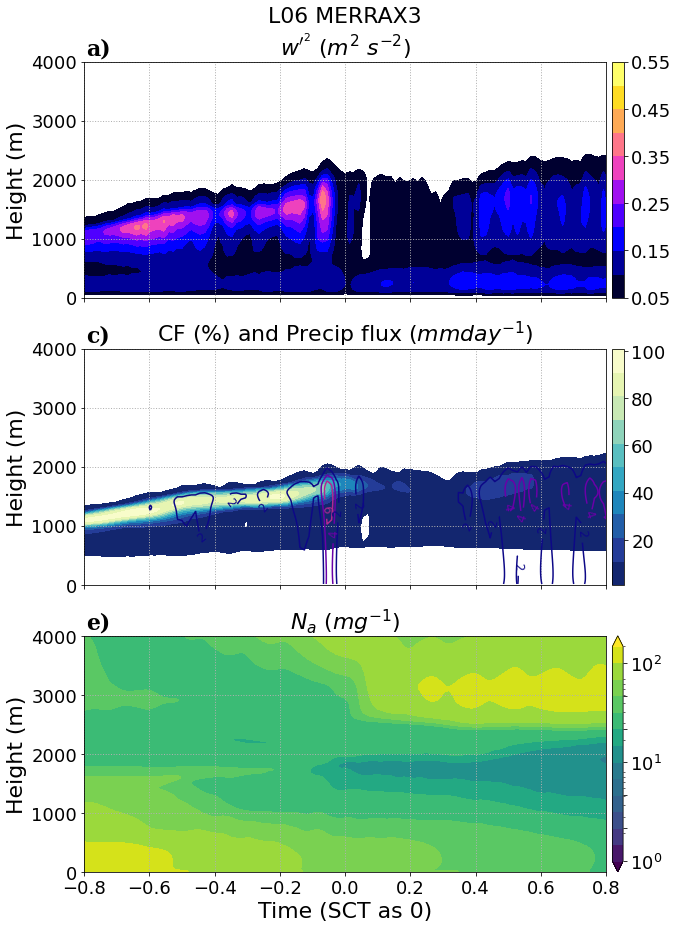

In [17]:
lw      = ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

lngh = 6
box  = 10
box2 = 20

cases = [0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8   , 9   , 14  , 15]
ls2   = ['-', '-', '-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '--', '--', '--']
cases2 = [5]

PANELS1 = ['a)', 'c)', 'e)']

#################

for jj in cases2:

    fig, axis = plt.subplots(3, 1,figsize=(10,13))

#     i = 0
#     axis[i].set_ylabel('Height (m)', fontsize = '20')
#     axis[i].set_title(lb[jj] + '\nLarge-scale $W$ ($m$ $s^{-1}$)', fontsize = '20')
#     axis[i].set_ylim([0, ylim])
#     axis[i].set_xlim([-.8, .8])
#     axis[i].tick_params(axis='both', which='major', labelsize=14)
#     axis[i].grid(linestyle=':', linewidth=1)
#     axis[i].axes.get_xaxis().set_ticklabels([])

    i = 0
    axis[i].set_ylabel('Height (m)', fontsize=22)
    axis[i].set_title('L06 ' + lb[jj] + '\n$w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize=22)
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=18)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])
    axis[i].text(0.05, 1.1, PANELS1[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

    i = 1
    axis[i].set_ylabel('Height (m)', fontsize=22)
    axis[i].set_title('CF (%) and Precip flux ($mm day^{-1}$)', fontsize=22)
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=18)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])
    axis[i].text(0.05, 1.1, PANELS1[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

    i = 2
    axis[i].set_xlabel('Time (SCT as 0)', fontsize=22)
    axis[i].set_ylabel('Height (m)', fontsize=22)
    axis[i].set_title('$N_a$ ($mg^{-1}$)', fontsize=22)
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=18)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].text(0.05, 1.1, PANELS1[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[jj])
  
    ISCCPTOT = ISCCPTOT * 100
    i_50 = np.where((ISCCPTOT > 48) & ((ISCCPTOT < 52)))[0]
    if len(i_50) == 0:
        i_50 = np.where((ISCCPTOT > 45) & ((ISCCPTOT < 55)))[0]
    if len(i_50) == 0 or lb[jj] == '250-60-LD':
        i_50 = np.where((ISCCPTOT > 42) & ((ISCCPTOT < 57)))[0]               
    if lb[jj] == '110-60' or lb[jj] == '250-60-LD':
        i_sct = -1
    else:
        i_sct = 0
    t_sct = time[i_50[i_sct]]    
    t_new = time - t_sct
    
    t_new_mg, z_mg = np.meshgrid(t_new, z) # making meshgrid

#     i = 0
#     clevs = np.arange(-0.015, 0.02, 0.005)
#     ticks = np.arange(-0.015, 0.02, 0.005)

#     cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(WOBS), clevs, extend='neither', cmap='RdYlBu_r')# 'cividis')
#     cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()

    i = 0
    clevs = np.arange(0.05, .6, 0.05)
    ticks = np.arange(0.05, .65, 0.1)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(W2), clevs, extend='neither', cmap='gnuplot2')# 'cividis')
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=18)

    i = 1
#    clevs  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    clevs  = np.arange(1, 110, 10)
    ticks  = np.arange(0, 110, 20)

    clevs2 = np.arange(2, 12.01, 2)
    ticks2 = np.arange(2, 12.01, 4)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(CLD) * 100, clevs, extend='neither', cmap='YlGnBu_r')# 'cividis')
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=18)

    cc10 = axis[i].contour(t_new_mg, z_mg, np.transpose(PRECIP), clevs2, cmap = 'plasma')
    axis[i].clabel(cc10, fontsize=12, inline=1, fmt='%1.0f')

    i = 2
    clevs  = np.arange(0, 121, 10)
    ticks  = np.arange(0, 121, 20)
    clevs = [1, 2, 3, 4.5, 6, 8, 10, 20, 30, 45, 60, 80, 100, 200]
    ticks = [1, 3, 6, 10, 30, 60, 100]

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(NA), clevs, extend='both', cmap='viridis', norm=matplotlib.colors.LogNorm())# 'cividis') 
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=18)
    

    fig.tight_layout(w_pad=1)
    plt.savefig(casename + '_SCT_'+period+'.pdf' , format='pdf', dpi=500)

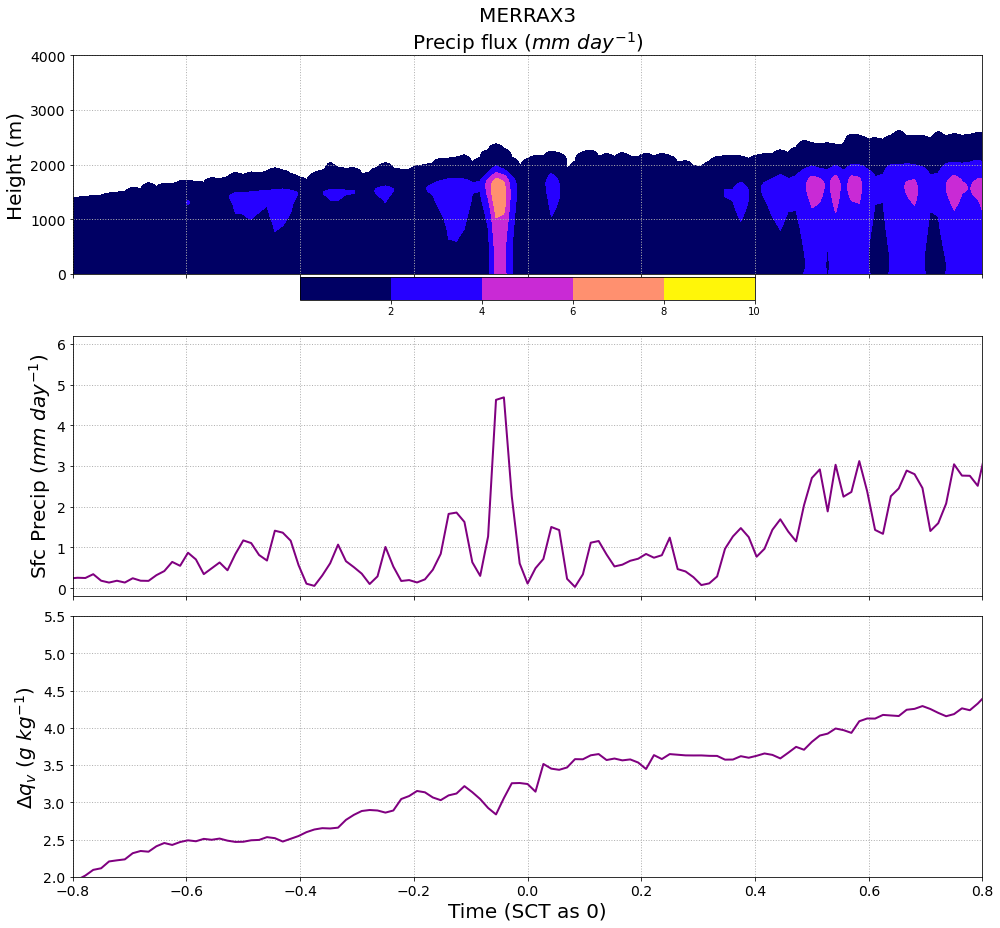

In [18]:
def calc_decoupling(z, dz, RHO, inv_idx, ZINV, QV):
    z_25 = ZINV // 4
    z_75 = ZINV * 3 // 4

    i_25 = np.where(abs(z - z_25) == np.nanmin(abs(z - z_25)))[0][0]
    i_75 = np.where(abs(z - z_75) == np.nanmin(abs(z - z_75)))[0][0]

    QV_25 = np.nansum(QV[:i_25+1] * dz[:i_25+1] * RHO[:i_25+1]) / np.nansum(dz[:i_25+1] * RHO[:i_25+1])
    QV_75 = np.nansum(QV[i_75:inv_idx+1] * dz[i_75:inv_idx+1] * RHO[i_75:inv_idx+1]) / \
                      np.nansum(dz[i_75:inv_idx+1] * RHO[i_75:inv_idx+1])
    return QV_25, QV_75


#################

for jj in cases2:

    fig, axis = plt.subplots(3, 1,figsize=(14,13))

    i = 0
    axis[i].set_ylabel('Height (m)', fontsize = '20')
    axis[i].set_title(lb[jj] + '\nPrecip flux ($mm$ $day^{-1}$)', fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])

    i = 1
    axis[i].set_ylabel('Sfc Precip ($mm$ $day^{-1}$)', fontsize = '20')
    axis[i].set_ylim([-.2, 6.2])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])

    i = 2
    axis[i].set_xlabel('Time (SCT as 0)', fontsize = '20')
    axis[i].set_ylabel('$Δq_v$ ($g$ $kg^{-1}$)', fontsize = '20')
    axis[i].set_ylim([2, 5.5])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

####
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[jj])
    
    QV_25 = ZINV.copy() 
    QV_75 = ZINV.copy() 
    for ii in range(len(ZINV)):
        QV_25[ii], QV_75[ii] = calc_decoupling(z, dz, RHO[ii,:], inv_idx[ii], ZINV[ii], QV[ii,:])

  
    ISCCPTOT = ISCCPTOT * 100
    i_50 = np.where((ISCCPTOT > 48) & ((ISCCPTOT < 52)))[0]
    if len(i_50) == 0:
        i_50 = np.where((ISCCPTOT > 45) & ((ISCCPTOT < 55)))[0]
    if len(i_50) == 0 or lb[jj] == '250-60-LD':
        i_50 = np.where((ISCCPTOT > 42) & ((ISCCPTOT < 57)))[0]               
    if lb[jj] == '110-60' or lb[jj] == '250-60-LD':
        i_sct = -1
    else:
        i_sct = 0
    t_sct = time[i_50[i_sct]]    
    t_new = time - t_sct
    
    t_new_mg, z_mg = np.meshgrid(t_new, z) # making meshgrid

    i = 0
    clevs2 = np.arange(.01, 12.01, 2)
    ticks2 = np.arange(0, 12.01, 2)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(PRECIP), clevs2, extend='neither', cmap = 'gnuplot2')
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks2, orientation='horizontal', shrink=0.5)#, size="5%")#, aspect=5) # , norm=matplotlib.colors.LogNorm()

    i = 1
    cc = axis[i].plot(t_new, PREC, '-', linewidth= '2', color='purple')#, label = lb[jj])

    i = 2
    cc = axis[i].plot(t_new, QV_25 - QV_75, '-', linewidth= '2', color='purple')#, label = lb[jj])

    

    fig.tight_layout(w_pad=1)
    fig.show()

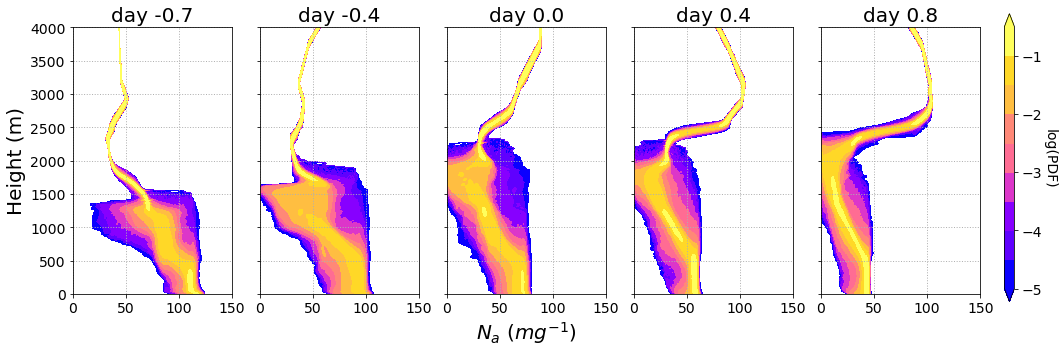

In [19]:
cmap = matplotlib.cm.gnuplot2(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[5:-1,:-1])

# file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
# file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
# file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
# file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
# file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
# file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')

#file_xyz_7 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000061920.nc')
file_xyz_7_1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000036000.nc')
file_xyz_7_2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000048960.nc')
file_xyz_7_3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000063360.nc')
file_xyz_7_4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000076320.nc')
file_xyz_7_5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000090720.nc')

# file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
# file3d05 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
# file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
# file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
# file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
# file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')

#file_xyz_60 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000116640.nc')
file_xyz_60_1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000089280.nc')
file_xyz_60_2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000103680.nc')
file_xyz_60_3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000117600.nc')
file_xyz_60_4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000126720.nc')

fn3d = [file_xyz_7_1, file_xyz_7_2, file_xyz_7_3, file_xyz_7_4, file_xyz_7_5]

# bins_all   = []
# counts_all = []
# t_all      = []

# for j in range(len(fn3d)):

#     #x      = fn3d[j].variables['x'][:] / 1000   # $km$
#     #y      = fn3d[j].variables['y'][:] / 1000
#     z      = fn3d[j].variables['z'][:]# / 1000   # $km$
#     t_xyz  = fn3d[j].variables['time'][:]
#     NA_xyz = fn3d[j].variables['NC'][:] + fn3d[j].variables['NAd'][:]# + fn3d[j].variables['NR'][:] 
#     #QR_xyz = fn3d[j].variables['QR'][:] / 1000 # convert to kg/kg
#     #QC_xyz = fn3d[j].variables['QC'][:] / 1000 # convert to kg/kg
#     #NC_xyz = fn3d[j].variables['NC'][:]

#     i_h = np.where(z > 4000)[0][0]

#     for ii in range(i_h):
#         var = np.reshape( NA_xyz[0,ii,:,:], -1)
#         try:
#             bins, counts = sns.distplot(var).get_lines()[0].get_data()   
#             if ii == 0:
#                 bins_mg, z_mg   = np.meshgrid(bins,   z[:i_h])
#                 counts_mg, z_mg = np.meshgrid(counts, z[:i_h])
#                 bins_mg[:]   = np.nan
#                 counts_mg[:] = np.nan

#             bins_mg[ii,:]   = bins
#             counts_mg[ii,:] = counts
#             plt.close()
#         except:
#             pass
        
#     bins_all.append(bins_mg)
#     counts_all.append(counts_mg)
#     t_all.append(t_xyz[0])
    
# np.savez('PDF_profile_M.npz', z_mg=z_mg, t_all=t_all, bins_all=bins_all, counts_all=counts_all)

data = np.load('PDF_profile_M.npz')
z_mg       = data['z_mg']
t_all      = data['t_all']
bins_all   = data['bins_all']
counts_all = data['counts_all']

###
i_sct = np.where(t_new == 0)[0][0]

########
fig, axis = plt.subplots(1, 5,figsize=(14,5))    
for i in range(len(bins_all)):
    if i == 0:
        axis[i].set_ylabel('Height (m)', fontsize = '20')
    else:
        axis[i].axes.get_yaxis().set_ticklabels([])
    if i == 2:
        axis[i].set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
    axis[i].set_title('day ' + str( round(t_all[i] - time[i_sct] - 198, 1) ), fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([0, 150])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

    clevs  = np.arange(-5, 0, .5)
    ticks  = np.arange(-5, 0, 1)
    cc = axis[i].contourf(bins_all[i], z_mg, np.log10(counts_all[i]), clevs, extend='both', cmap=cmap)#, norm=matplotlib.colors.LogNorm())

fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1., 0.15, 0.01, 0.8])
cbar = fig.colorbar(cc, cax=cbar_ax, pad = 0.0, ticks=ticks)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('log(PDF)', rotation=270, fontsize = 14, labelpad=15)

plt.tight_layout(w_pad=1)
plt.show()

In [1]:
pwd

'/home/disk/eos1/erfani/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/postprocessing'

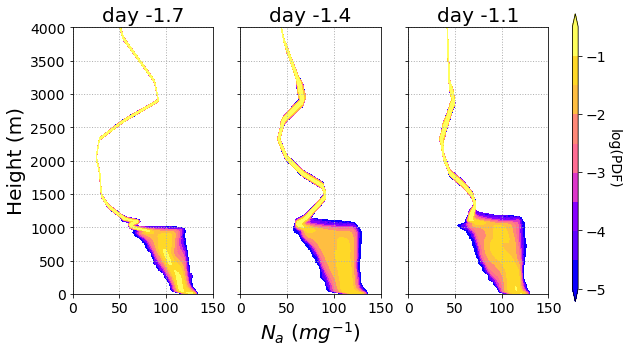

In [20]:
cmap = matplotlib.cm.gnuplot2(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[5:-1,:-1])

file_xyz_7_000 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000002880.nc')
file_xyz_7_001 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000012960.nc')
file_xyz_7_002 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000024480.nc')

fn3d = [file_xyz_7_000, file_xyz_7_001, file_xyz_7_002]

bins_all   = []
counts_all = []
t_all      = []

# for j in range(len(fn3d)):

#     #x      = fn3d[j].variables['x'][:] / 1000   # $km$
#     #y      = fn3d[j].variables['y'][:] / 1000
#     z      = fn3d[j].variables['z'][:]# / 1000   # $km$
#     t_xyz  = fn3d[j].variables['time'][:]
#     NA_xyz = fn3d[j].variables['NC'][:] + fn3d[j].variables['NAd'][:]# + fn3d[j].variables['NR'][:] 
#     #QR_xyz = fn3d[j].variables['QR'][:] / 1000 # convert to kg/kg
#     #QC_xyz = fn3d[j].variables['QC'][:] / 1000 # convert to kg/kg
#     #NC_xyz = fn3d[j].variables['NC'][:]

#     i_h = np.where(z > 4000)[0][0]

#     for ii in range(i_h):
#         var = np.reshape( NA_xyz[0,ii,:,:], -1)
#         try:
#             bins, counts = sns.distplot(var).get_lines()[0].get_data()   
#             if ii == 0:
#                 bins_mg, z_mg   = np.meshgrid(bins,   z[:i_h])
#                 counts_mg, z_mg = np.meshgrid(counts, z[:i_h])
#                 bins_mg[:]   = np.nan
#                 counts_mg[:] = np.nan

#             bins_mg[ii,:]   = bins
#             counts_mg[ii,:] = counts
#             plt.close()
#         except:
#             pass
        
#     bins_all.append(bins_mg)
#     counts_all.append(counts_mg)
#     t_all.append(t_xyz[0])
    
# np.savez('PDF_profile_M_000.npz', z_mg=z_mg, t_all=t_all, bins_all=bins_all, counts_all=counts_all)

data = np.load('PDF_profile_M_000.npz')
z_mg       = data['z_mg']
t_all      = data['t_all']
bins_all   = data['bins_all']
counts_all = data['counts_all']

###
i_sct = np.where(t_new == 0)[0][0]

########
fig, axis = plt.subplots(1, 3,figsize=(8,5))    
for i in range(len(bins_all)):
    if i == 0:
        axis[i].set_ylabel('Height (m)', fontsize = '20')
    else:
        axis[i].axes.get_yaxis().set_ticklabels([])
    if i == 1:
        axis[i].set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
    axis[i].set_title('day ' + str( round(t_all[i] - time[i_sct] - 198, 1) ), fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([0, 150])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

    clevs  = np.arange(-5, 0, .5)
    ticks  = np.arange(-5, 0, 1)
    cc = axis[i].contourf(bins_all[i], z_mg, np.log10(counts_all[i]), clevs, extend='both', cmap=cmap)#, norm=matplotlib.colors.LogNorm())

fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1., 0.15, 0.01, 0.8])
cbar = fig.colorbar(cc, cax=cbar_ax, pad = 0.0, ticks=ticks)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('log(PDF)', rotation=270, fontsize = 14, labelpad=15)

plt.tight_layout(w_pad=1)
plt.show()

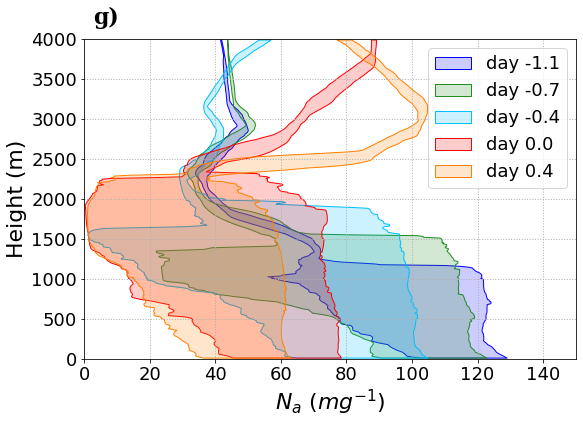

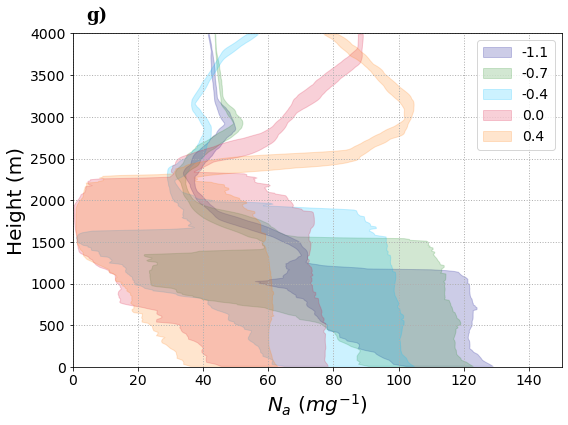

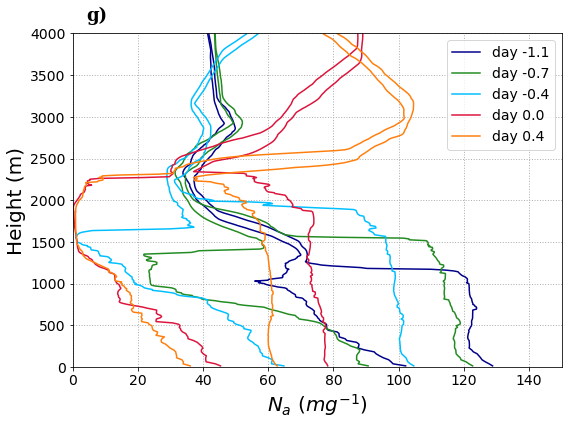

In [21]:
def calc_PDF_pctl(var):
    pctl05 = var[:,0].copy()
    pctl95 = var[:,0].copy()

    for i in range(len(pctl05)):
        pctl05[i] = np.nanpercentile(var[i,:],  5)
        pctl95[i] = np.nanpercentile(var[i,:], 95)
    return pctl05, pctl95

#c_pdf = ['k','slateblue' , 'forestgreen', 'deepskyblue', 'hotpink',  'crimson',  'tomato',  'yellow']
c_pdf  = ['y','y', 'darkblue' , 'forestgreen'       , 'deepskyblue'  , 'crimson'  ,  'tab:orange']
c_pdf1 = ['y','y', (0,0,1,0.2), (.133,.545,.133,0.2), (0,0.749,1,0.2), (1,0,0,0.2), (1,0.5,0,0.2)]
c_pdf2 = ['y','y', (0,0,1,1) , (.133,.545,.133,1)   , (0,0.749,1,1)  , (1,0,0,1)  , (1,0.5,0,1)]


data = np.load('PDF_profile_M_000.npz')
t_all_1      = data['t_all']
bins_all_1   = data['bins_all']
counts_all_1 = data['counts_all']

data = np.load('PDF_profile_M.npz')
z_mg         = data['z_mg']
t_all_2      = data['t_all']
bins_all_2   = data['bins_all']
counts_all_2 = data['counts_all']


t_all = np.concatenate([t_all_1, t_all_2], axis=0)
bins_all = np.concatenate([bins_all_1, bins_all_2], axis=0)
counts_all = np.concatenate([counts_all_1, counts_all_2], axis=0)


#################
fig, axis = plt.subplots(1, 1,figsize=(8.2,6))    
#for i in range(bins_all.shape[0]):
for i in [2, 3, 4, 5, 6]:
    pctl05, pctl95 = calc_PDF_pctl(bins_all[i])
    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, facecolor=c_pdf1[i], edgecolor=c_pdf2[i], label='day '+str( round(t_all[i] - time[i_sct] - 198, 1) ))
    
#    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, color=c_pdf[i], alpha=.3, label=str( round(t_all[i] - time[i_sct] - 198, 1) ))
axis.set_ylim([0, ylim])
axis.set_xlim([0, 150])
#axis.set_title('L06 MERRA-LD, 5th-95th PDF', fontsize = '20')
axis.set_ylabel('Height (m)', fontsize=22)
axis.set_xlabel('$N_a$ ($mg^{-1}$)', fontsize=22)
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', linewidth=1)
axis.legend(fontsize=18)
axis.text(0.07, 1.1, 'g)', transform=axis.transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
plt.tight_layout(w_pad=1)
plt.savefig(casename + '_PDF_'+period+'.pdf' , format='pdf', dpi=500)

#####
fig, axis = plt.subplots(1, 1,figsize=(8,6))    
#for i in range(bins_all.shape[0]):
for i in [2, 3, 4, 5, 6]:
    pctl05, pctl95 = calc_PDF_pctl(bins_all[i])
    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, color=c_pdf[i], alpha=.2, label=str( round(t_all[i] - time[i_sct] - 198, 1) ))
axis.set_ylim([0, ylim])
axis.set_xlim([0, 150])
axis.set_ylabel('Height (m)', fontsize = '20')
axis.set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', linewidth=1)
axis.legend(fontsize = '14')
axis.text(0.07, 1.08, 'g)', transform=axis.transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')
plt.tight_layout(w_pad=1)
plt.show()

####
fig, axis = plt.subplots(1, 1,figsize=(8,6))    
#for i in range(bins_all.shape[0]):
for i in [2, 3, 4, 5, 6]:
    pctl05, pctl95 = calc_PDF_pctl(bins_all[i])
    axis.plot(pctl05, z_mg[:,0], c=c_pdf[i], label='day '+str( round(t_all[i] - time[i_sct] - 198, 1) ))
    axis.plot(pctl95, z_mg[:,0], c=c_pdf[i])
#    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, color=c_pdf[i], alpha=.3, label=str( round(t_all[i] - time[i_sct] - 198, 1) ))
axis.set_ylim([0, ylim])
axis.set_xlim([0, 150])
axis.set_ylabel('Height (m)', fontsize = '20')
axis.set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', linewidth=1)
axis.legend(fontsize = '14')
axis.text(0.07, 1.08, 'g)', transform=axis.transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')
plt.tight_layout(w_pad=1)
plt.show()

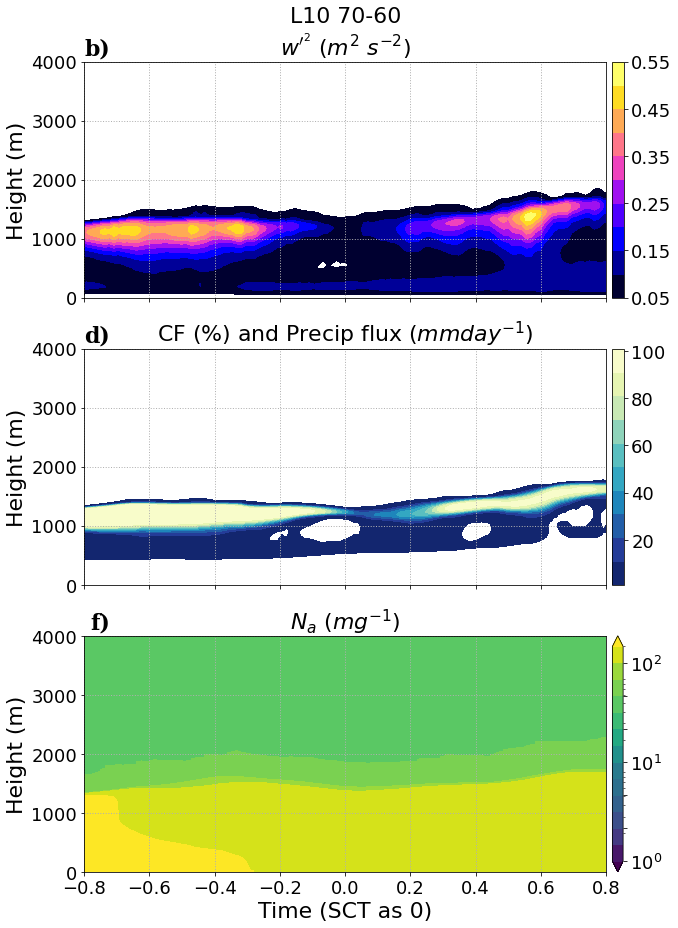

In [22]:
lw      = ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

lngh = 6
box  = 10
box2 = 20

cases = [0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8   , 9   , 14  , 15]
ls2   = ['-', '-', '-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '--', '--', '--']
cases2 = [8]

PANELS2 = ['b)', 'd)', 'f)']

#################

for jj in cases2:

    fig, axis = plt.subplots(3, 1,figsize=(10,13))

#     i = 0
#     axis[i].set_ylabel('Height (m)', fontsize=22)
#     axis[i].set_title(lb[jj] + '\nLarge-scale $W$ ($m$ $s^{-1}$)', fontsize=22)
#     axis[i].set_ylim([0, ylim])
#     axis[i].set_xlim([-.8, .8])
#     axis[i].tick_params(axis='both', which='major', labelsize=14)
#     axis[i].grid(linestyle=':', linewidth=1)
#     axis[i].axes.get_xaxis().set_ticklabels([])

    i = 0
    axis[i].set_ylabel('Height (m)', fontsize=22)
    axis[i].set_title('L10 ' + lb[jj] + '\n$w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize=22)
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=18)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])
    axis[i].text(0.05, 1.1, PANELS2[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

    i = 1
    axis[i].set_ylabel('Height (m)', fontsize=22)
    axis[i].set_title('CF (%) and Precip flux ($mm day^{-1}$)', fontsize=22)
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=18)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])
    axis[i].text(0.05, 1.1, PANELS2[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

    i = 2
    axis[i].set_xlabel('Time (SCT as 0)', fontsize=22)
    axis[i].set_ylabel('Height (m)', fontsize=22)
    axis[i].set_title('$N_a$ ($mg^{-1}$)', fontsize=22)
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=18)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].text(0.05, 1.1, PANELS2[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[jj])
  
    ISCCPTOT = ISCCPTOT * 100
    i_50 = np.where((ISCCPTOT > 48) & ((ISCCPTOT < 52)))[0]
    if len(i_50) == 0:
        i_50 = np.where((ISCCPTOT > 45) & ((ISCCPTOT < 55)))[0]
    if len(i_50) == 0 or lb[jj] == '250-60-LD':
        i_50 = np.where((ISCCPTOT > 42) & ((ISCCPTOT < 57)))[0]               
    if lb[jj] == '110-60' or lb[jj] == '250-60-LD':
        i_sct = -1
    else:
        i_sct = 0
    t_sct = time[i_50[i_sct]]    
    t_new = time - t_sct
    
    t_new_mg, z_mg = np.meshgrid(t_new, z) # making meshgrid

#     i = 0
#     clevs = np.arange(-0.015, 0.02, 0.005)
#     ticks = np.arange(-0.015, 0.02, 0.005)

#     cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(WOBS), clevs, extend='neither', cmap='RdYlBu_r')# 'cividis')
#     cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()

    i = 0
    clevs = np.arange(0.05, .6, 0.05)
    ticks = np.arange(0.05, .65, 0.1)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(W2), clevs, extend='neither', cmap='gnuplot2')# 'cividis')
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=18)

    i = 1
#    clevs  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    clevs  = np.arange(1, 110, 10)
    ticks  = np.arange(0, 110, 20)

    clevs2 = np.arange(2, 12.01, 2)
    ticks2 = np.arange(2, 12.01, 4)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(CLD) * 100, clevs, extend='neither', cmap='YlGnBu_r')# 'cividis')
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=18)

    cc10 = axis[i].contour(t_new_mg, z_mg, np.transpose(PRECIP), clevs2, cmap = 'plasma')
    axis[i].clabel(cc10, fontsize=12, inline=1, fmt='%1.0f')

    i = 2
    clevs  = np.arange(0, 121, 10)
    ticks  = np.arange(0, 121, 20)
    clevs = [1, 2, 3, 4.5, 6, 8, 10, 20, 30, 45, 60, 80, 100, 200]
    ticks = [1, 3, 6, 10, 30, 60, 100]

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(NA), clevs, extend='both', cmap='viridis', norm=matplotlib.colors.LogNorm())# 'cividis') 
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=18)
    

    fig.tight_layout(w_pad=1)
    plt.savefig('RF10_Tr6.0_SCT_'+period+'.pdf' , format='pdf', dpi=500)

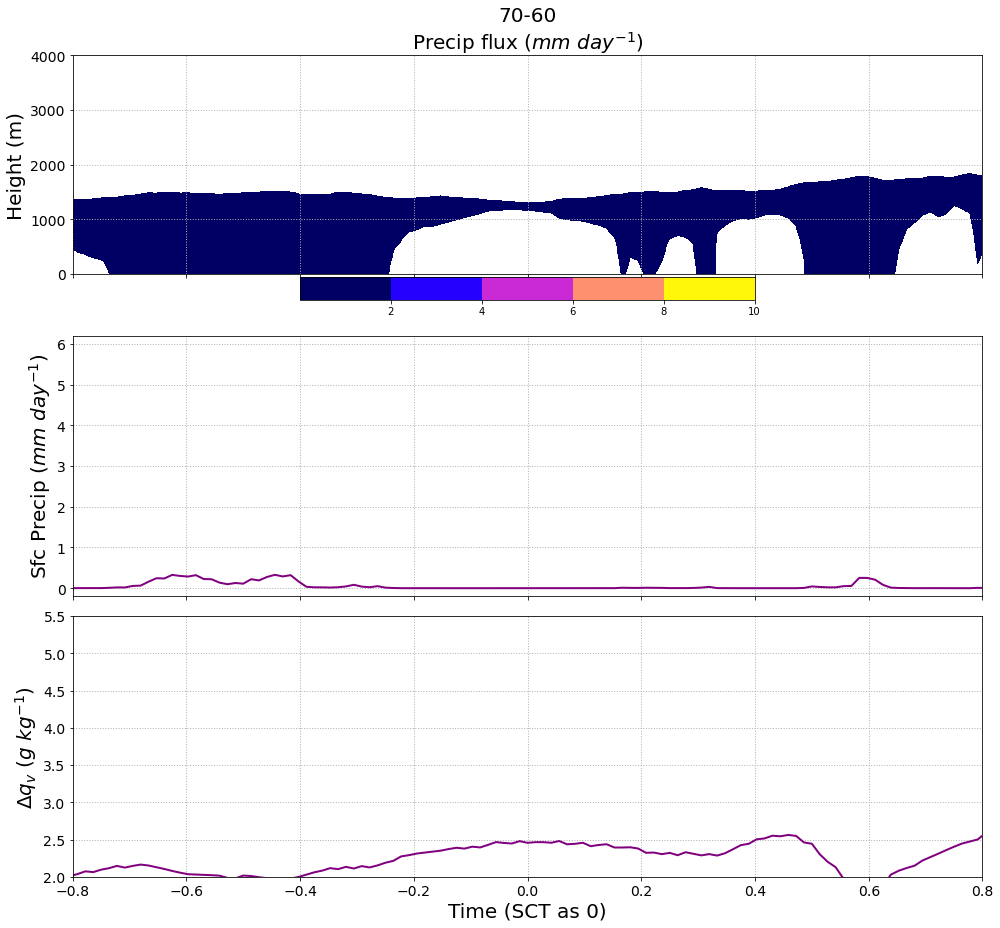

In [23]:
def calc_decoupling(z, dz, RHO, inv_idx, ZINV, QV):
    z_25 = ZINV // 4
    z_75 = ZINV * 3 // 4

    i_25 = np.where(abs(z - z_25) == np.nanmin(abs(z - z_25)))[0][0]
    i_75 = np.where(abs(z - z_75) == np.nanmin(abs(z - z_75)))[0][0]

    QV_25 = np.nansum(QV[:i_25+1] * dz[:i_25+1] * RHO[:i_25+1]) / np.nansum(dz[:i_25+1] * RHO[:i_25+1])
    QV_75 = np.nansum(QV[i_75:inv_idx+1] * dz[i_75:inv_idx+1] * RHO[i_75:inv_idx+1]) / \
                      np.nansum(dz[i_75:inv_idx+1] * RHO[i_75:inv_idx+1])
    return QV_25, QV_75

#################

for jj in cases2:

    fig, axis = plt.subplots(3, 1,figsize=(14,13))

    i = 0
    axis[i].set_ylabel('Height (m)', fontsize = '20')
    axis[i].set_title(lb[jj] + '\nPrecip flux ($mm$ $day^{-1}$)', fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])

    i = 1
    axis[i].set_ylabel('Sfc Precip ($mm$ $day^{-1}$)', fontsize = '20')
    axis[i].set_ylim([-.2, 6.2])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])

    i = 2
    axis[i].set_xlabel('Time (SCT as 0)', fontsize = '20')
    axis[i].set_ylabel('$Δq_v$ ($g$ $kg^{-1}$)', fontsize = '20')
    axis[i].set_ylim([2, 5.5])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

####
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[jj])
    
    QV_25 = ZINV.copy() 
    QV_75 = ZINV.copy() 
    for ii in range(len(ZINV)):
        QV_25[ii], QV_75[ii] = calc_decoupling(z, dz, RHO[ii,:], inv_idx[ii], ZINV[ii], QV[ii,:])

  
    ISCCPTOT = ISCCPTOT * 100
    i_50 = np.where((ISCCPTOT > 48) & ((ISCCPTOT < 52)))[0]
    if len(i_50) == 0:
        i_50 = np.where((ISCCPTOT > 45) & ((ISCCPTOT < 55)))[0]
    if len(i_50) == 0 or lb[jj] == '250-60-LD':
        i_50 = np.where((ISCCPTOT > 42) & ((ISCCPTOT < 57)))[0]               
    if lb[jj] == '110-60' or lb[jj] == '250-60-LD':
        i_sct = -1
    else:
        i_sct = 0
    t_sct = time[i_50[i_sct]]    
    t_new = time - t_sct
    
    t_new_mg, z_mg = np.meshgrid(t_new, z) # making meshgrid

    i = 0
    clevs2 = np.arange(.01, 12.01, 2)
    ticks2 = np.arange(0, 12.01, 2)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(PRECIP), clevs2, extend='neither', cmap = 'gnuplot2')
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks2, orientation='horizontal', shrink=0.5)#, size="5%")#, aspect=5) # , norm=matplotlib.colors.LogNorm()

    i = 1
    cc = axis[i].plot(t_new, PREC, '-', linewidth= '2', color='purple')#, label = lb[jj])

    i = 2
    cc = axis[i].plot(t_new, QV_25 - QV_75, '-', linewidth= '2', color='purple')#, label = lb[jj])

    

    fig.tight_layout(w_pad=1)
    fig.show()

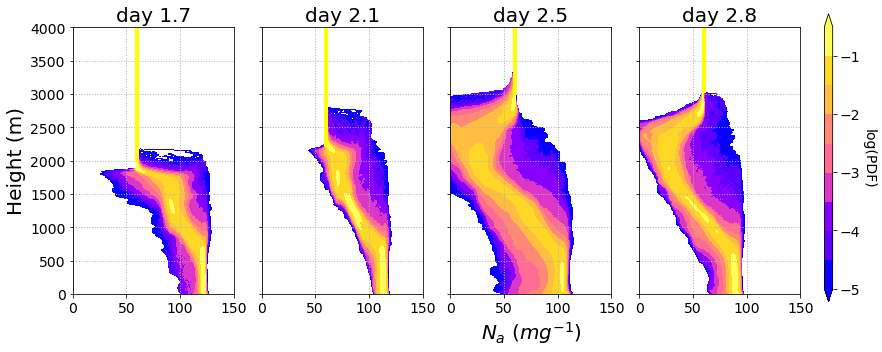

In [24]:
cmap = matplotlib.cm.gnuplot2(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[5:-1,:-1])

# file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
# file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
# file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
# file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
# file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
# file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file_xyz_7 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000061920.nc')

# file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
# file3d05 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
# file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
# file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
# file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
# file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')

#file_xyz_60 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000116640.nc')
file_xyz_60_1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000089280.nc')
file_xyz_60_2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000103680.nc')
file_xyz_60_3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000117600.nc')
file_xyz_60_4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000126720.nc')

fn3d = [file_xyz_60_1, file_xyz_60_2, file_xyz_60_3, file_xyz_60_4]

# bins_all   = []
# counts_all = []
# t_all      = []

# for j in range(len(fn3d)):

#     #x      = fn3d[j].variables['x'][:] / 1000   # $km$
#     #y      = fn3d[j].variables['y'][:] / 1000
#     z      = fn3d[j].variables['z'][:]# / 1000   # $km$
#     t_xyz  = fn3d[j].variables['time'][:]
#     NA_xyz = fn3d[j].variables['NC'][:] + fn3d[j].variables['NAd'][:]# + fn3d[j].variables['NR'][:] 
#     #QR_xyz = fn3d[j].variables['QR'][:] / 1000 # convert to kg/kg
#     #QC_xyz = fn3d[j].variables['QC'][:] / 1000 # convert to kg/kg
#     #NC_xyz = fn3d[j].variables['NC'][:]

#     i_h = np.where(z > 4000)[0][0]

#     for ii in range(i_h):
#         var = np.reshape( NA_xyz[0,ii,:,:], -1)
#         try:
#             bins, counts = sns.distplot(var).get_lines()[0].get_data()   
#             if ii == 0:
#                 bins_mg, z_mg   = np.meshgrid(bins,   z[:i_h])
#                 counts_mg, z_mg = np.meshgrid(counts, z[:i_h])
#                 bins_mg[:]   = np.nan
#                 counts_mg[:] = np.nan

#             bins_mg[ii,:]   = bins
#             counts_mg[ii,:] = counts
#             plt.close()
#         except:
#             pass
        
#     bins_all.append(bins_mg)
#     counts_all.append(counts_mg)
#     t_all.append(t_xyz[0])
    
# np.savez('PDF_profile_250_60.npz', z_mg=z_mg, t_all=t_all, bins_all=bins_all, counts_all=counts_all)

data = np.load('PDF_profile_250_60.npz')
z_mg       = data['z_mg']
t_all      = data['t_all']
bins_all   = data['bins_all']
counts_all = data['counts_all']

###
i_sct = np.where(t_new == 0)[0][0]
hhh = [2000, 2230, 3000, 3030]
########
fig, axis = plt.subplots(1, 4,figsize=(11.5,5))    
for i in range(len(bins_all)):
    if i == 0:
        axis[i].set_ylabel('Height (m)', fontsize = '20')
    else:
        axis[i].axes.get_yaxis().set_ticklabels([])
    if i == 2:
        axis[i].set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
    axis[i].set_title('day ' + str( round(t_all[i] - time[i_sct] - 208, 1) ), fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([0, 150])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

    clevs  = np.arange(-5, 0, .5)
    ticks  = np.arange(-5, 0, 1)
    cc = axis[i].contourf(bins_all[i], z_mg, np.log10(counts_all[i]), clevs, extend='both', cmap=cmap)#, norm=matplotlib.colors.LogNorm())
   
    i_hhh = np.where(z > hhh[i])
    nnn   = z[i_hhh].copy()
    nnn[:]= 60
    cc2 = axis[i].plot(nnn, z[i_hhh], c='yellow', linewidth=4)#, norm=matplotlib.colors.LogNorm())

fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1., 0.15, 0.01, 0.8])
cbar = fig.colorbar(cc, cax=cbar_ax, pad = 0.0, ticks=ticks)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('log(PDF)', rotation=270, fontsize = 14, labelpad=15)

plt.tight_layout(w_pad=1)
plt.show()

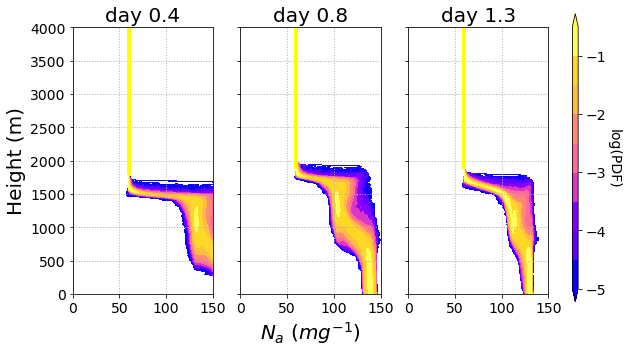

In [25]:
cmap = matplotlib.cm.gnuplot2(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[5:-1,:-1])

file_xyz_60_000 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000046080.nc')
file_xyz_60_001 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000060480.nc')
file_xyz_60_002 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000074880.nc')

fn3d = [file_xyz_60_000, file_xyz_60_001, file_xyz_60_002]

# bins_all   = []
# counts_all = []
# t_all      = []

# for j in range(len(fn3d)):

#     #x      = fn3d[j].variables['x'][:] / 1000   # $km$
#     #y      = fn3d[j].variables['y'][:] / 1000
#     z      = fn3d[j].variables['z'][:]# / 1000   # $km$
#     t_xyz  = fn3d[j].variables['time'][:]
#     NA_xyz = fn3d[j].variables['NC'][:] + fn3d[j].variables['NAd'][:]# + fn3d[j].variables['NR'][:] 
#     #QR_xyz = fn3d[j].variables['QR'][:] / 1000 # convert to kg/kg
#     #QC_xyz = fn3d[j].variables['QC'][:] / 1000 # convert to kg/kg
#     #NC_xyz = fn3d[j].variables['NC'][:]

#     i_h = np.where(z > 4000)[0][0]

#     for ii in range(i_h):
#         var = np.reshape( NA_xyz[0,ii,:,:], -1)
#         try:
#             bins, counts = sns.distplot(var).get_lines()[0].get_data()   
#             if ii == 0:
#                 bins_mg, z_mg   = np.meshgrid(bins,   z[:i_h])
#                 counts_mg, z_mg = np.meshgrid(counts, z[:i_h])
#                 bins_mg[:]   = np.nan
#                 counts_mg[:] = np.nan

#             bins_mg[ii,:]   = bins
#             counts_mg[ii,:] = counts
#             plt.close()
#         except:
#             pass
        
#     bins_all.append(bins_mg)
#     counts_all.append(counts_mg)
#     t_all.append(t_xyz[0])
    
# np.savez('PDF_profile_250_60_000.npz', z_mg=z_mg, t_all=t_all, bins_all=bins_all, counts_all=counts_all)

data = np.load('PDF_profile_250_60_000.npz')
z_mg       = data['z_mg']
t_all      = data['t_all']
bins_all   = data['bins_all']
counts_all = data['counts_all']

###
i_sct = np.where(t_new == 0)[0][0]
hhh = [1800, 1900, 1900]
########
fig, axis = plt.subplots(1, 3,figsize=(8,5))    
for i in range(len(bins_all)):
    if i == 0:
        axis[i].set_ylabel('Height (m)', fontsize = '20')
    else:
        axis[i].axes.get_yaxis().set_ticklabels([])
    if i == 1:
        axis[i].set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
    axis[i].set_title('day ' + str( round(t_all[i] - time[i_sct] - 208, 1) ), fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([0, 150])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

    clevs  = np.arange(-5, 0, .5)
    ticks  = np.arange(-5, 0, 1)
    cc = axis[i].contourf(bins_all[i], z_mg, np.log10(counts_all[i]), clevs, extend='both', cmap=cmap)#, norm=matplotlib.colors.LogNorm())
   
    i_hhh = np.where(z > hhh[i])
    nnn   = z[i_hhh].copy()
    nnn[:]= 60
    cc2 = axis[i].plot(nnn, z[i_hhh], c='yellow', linewidth=4)#, norm=matplotlib.colors.LogNorm())

fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1., 0.15, 0.01, 0.8])
cbar = fig.colorbar(cc, cax=cbar_ax, pad = 0.0, ticks=ticks)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('log(PDF)', rotation=270, fontsize = 14, labelpad=15)

plt.tight_layout(w_pad=1)
plt.show()

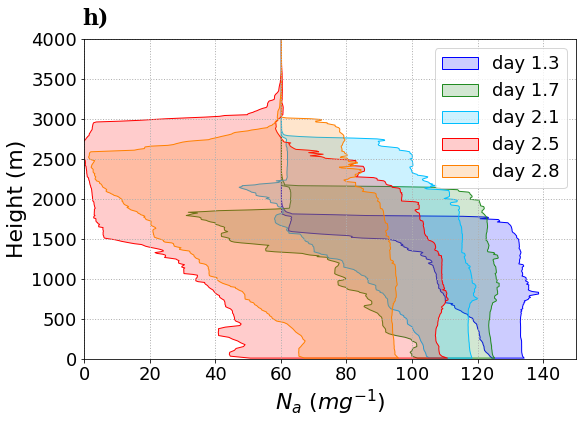

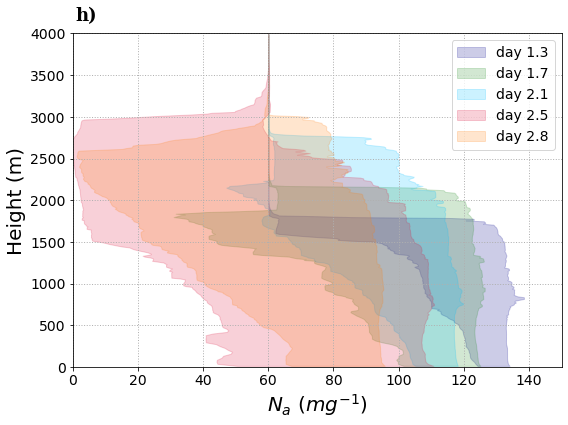

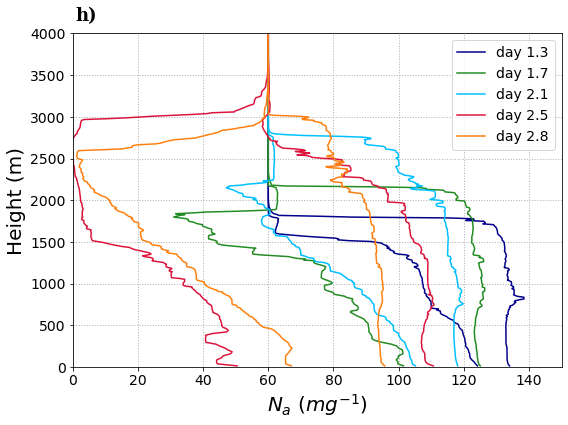

In [26]:
def calc_PDF_pctl(var):
    pctl05 = var[:,0].copy()
    pctl95 = var[:,0].copy()

    for i in range(len(pctl05)):
        pctl05[i] = np.nanpercentile(var[i,:],  5)
        pctl95[i] = np.nanpercentile(var[i,:], 95)
        
    idx = np.where( np.isnan(pctl05) )[0]
    pctl05[idx] = pctl05[idx[0] - 1]
    idx = np.where( np.isnan(pctl95) )[0]
    pctl95[idx] = pctl95[idx[0] - 1]
        
    return pctl05, pctl95

# for i in range(len(pctl05)):
#     if np.isnan(pctl05[i]) == 1:
#         pctl05[i] = pctl05[i-1] - 10
#     if np.isnan(pctl95[i]) == 1:
#         pctl95[i] = pctl95[i-1] + 10


#c_pdf = ['k','slateblue' , 'forestgreen', 'deepskyblue', 'hotpink',  'crimson',  'tomato',  'yellow']
c_pdf  = ['y','y', 'darkblue' , 'forestgreen'       , 'deepskyblue'  , 'crimson'  ,  'tab:orange']
c_pdf1 = ['y','y', (0,0,1,0.2), (.133,.545,.133,0.2), (0,0.749,1,0.2), (1,0,0,0.2), (1,0.5,0,0.2)]
c_pdf2 = ['y','y', (0,0,1,1) , (.133,.545,.133,1)   , (0,0.749,1,1)  , (1,0,0,1)  , (1,0.5,0,1)]

data = np.load('PDF_profile_250_60_000.npz')
t_all_1      = data['t_all']
bins_all_1   = data['bins_all']
counts_all_1 = data['counts_all']

data = np.load('PDF_profile_250_60.npz')
z_mg         = data['z_mg']
t_all_2      = data['t_all']
bins_all_2   = data['bins_all']
counts_all_2 = data['counts_all']


t_all = np.concatenate([t_all_1, t_all_2], axis=0)
bins_all = np.concatenate([bins_all_1, bins_all_2], axis=0)
counts_all = np.concatenate([counts_all_1, counts_all_2], axis=0)

#################
fig, axis = plt.subplots(1, 1,figsize=(8.2,6))    
#for i in range(bins_all.shape[0]):
for i in [2, 3, 4, 5, 6]:
    pctl05, pctl95 = calc_PDF_pctl(bins_all[i])
    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, facecolor=c_pdf1[i], edgecolor=c_pdf2[i], label='day '+str( round(t_all[i] - time[i_sct] - 208, 1) ))
    
#    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, color=c_pdf[i], alpha=.3, label=str( round(t_all[i] - time[i_sct] - 198, 1) ))
axis.set_ylim([0, ylim])
axis.set_xlim([0, 150])
#axis.set_title('L10 250-60-LD, 5th-95th PDF', fontsize = '20')
axis.set_ylabel('Height (m)', fontsize=22)
axis.set_xlabel('$N_a$ ($mg^{-1}$)', fontsize=22)
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', linewidth=1)
axis.legend(fontsize=18)
axis.text(0.05, 1.1, 'h)', transform=axis.transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
plt.tight_layout(w_pad=1)
plt.savefig('RF10_Tr6.0_PDF_'+period+'.pdf' , format='pdf', dpi=500)

#####
fig, axis = plt.subplots(1, 1,figsize=(8,6))    
#for i in range(bins_all.shape[0]):
for i in [2, 3, 4, 5, 6]:
    pctl05, pctl95 = calc_PDF_pctl(bins_all[i])
    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, color=c_pdf[i], alpha=.2, label='day '+str( round(t_all[i] - time[i_sct] - 208, 1) ))
axis.set_ylim([0, ylim])
axis.set_xlim([0, 150])
axis.set_ylabel('Height (m)', fontsize = '20')
axis.set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', linewidth=1)
axis.legend(fontsize = '14')
axis.text(0.05, 1.08, 'h)', transform=axis.transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')
plt.tight_layout(w_pad=1)
plt.show()

####
fig, axis = plt.subplots(1, 1,figsize=(8,6))    
#for i in range(bins_all.shape[0]):
for i in [2, 3, 4, 5, 6]:
    pctl05, pctl95 = calc_PDF_pctl(bins_all[i])
    axis.plot(pctl05, z_mg[:,0], c=c_pdf[i], label='day '+str( round(t_all[i] - time[i_sct] - 208, 1) ))
    axis.plot(pctl95, z_mg[:,0], c=c_pdf[i])
#    axis.fill_betweenx(z_mg[:,0],pctl05, pctl95, color=c_pdf[i], alpha=.3, label=str( round(t_all[i] - time[i_sct] - 198, 1) ))
axis.set_ylim([0, ylim])
axis.set_xlim([0, 150])
axis.set_ylabel('Height (m)', fontsize = '20')
axis.set_xlabel('$N_a$ ($mg^{-1}$)', fontsize = '20')
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', linewidth=1)
axis.legend(fontsize = '14')
axis.text(0.05, 1.08, 'h)', transform=axis.transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')
plt.tight_layout(w_pad=1)
plt.show()

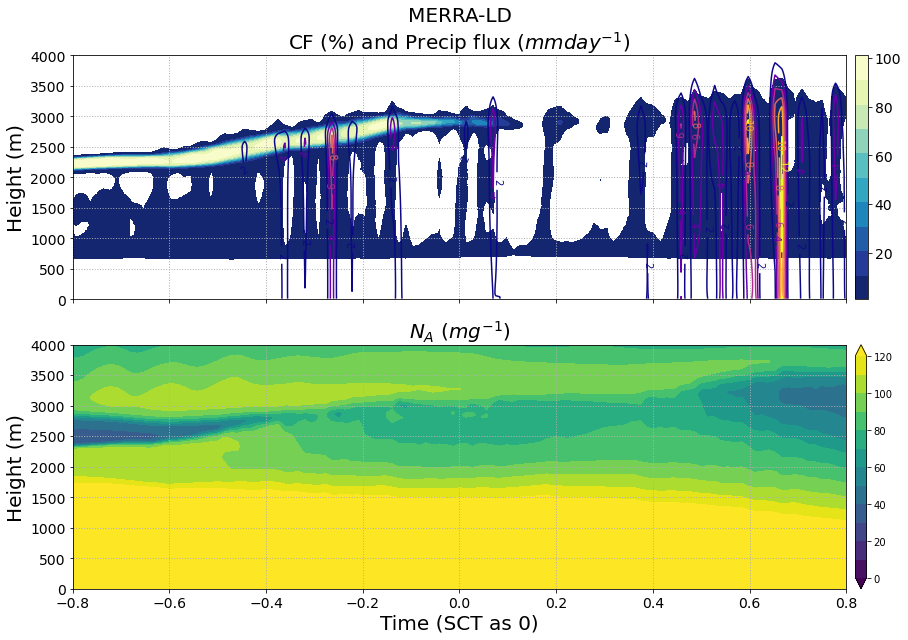

In [27]:
    jj = 7

    fig, axis = plt.subplots(2, 1,figsize=(14,9))

    i = 0
    axis[i].set_ylabel('Height (m)', fontsize = '20')
    axis[i].set_title(lb[jj] + '\nCF (%) and Precip flux ($mm day^{-1}$)', fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)
    axis[i].axes.get_xaxis().set_ticklabels([])

    i = 1
    axis[i].set_ylabel('Height (m)', fontsize = '20')
    axis[i].set_xlabel('Time (SCT as 0)', fontsize = '20')
    axis[i].set_title('$N_A$ ($mg^{-1}$)', fontsize = '20')
    axis[i].set_ylim([0, ylim])
    axis[i].set_xlim([-.8, .8])
    axis[i].tick_params(axis='both', which='major', labelsize=14)
    axis[i].grid(linestyle=':', linewidth=1)

####
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[jj])
  
    ISCCPTOT = ISCCPTOT * 100
    i_50 = np.where((ISCCPTOT > 48) & ((ISCCPTOT < 52)))[0]
    if len(i_50) == 0:
        i_50 = np.where((ISCCPTOT > 45) & ((ISCCPTOT < 55)))[0]
    if len(i_50) == 0 or lb[jj] == '250-60-LD':
        i_50 = np.where((ISCCPTOT > 42) & ((ISCCPTOT < 57)))[0]               
    if lb[jj] == '110-60' or lb[jj] == '250-60-LD':
        i_sct = -1
    else:
        i_sct = 0
    t_sct = time[i_50[i_sct]]    
    t_new = time - t_sct
    
    t_new_mg, z_mg = np.meshgrid(t_new, z) # making meshgrid
        
    i = 0
#    clevs  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    clevs  = np.arange(1, 110, 10)
    ticks  = np.arange(0, 110, 20)
    #ticks  = [1, 10, 100]
    clevs2 = np.arange(2, 12.01, 2)
    ticks2 = np.arange(2, 12.01, 4)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(CLD) * 100, clevs, extend='neither', cmap = 'YlGnBu_r')# 'cividis') , norm=matplotlib.colors.LogNorm()
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()
    cb.ax.tick_params(labelsize=14)

    cc10 = axis[i].contour(t_new_mg, z_mg, np.transpose(PRECIP), clevs2, cmap = 'plasma')
    axis[i].clabel(cc10, fontsize=10, inline=1, fmt='%1.0f')

    i = 1
    clevs  = np.arange(0, 121, 10)
    ticks  = np.arange(0, 121, 20)

    cc = axis[i].contourf(t_new_mg, z_mg, np.transpose(NA), clevs, extend='both', cmap = 'viridis')# 'cividis') , norm=matplotlib.colors.LogNorm()
    cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks) # , norm=matplotlib.colors.LogNorm()


    fig.tight_layout(w_pad=1)
    fig.show()

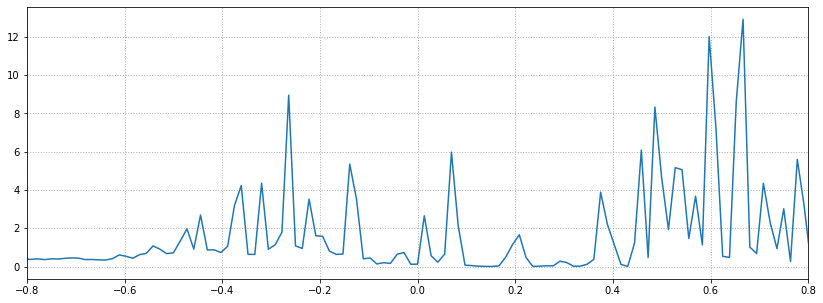

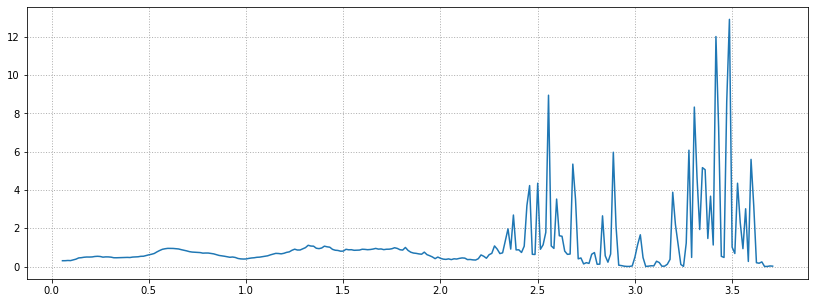

In [41]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
fn3d    = [file3d1]
days    = [1.8]
t_init  = [ '2015-07-17 00Z', '2015-07-17 00Z']

cross_sec = 10
####

clevs  = np.arange(0, 121, 10)
ticks  = np.arange(0, 121, 20)

#clevs2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
clevs2 = [.1, .3, .6, 1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [.1, 1, 10, 100, 1000]

clevs3 = [1, 3, 6, 10, 30, 60, 100]
ticks3 = [1, 10, 100]
clevs3  = np.arange(0, 121, 10)
ticks3  = np.arange(0, 121, 20)

j = 0
x        = fn3d[j].variables['x'][:] / 1000   # $km$
y        = fn3d[j].variables['y'][:] / 1000   # $km$
T3D      = fn3d[j].variables['time'][:]       # time: day
Prec     = fn3d[j].variables['Prec'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
QCPATH   = fn3d[j].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
NCQCPATH = fn3d[j].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
#    NA       = 1e-6 * fn3d[j].variables['NAdPATH'][:] + fn3d[j].variables['NCPATH'][:] + fn3d[j].variables['NRPATH'][:]
NA       = 1e-6 * fn3d[j].variables['NCQCPATH'][:] / fn3d[j].variables['QCPATH'][:] \
+ fn3d[j].variables['NRQRPATH'][:] / fn3d[j].variables['QRPATH'][:]
CLD   = fn3d[j].variables['CLD'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
t3d   = T3D - int(T3D[0])
y_mg, x_mg = np.meshgrid(y, x) # making meshgrid

fig, axis = plt.subplots(1, 1,figsize=(14,5))
plt.plot(t_new, np.nanmax(PRECIP,1))
axis.set_xlim([-.8, .8])
axis.grid(linestyle=':', linewidth=1)

fig, axis = plt.subplots(1, 1,figsize=(14,5))
plt.plot(t3d, np.nanmax(PRECIP,1))
#axis.set_xlim([-.8, .8])
axis.grid(linestyle=':', linewidth=1)


In [42]:
idf = [np.where((t3d < 1.85) & (t3d > 1.75))]
idf

[(array([122, 123, 124, 125, 126, 127, 128, 129]),)]

In [43]:
np.nanmax(PRECIP,1)[idf]

masked_array(data=[[0.92994434, 0.9821779 , 0.94618624, 0.87776506,
                    0.85909563, 0.99717426, 0.8390634 , 0.7487603 ]],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [44]:
t3d[idf]

masked_array(data=[[1.7500305, 1.763916 , 1.7778168, 1.7917023,
                    1.8055878, 1.8194733, 1.833374 , 1.8472595]],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

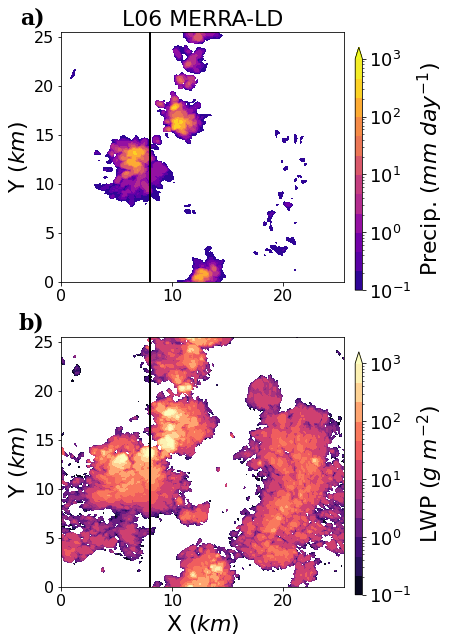

In [45]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
fn3d    = [file3d1]
days    = [1.875]
t_init  = [ '2015-07-17 00Z', '2015-07-17 00Z']

cross_sec = 8
####

clevs  = np.arange(0, 121, 10)
ticks  = np.arange(0, 121, 20)

#clevs2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
clevs2 = [.1, .3, .6, 1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [.1, 1, 10, 100, 1000]

clevs3 = [1, 3, 6, 10, 30, 60, 100]
ticks3 = [1, 10, 100]
clevs3  = np.arange(0, 121, 10)
ticks3  = np.arange(0, 121, 20)

for j in range(len(fn3d)):

    x        = fn3d[j].variables['x'][:] / 1000   # $km$
    y        = fn3d[j].variables['y'][:] / 1000   # $km$
    T3D      = fn3d[j].variables['time'][:]       # time: day
    Prec     = fn3d[j].variables['Prec'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
    QCPATH   = fn3d[j].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn3d[j].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
#    NA       = 1e-6 * fn3d[j].variables['NAdPATH'][:] + fn3d[j].variables['NCPATH'][:] + fn3d[j].variables['NRPATH'][:]
    NA       = 1e-6 * fn3d[j].variables['NCQCPATH'][:] / fn3d[j].variables['QCPATH'][:] \
    + fn3d[j].variables['NRQRPATH'][:] / fn3d[j].variables['QRPATH'][:]
    CWP3d = QCPATH * 1000
    CLD   = fn3d[j].variables['CLD'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
    t3d   = T3D - int(T3D[0])
    y_mg, x_mg = np.meshgrid(y, x) # making meshgrid

    for i in range(len(days)):

        idx = np.where( (t3d > days[i] - 0.01) & (t3d < days[i] + 0.01) )[0][0]
        
        fig, axis = plt.subplots(2, 1,figsize=(5,9))    
        ii = 0
#        axis[ii].contourf(x_mg, y_mg, NA[idx,:,:], 16, cmap = 'viridis', extend='max', norm=matplotlib.colors.LogNorm())
        cc2 = axis[ii].contourf(x, y, Prec[idx,:,:], clevs2, cmap = 'plasma', extend='max', norm=matplotlib.colors.LogNorm())
#        axis[ii].contour(x_mg, y_mg, CLD[idx,:,:], clevs3, c='g')#, extend='max', norm=matplotlib.colors.LogNorm())
        axis[ii].tick_params(axis='both', which='major', labelsize=16)
        axis[ii].set_title('L06 MERRA-LD', fontsize=22) #\nPrecip, Day ' + str(days[i]) + ' (since ' + t_init[j] + ')')                       
        axis[ii].set_ylabel('Y ($km$)', fontsize=22)
#        axis[ii].set_xlabel('X ($km$)', fontsize=18)
        axis[ii].axvline(cross_sec, c='k', linewidth=2)
        axis[ii].text(-0.06, 1.1, 'a)', transform=axis[ii].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        fig.subplots_adjust(right=1.5)
        cbar_ax = fig.add_axes([1.0, 0.55, 0.02, 0.375])
        cbar = fig.colorbar(cc2, cax=cbar_ax, ticks=ticks2, pad = 0.01)
        cbar.ax.tick_params(labelsize=18)
        cbar.ax.set_ylabel('Precip. ($mm$ $day^{-1}$)', fontsize=22)  # , rotation=270
#        plt.tight_layout(w_pad=2)
#        plt.show()
        ii = 1
#        fig, axis[ii] = plt.subplots(1, 1,figsize=(5,5))    
#        axis[ii].contourf(x_mg, y_mg, NA[idx,:,:], 16, cmap = 'viridis', extend='max', norm=matplotlib.colors.LogNorm())
        cc2 = axis[ii].contourf(x, y, CWP3d[idx,:,:], clevs2, cmap = 'magma', extend='max', norm=matplotlib.colors.LogNorm())
#        axis[ii].contour(x_mg, y_mg, CLD[idx,:,:], clevs3, c='g')#, extend='max', norm=matplotlib.colors.LogNorm())
        axis[ii].tick_params(axis='both', which='major', labelsize=16)
        axis[ii].set_ylabel('Y ($km$)', fontsize=22)
        axis[ii].set_xlabel('X ($km$)', fontsize=22)
        axis[ii].axvline(cross_sec, c='k', linewidth=2)
        axis[ii].text(-0.06, 1.1, 'b)', transform=axis[ii].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        fig.subplots_adjust(right=1.5)
        cbar_ax = fig.add_axes([1.0, 0.08, 0.02, 0.375])
        cbar = fig.colorbar(cc2, cax=cbar_ax, ticks=ticks2, pad = 0.01)
        cbar.ax.tick_params(labelsize=18)
        cbar.ax.set_ylabel('LWP ($g$ $m^{-2}$)', fontsize=22)  # , rotation=270
        plt.tight_layout(w_pad=0)
        plt.savefig('RF06_Tr2.3_map_'+period+'.pdf' , format='pdf', dpi=500, bbox_inches='tight')
        plt.show()

#         fig, axis[ii] = plt.subplots(1, 1,figsize=(5,5))    
# #        axis[ii].contourf(x_mg, y_mg, NA[idx,:,:], 16, cmap = 'viridis', extend='max', norm=matplotlib.colors.LogNorm())
#         cc2 = axis[ii].contourf(x, y, NA[idx,:,:], 16, cmap = 'magma', extend='max', norm=matplotlib.colors.LogNorm())
# #        axis[ii].contour(x_mg, y_mg, CLD[idx,:,:], clevs3, c='g')#, extend='max', norm=matplotlib.colors.LogNorm())
#         axis[ii].tick_params(axis[ii]='both', which='major', labelsize=12)
#         axis[ii].set_title('Tr2.3, M-LD\nPrecip, Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)                       
#         axis[ii].set_ylabel('Y ($km$)', fontsize=18)
#         axis[ii].set_xlabel('X ($km$)', fontsize=18)
#         axis[ii].axvline(cross_sec, c='k', linewidth=2)        
#         fig.subplots_adjust(right=1.5)
#         plt.tight_layout(w_pad=2)
#         plt.show()

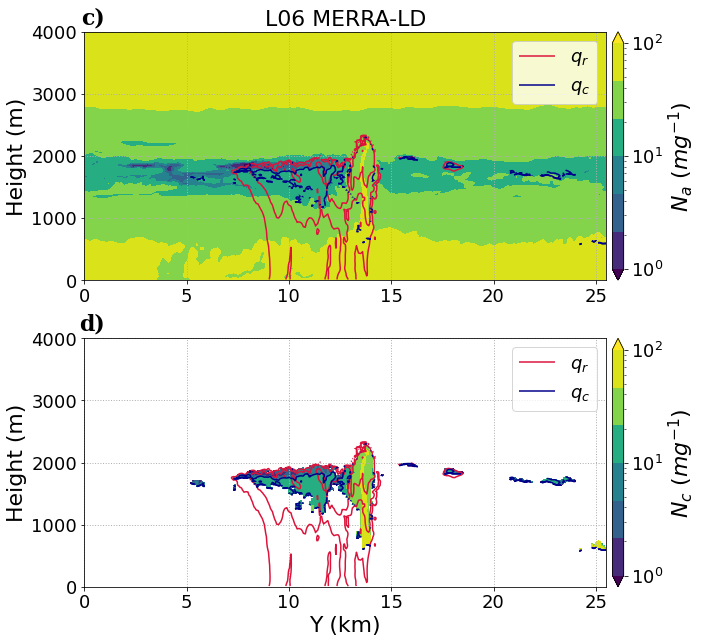

In [33]:
# file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
# file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
# file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
# file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
# file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
# file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file_xyz_7 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000063360.nc')

# file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
# file3d05 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
# file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
# file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
# file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
# file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
# file3d60 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')

fn3d = [file_xyz_7]

j = 0

x      = fn3d[j].variables['x'][:] / 1000   # $km$
y      = fn3d[j].variables['y'][:] / 1000   # $km$
z      = fn3d[j].variables['z'][:]# / 1000   # $km$
t_xyz  = fn3d[j].variables['time'][:]
NA_xyz = fn3d[j].variables['NC'][:] + fn3d[j].variables['NR'][:] + fn3d[j].variables['NAd'][:] 
QR_xyz = fn3d[j].variables['QR'][:] / 1000 # convert to kg/kg
QC_xyz = fn3d[j].variables['QC'][:] / 1000 # convert to kg/kg
NC_xyz = fn3d[j].variables['NC'][:]

x_mg, z_mg = np.meshgrid(x, z) # making meshgrid

#i_y    = np.where(y == cross_sec)[0][0]
#i_x    = np.where(x == x.max() - cross_sec)[0][0]
i_x    = np.where(x == cross_sec)[0][0]
NA_2D  = NA_xyz[0,:,:,i_x]
QR_2D  = QR_xyz[0,:,:,i_x]
NC_2D  = NC_xyz[0,:,:,i_x]
QC_2D  = NC_xyz[0,:,:,i_x]


####
fig, axis = plt.subplots(2, 1,figsize=(10,9))    

i = 0
axis[i].set_ylabel('Height (m)', fontsize=22)
axis[i].set_title('L06 MERRA-LD', fontsize=22)  # + '\n$N_a$ ($mg^{-1}$), day ' + str( round(t_xyz[0] - int(T3D[0]), 3) ) + ' (since ' + t_init[j] + ')'
axis[i].set_ylim([0, ylim])
#axis[i].axes.get_xaxis[i]().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)

clevs  = np.arange(0, 121, 10)
ticks  = np.arange(0, 121, 20)

clevs = [1, 3, 6, 10, 30, 60, 100]
ticks = [1, 10, 100]
x2 = x.max() - x
y2 = y.max() - y

cc = axis[i].contourf(y, z, NA_2D, clevs, extend='both', cmap = 'viridis', norm=matplotlib.colors.LogNorm())
cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks, norm=matplotlib.colors.LogNorm())
cb.ax.set_ylabel('$N_a$ ($mg^{-1}$)', fontsize=22)  # , rotation=270
cb.ax.tick_params(labelsize=18)

#cc1 = axis[i].contour(y2, z, QR_2D, [1e-4, 1e-3], colors='crimson', labels='Q_R')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc1, fontsize=7, inline=1, fmt='%1.0f')
#cc2 = axis[i].contour(y2, z, QC_2D, [1e-5, 1e-4, 1e-3], colors='w', labels='Q_C')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc2, fontsize=7, inline=1, fmt='%1.0f')
cc1 = axis[i].contour(y, z, QR_2D, [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1], colors='crimson', labels='Q_R', norm=matplotlib.colors.LogNorm())
cc2 = axis[i].contour(y, z, QC_2D, [1e-3, 1e-2, 1e-1, 1e1, 1e2], colors='darkblue', labels='Q_C', norm=matplotlib.colors.LogNorm())
#axis[i].legend()
h1,_ = cc1.legend_elements()
h2,_ = cc2.legend_elements()
axis[i].legend([h1[0], h2[0]], ['$q_r$','$q_c$'], fontsize=18)
axis[i].text(0.04, 1.1, 'c)', transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')


######
i = 1
axis[i].set_ylabel('Height (m)', fontsize=22)
axis[i].set_xlabel('Y (km)', fontsize=22)
axis[i].set_ylim([0, ylim])
#axis[i].set_xlim([-.8, .8])
#axis[i].axes.get_xaxis[i]().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)

clevs = [1, 3, 6, 10, 30, 60, 100]
ticks = [1, 10, 100]
x2 = x.max() - x
y2 = y.max() - y

cc = axis[i].contourf(y, z, NC_2D, clevs, extend='both', cmap = 'viridis', norm=matplotlib.colors.LogNorm())
cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks, norm=matplotlib.colors.LogNorm())
cb.ax.set_ylabel('$N_c$ ($mg^{-1}$)', fontsize=22)  # , rotation=270
cb.ax.tick_params(labelsize=18)

#cc1 = axis[i].contour(y2, z, QR_2D, [1e-4, 1e-3], colors='crimson', labels='Q_R')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc1, fontsize=7, inline=1, fmt='%1.0f')
#cc2 = axis[i].contour(y2, z, QC_2D, [1e-5, 1e-4, 1e-3], colors='k', labels='Q_C')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc2, fontsize=7, inline=1, fmt='%1.0f')
cc1 = axis[i].contour(y, z, QR_2D, [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1], colors='crimson', labels='Q_R', norm=matplotlib.colors.LogNorm())
cc2 = axis[i].contour(y, z, QC_2D, [1e-3, 1e-2, 1e-1, 1e1, 1e2], colors='darkblue', labels='Q_C', norm=matplotlib.colors.LogNorm())

#axis[i].legend()
h1,_ = cc1.legend_elements()
h2,_ = cc2.legend_elements()
axis[i].legend([h1[0], h2[0]], ['$q_r$','$q_c$'], fontsize=18)
axis[i].text(0.04, 1.1, 'd)', transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

plt.tight_layout(w_pad=2)
plt.savefig('RF06_Tr2.3_y_z_'+period+'.pdf' , format='pdf', dpi=500, bbox_inches='tight')

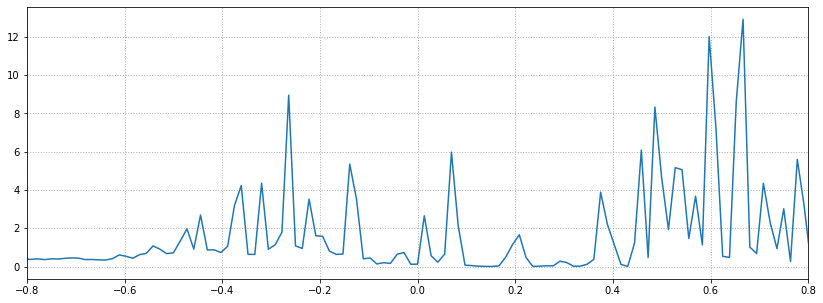

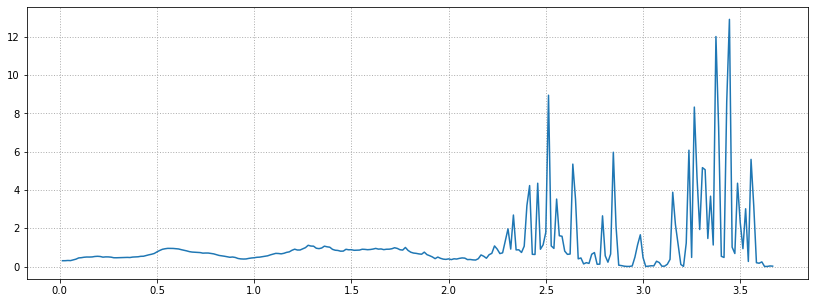

In [35]:
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
fn3d    = [file3d3]
days    = [1.8]
t_init  = [ '2015-07-27 00Z', '2015-07-27 00Z']

cross_sec = 10
####

clevs  = np.arange(0, 121, 10)
ticks  = np.arange(0, 121, 20)

#clevs2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
clevs2 = [.1, .3, .6, 1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [.1, 1, 10, 100, 1000]

clevs3 = [1, 3, 6, 10, 30, 60, 100]
ticks3 = [1, 10, 100]
clevs3  = np.arange(0, 121, 10)
ticks3  = np.arange(0, 121, 20)

j = 0
x        = fn3d[j].variables['x'][:] / 1000   # $km$
y        = fn3d[j].variables['y'][:] / 1000   # $km$
T3D      = fn3d[j].variables['time'][:]       # time: day
Prec     = fn3d[j].variables['Prec'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
QCPATH   = fn3d[j].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
NCQCPATH = fn3d[j].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
#    NA       = 1e-6 * fn3d[j].variables['NAdPATH'][:] + fn3d[j].variables['NCPATH'][:] + fn3d[j].variables['NRPATH'][:]
NA       = 1e-6 * fn3d[j].variables['NCQCPATH'][:] / fn3d[j].variables['QCPATH'][:] \
+ fn3d[j].variables['NRQRPATH'][:] / fn3d[j].variables['QRPATH'][:]
CLD   = fn3d[j].variables['CLD'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
t3d   = T3D - int(T3D[0])
y_mg, x_mg = np.meshgrid(y, x) # making meshgrid

fig, axis = plt.subplots(1, 1,figsize=(14,5))
plt.plot(t_new, np.nanmax(PRECIP,1))
axis.set_xlim([-.8, .8])
axis.grid(linestyle=':', linewidth=1)

fig, axis = plt.subplots(1, 1,figsize=(14,5))
plt.plot(t3d, np.nanmax(PRECIP,1))
#axis.set_xlim([-.8, .8])
axis.grid(linestyle=':', linewidth=1)


In [36]:
idf = [np.where((t3d < 3.4) & (t3d > 3.3))]
idf

[(array([237, 238, 239, 240, 241, 242, 243]),)]

In [37]:
np.nanmax(PRECIP,1)[idf]

masked_array(data=[[ 5.167807 ,  5.058831 ,  1.4664148,  3.6752486,
                     1.125376 , 12.018182 ,  7.2537127]],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [38]:
t3d[idf]

masked_array(data=[[3.3055573, 3.3194427, 3.3333282, 3.347229 ,
                    3.3611145, 3.375    , 3.3888855]],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

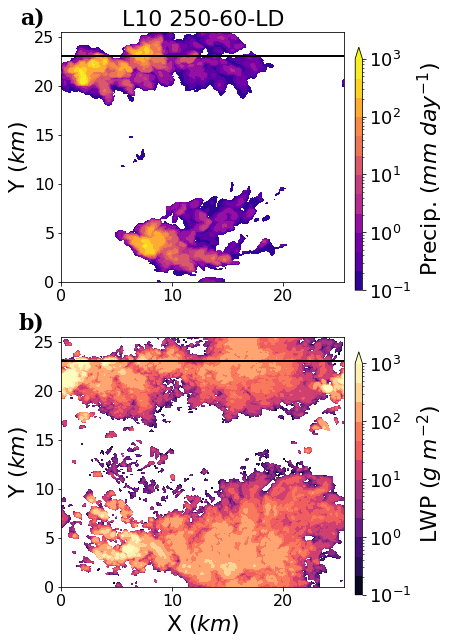

In [39]:
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
fn3d    = [file3d3]
days    = [3.375]
t_init  = [ '2015-07-27 00Z', '2015-07-27 00Z']

cross_sec = 23
####

clevs  = np.arange(0, 121, 10)
ticks  = np.arange(0, 121, 20)

clevs2 = [.1, .3, .6, 1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [.1, 1, 10, 100, 1000]

clevs3 = [1, 3, 6, 10, 30, 60, 100]
ticks3 = [1, 10, 100]
clevs3  = np.arange(0, 121, 10)
ticks3  = np.arange(0, 121, 20)

for j in range(len(fn3d)):

    x        = fn3d[j].variables['x'][:] / 1000   # $km$
    y        = fn3d[j].variables['y'][:] / 1000   # $km$
    T3D      = fn3d[j].variables['time'][:]       # time: day
    Prec     = fn3d[j].variables['Prec'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
    QCPATH   = fn3d[j].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn3d[j].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
#    NA       = 1e-6 * fn3d[j].variables['NAdPATH'][:] + fn3d[j].variables['NCPATH'][:] + fn3d[j].variables['NRPATH'][:]
    NA       = 1e-6 * fn3d[j].variables['NCQCPATH'][:] / fn3d[j].variables['QCPATH'][:] \
    + fn3d[j].variables['NRQRPATH'][:] / fn3d[j].variables['QRPATH'][:]
    CWP3d = QCPATH * 1000
    CLD   = fn3d[j].variables['CLD'][:]    # Column cloud liquid mass (vertically integrated), unit: g/m2
    t3d   = T3D - int(T3D[0])
    y_mg, x_mg = np.meshgrid(y, x) # making meshgrid

    for i in range(len(days)):

        idx = np.where( (t3d > days[i] - 0.01) & (t3d < days[i] + 0.01) )[0][0]
        
        fig, axis = plt.subplots(2, 1,figsize=(5,9))    
        ii = 0
#        axis[ii].contourf(x_mg, y_mg, NA[idx,:,:], 16, cmap = 'viridis', extend='max', norm=matplotlib.colors.LogNorm())
        cc2 = axis[ii].contourf(x, y, Prec[idx,:,:], clevs2, cmap = 'plasma', extend='max', norm=matplotlib.colors.LogNorm())
#        axis[ii].contour(x_mg, y_mg, CLD[idx,:,:], clevs3, c='g')#, extend='max', norm=matplotlib.colors.LogNorm())
        axis[ii].tick_params(axis='both', which='major', labelsize=16)
        axis[ii].set_title('L10 250-60-LD', fontsize=22)                       
        axis[ii].set_ylabel('Y ($km$)', fontsize=22)
#        axis[ii].set_xlabel('X ($km$)', fontsize = '14')
        axis[ii].axhline(cross_sec, c='k', linewidth=2)
        axis[ii].text(-0.06, 1.1, 'a)', transform=axis[ii].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        fig.subplots_adjust(right=1.5)
        cbar_ax = fig.add_axes([1.0, 0.55, 0.02, 0.375])
        cbar = fig.colorbar(cc2, cax=cbar_ax, ticks=ticks2)
        cbar.ax.tick_params(labelsize=18)
        cbar.ax.set_ylabel('Precip. ($mm$ $day^{-1}$)', fontsize=22)  # , rotation=270
#        plt.tight_layout(w_pad=2)
#        plt.show()
        ii = 1
#        fig, axis[ii] = plt.subplots(1, 1,figsize=(5,5))    
#        axis[ii].contourf(x_mg, y_mg, NA[idx,:,:], 16, cmap = 'viridis', extend='max', norm=matplotlib.colors.LogNorm())
        cc2 = axis[ii].contourf(x, y, CWP3d[idx,:,:], clevs2, cmap = 'magma', extend='max', norm=matplotlib.colors.LogNorm())
#        axis[ii].contour(x_mg, y_mg, CLD[idx,:,:], clevs3, c='g')#, extend='max', norm=matplotlib.colors.LogNorm())
        axis[ii].tick_params(axis='both', which='major', labelsize=16)
        axis[ii].set_ylabel('Y ($km$)', fontsize=22)
        axis[ii].set_xlabel('X ($km$)', fontsize=22)
        axis[ii].axhline(cross_sec, c='k', linewidth=2)
        axis[ii].text(-0.06, 1.1, 'b)', transform=axis[ii].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        fig.subplots_adjust(right=1.5)
        cbar_ax = fig.add_axes([1.0, 0.08, 0.02, 0.375])
        cbar = fig.colorbar(cc2, cax=cbar_ax, ticks=ticks2)
        cbar.ax.tick_params(labelsize=18)
        cbar.ax.set_ylabel('LWP ($g$ $m^{-2}$)', fontsize=22)  # , rotation=270
        plt.tight_layout(w_pad=2)
        plt.savefig('RF10_Tr6.0_map_'+period+'.pdf' , format='pdf', dpi=500, bbox_inches='tight')

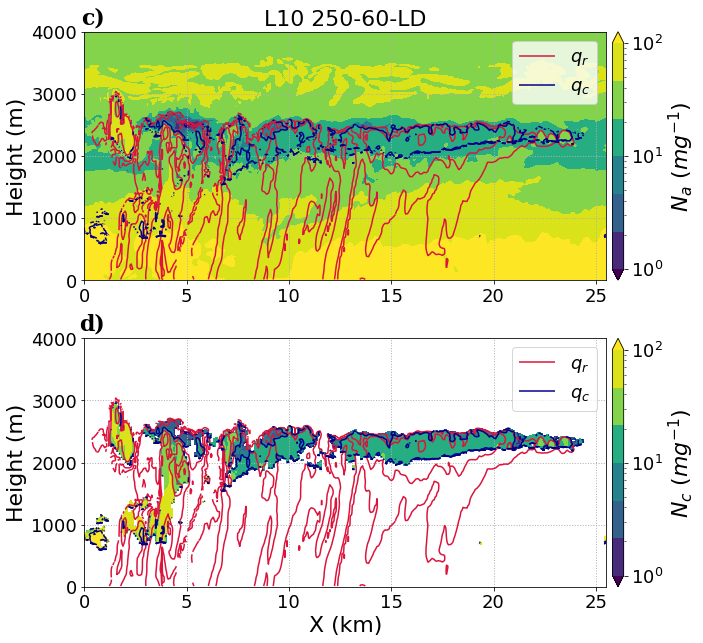

In [40]:
# file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
# file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
# file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
# file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
# file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
# file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file_xyz_7 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_3D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128_0000061920.nc')

# file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
# file3d05 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
# file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
# file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
# file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
# file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file_xyz_60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_3D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128_0000116640.nc')

fn3d = [file_xyz_60]

j = 0

x      = fn3d[j].variables['x'][:] / 1000   # $km$
y      = fn3d[j].variables['y'][:] / 1000
# $km$
z      = fn3d[j].variables['z'][:]# / 1000   # $km$
t_xyz  = fn3d[j].variables['time'][:]
NA_xyz = fn3d[j].variables['NC'][:] + fn3d[j].variables['NR'][:] + fn3d[j].variables['NAd'][:] 
QR_xyz = fn3d[j].variables['QR'][:] / 1000 # convert to kg/kg
QC_xyz = fn3d[j].variables['QC'][:] / 1000 # convert to kg/kg
NC_xyz = fn3d[j].variables['NC'][:]

x_mg, z_mg = np.meshgrid(x, z) # making meshgrid

#i_x    = np.where(x == cross_sec)[0][0]
i_y    = np.where(y == cross_sec)[0][0]
NA_2D  = NA_xyz[0,:,i_y,:]
QR_2D  = QR_xyz[0,:,i_y,:]
NC_2D  = NC_xyz[0,:,i_y,:]
QC_2D  = NC_xyz[0,:,i_y,:]


####
fig, axis = plt.subplots(2, 1,figsize=(10,9))    

i = 0
axis[i].set_ylabel('Height (m)', fontsize=22)
axis[i].set_title('L10 250-60-LD', fontsize=22)
axis[i].set_ylim([0, ylim])
#axis[i].set_xlim([-.8, .8])
#axis[i].axes.get_xaxis[i]().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)

clevs  = np.arange(0, 121, 10)
ticks  = np.arange(0, 121, 20)

clevs = [1, 3, 6, 10, 30, 60, 100]
ticks = [1, 10, 100]
x2 = x.max() - x
y2 = y.max() - y

cc = axis[i].contourf(y, z, NA_2D, clevs, extend='both', cmap = 'viridis', norm=matplotlib.colors.LogNorm())
cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks, norm=matplotlib.colors.LogNorm())
cb.ax.set_ylabel('$N_a$ ($mg^{-1}$)', fontsize=22)  # , rotation=270
cb.ax.tick_params(labelsize=18)

#cc1 = axis[i].contour(y2, z, QR_2D, [1e-4, 1e-3], colors='crimson', labels='Q_R')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc1, fontsize=7, inline=1, fmt='%1.0f')
#cc2 = axis[i].contour(y2, z, QC_2D, [1e-5, 1e-4, 1e-3], colors='w', labels='Q_C')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc2, fontsize=7, inline=1, fmt='%1.0f')
cc1 = axis[i].contour(y, z, QR_2D, [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1], colors='crimson', labels='Q_R', norm=matplotlib.colors.LogNorm())
cc2 = axis[i].contour(y, z, QC_2D, [1e-3, 1e-2, 1e-1, 1e1, 1e2], colors='darkblue', labels='Q_C', norm=matplotlib.colors.LogNorm())
#axis[i].legend()
h1,_ = cc1.legend_elements()
h2,_ = cc2.legend_elements()
axis[i].legend([h1[0], h2[0]], ['$q_r$','$q_c$'], fontsize =18)
axis[i].text(0.04, 1.1, 'c)', transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

######

i = 1
axis[i].set_ylabel('Height (m)', fontsize=22)
axis[i].set_xlabel('X (km)', fontsize=22)
axis[i].set_ylim([0, ylim])
#axis[i].set_xlim([-.8, .8])
#axis[i].axes.get_xaxis[i]().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)

clevs = [1, 3, 6, 10, 30, 60, 100]
ticks = [1, 10, 100]
x2 = x.max() - x
y2 = y.max() - y

cc = axis[i].contourf(y, z, NC_2D, clevs, extend='both', cmap = 'viridis', norm=matplotlib.colors.LogNorm())
cb = plt.colorbar(cc, ax = axis[i], pad = 0.01, ticks=ticks, norm=matplotlib.colors.LogNorm())
cb.ax.set_ylabel('$N_c$ ($mg^{-1}$)', fontsize=22)  # , rotation=270
cb.ax.tick_params(labelsize=18)

#cc1 = axis[i].contour(y2, z, QR_2D, [1e-4, 1e-3], colors='crimson', labels='Q_R')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc1, fontsize=7, inline=1, fmt='%1.0f')
#cc2 = axis[i].contour(y2, z, QC_2D, [1e-5, 1e-4, 1e-3], colors='k', labels='Q_C')#, norm=matplotlib.colors.LogNorm())
#axis[i].clabel(cc2, fontsize=7, inline=1, fmt='%1.0f')
cc1 = axis[i].contour(y, z, QR_2D, [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1], colors='crimson', labels='Q_R', norm=matplotlib.colors.LogNorm())
cc2 = axis[i].contour(y, z, QC_2D, [1e-3, 1e-2, 1e-1, 1e1, 1e2], colors='darkblue', labels='Q_C', norm=matplotlib.colors.LogNorm())

#axis[i].legend()
h1,_ = cc1.legend_elements()
h2,_ = cc2.legend_elements()
axis[i].legend([h1[0], h2[0]], ['$q_r$','$q_c$'], fontsize = '18')
axis[i].text(0.04, 1.1, 'd)', transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

plt.tight_layout(w_pad=2)
plt.savefig('RF10_Tr6.0_x_z_'+period+'.pdf' , format='pdf', dpi=500, bbox_inches='tight')

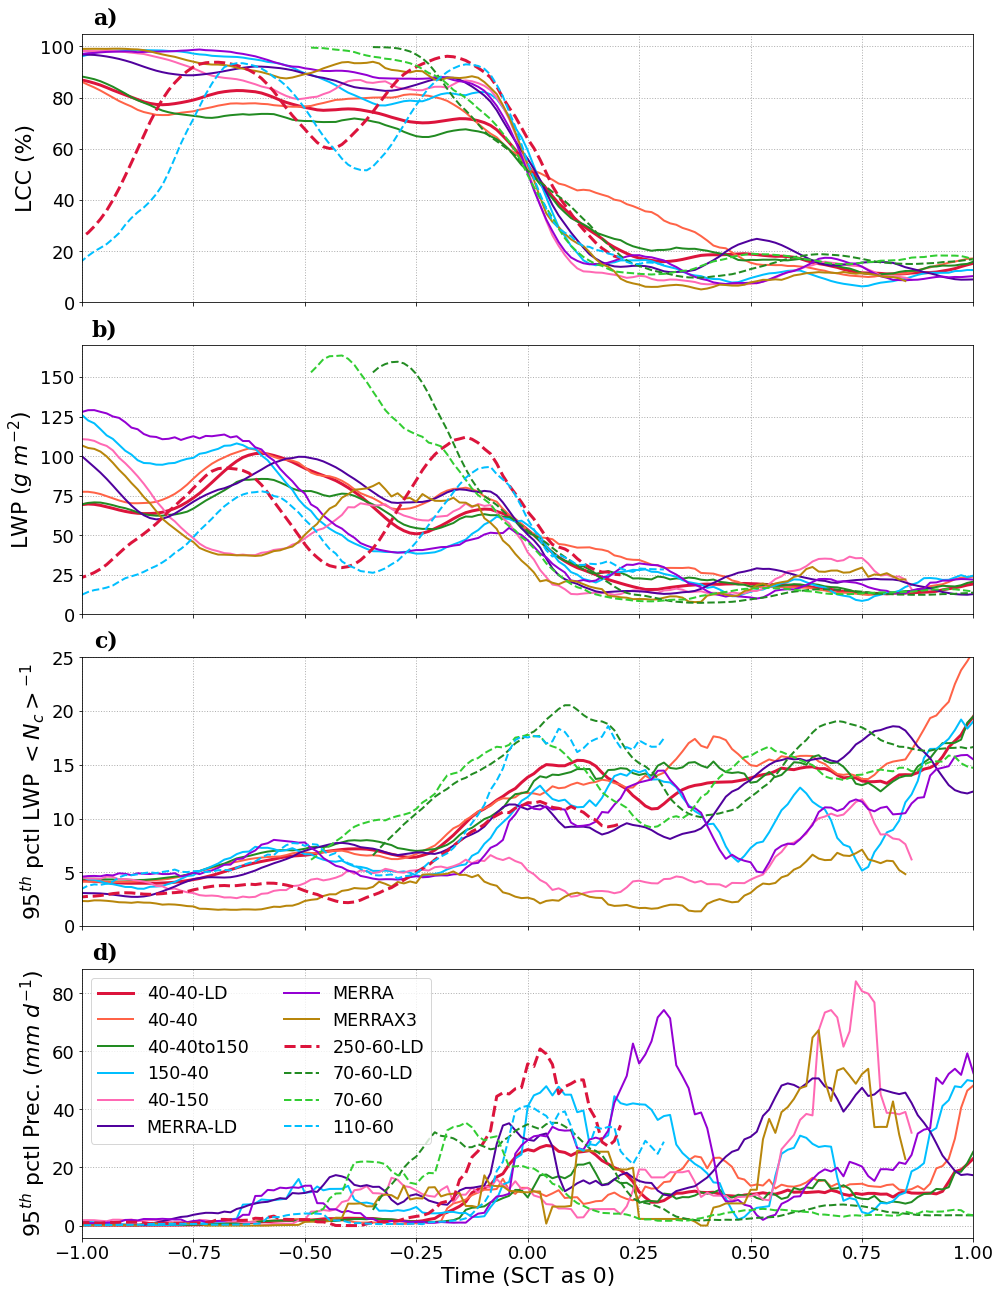

In [47]:
# Calculate the timeseries of var2 when averaged over the 5-10% of the domain with the largest var.
def calc_strong_tseries(var, var2, perc):
    outx = var[:,0,0].copy()
    outx[:] = np.nan
    for i in range(var.shape[0]):
        var_x = np.percentile(var[i,:,:], perc)
        ix = np.where(var[i,:,:] >= var_x)
        outx[i] = np.nanmean(var2[i,:,:][ix])
    return outx

def smooth_ends(var, box):
    out = var.copy()
    out = smooth(var, box)
    out[:box] = np.nan
    out[-box:] = np.nan
    #out = np.concatenate([var[:box], smooth(var, box)[box:]])#-box, var[-box:]])
    return out

file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file3d4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file3d5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d6 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d7 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')

file3d00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
file3d05 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file3d20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
file3d30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file3d50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')


###
fn3d   = [file3d0,  file3d1,  file3d2,  file3d3,  file3d4,  file3d5,  file3d6, file3d7,\
         file3d00,  file3d05, file3d10, file3d20, file3d30, file3d40, file3d50,file3d60]
lw2      = ['3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '2', '2', '2']

lngh = 6
box  = 10
box2 = 20

cases = [0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8   , 10   , 11  , 12]
ls2   = ['-', '-', '-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '--', '--', '--']

PANELS = ['a)', 'b)', 'c)', 'd)']

###########
fig1, axis = plt.subplots(4, 1,figsize=(14,18))

i = 0
#axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].set_ylabel('LCC (%)', fontsize=22)
axis[i].set_ylim([0, 105])
axis[i].set_xlim([-1, 1])
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].text(0.04, 1.1, PANELS[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

i = 1
axis[i].set_ylabel('LWP ($g$ $m^{-2}$)', fontsize=22)
axis[i].set_ylim([0, 170])
axis[i].set_xlim([-1, 1])
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].text(0.04, 1.1, PANELS[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

i = 2
axis[i].set_ylabel('95$^{th}$ pctl LWP $<N_c>^{-1}$', fontsize=22)
axis[i].set_ylim([0, 25])
axis[i].set_xlim([-1, 1])
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].text(0.04, 1.1, PANELS[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

i = 3
axis[i].set_xlabel('Time (SCT as 0)', fontsize=22)
axis[i].set_ylabel('95$^{th}$ pctl Prec. ($mm$ $d^{-1}$)', fontsize=22)
#axis[i].set_ylim([-2, 30])
axis[i].set_xlim([-1, 1])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].text(0.04, 1.1, PANELS[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
for jj in cases:
    T3D      = fn3d[jj].variables['time'][:]       # time: day
    t3d      = T3D - int(T3D[0])    
#    x        = fn3d[jj].variables['x'][:] / 1000   # $km$
#    y        = fn3d[jj].variables['y'][:] / 1000   # $km$
    CLD2d    = fn3d[jj].variables['CLD'][:] 
    Prec     = fn3d[jj].variables['Prec'][:] # * 1000    # Surface Precip. Rate: g/m
    QCPATH   = fn3d[jj].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn3d[jj].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = NCQCPATH / QCPATH     # #/mg
    CDNC     = CDNC * 1e-6    # #/mg
#    x_mg, y_mg = np.meshgrid(x, y) # making meshgrid

    CWP3d    = QCPATH * 1000 # + QP
    CWP_Nc   = CWP3d / CDNC
    CWP_m_Nc = CWP3d * CDNC
#   looking at the timeseries of CWP/Nd when averaged over the 5-10% of the domain with the largest CWP.
    CWP_Nc95 = calc_strong_tseries(CWP3d, CWP_Nc, 95)    
    Prec95 = calc_strong_tseries(Prec, Prec, 95)
#    Prec95 = calc_strong_tseries(Prec, Prec, 95)
#    CWP3d95 = calc_strong_tseries(CWP3d, CWP3d, 95)

    CLD2d_m = np.nanmean(np.nanmean(CLD2d,2),1)
    i_50 = np.where((CLD2d_m > 48) & ((CLD2d_m < 52)))[0]
    if len(i_50) == 0:
        i_50 = np.where((CLD2d_m > 45) & ((CLD2d_m < 55)))[0]       
    if lb[jj] == '110-60' or lb[jj] == '250-60-LD':
        i_sct = -1
    else:
        i_sct = 0
    t_sct = t3d[i_50[i_sct]]
    
    t_new = t3d - t_sct
    
    i = 0
    axis[i].plot(t_new, smooth_ends(CLD2d_m, box), ls2[jj], linewidth= lw2[jj], color=color2[jj], label = lb[jj])    
    i = 1
    axis[i].plot(t_new, smooth_ends(np.nanmean(np.nanmean(CWP3d,2),1), box), ls2[jj], linewidth= lw2[jj], color=color2[jj], label = lb[jj])    
    i = 2
    axis[i].plot(t_new, smooth_ends(CWP_Nc95, box), ls2[jj], linewidth= lw2[jj], color=color2[jj], label = lb[jj])
    i = 3
    axis[i].plot(t_new, smooth_ends(Prec95, box),   ls2[jj], linewidth= lw2[jj], color=color2[jj], label = lb[jj])
    axis[i].legend(fontsize=17.5, loc='upper left', ncol=2)
plt.tight_layout()  # w_pad=1
plt.savefig('all_SCT.pdf' , format='pdf', dpi=500)

## Scatter plots

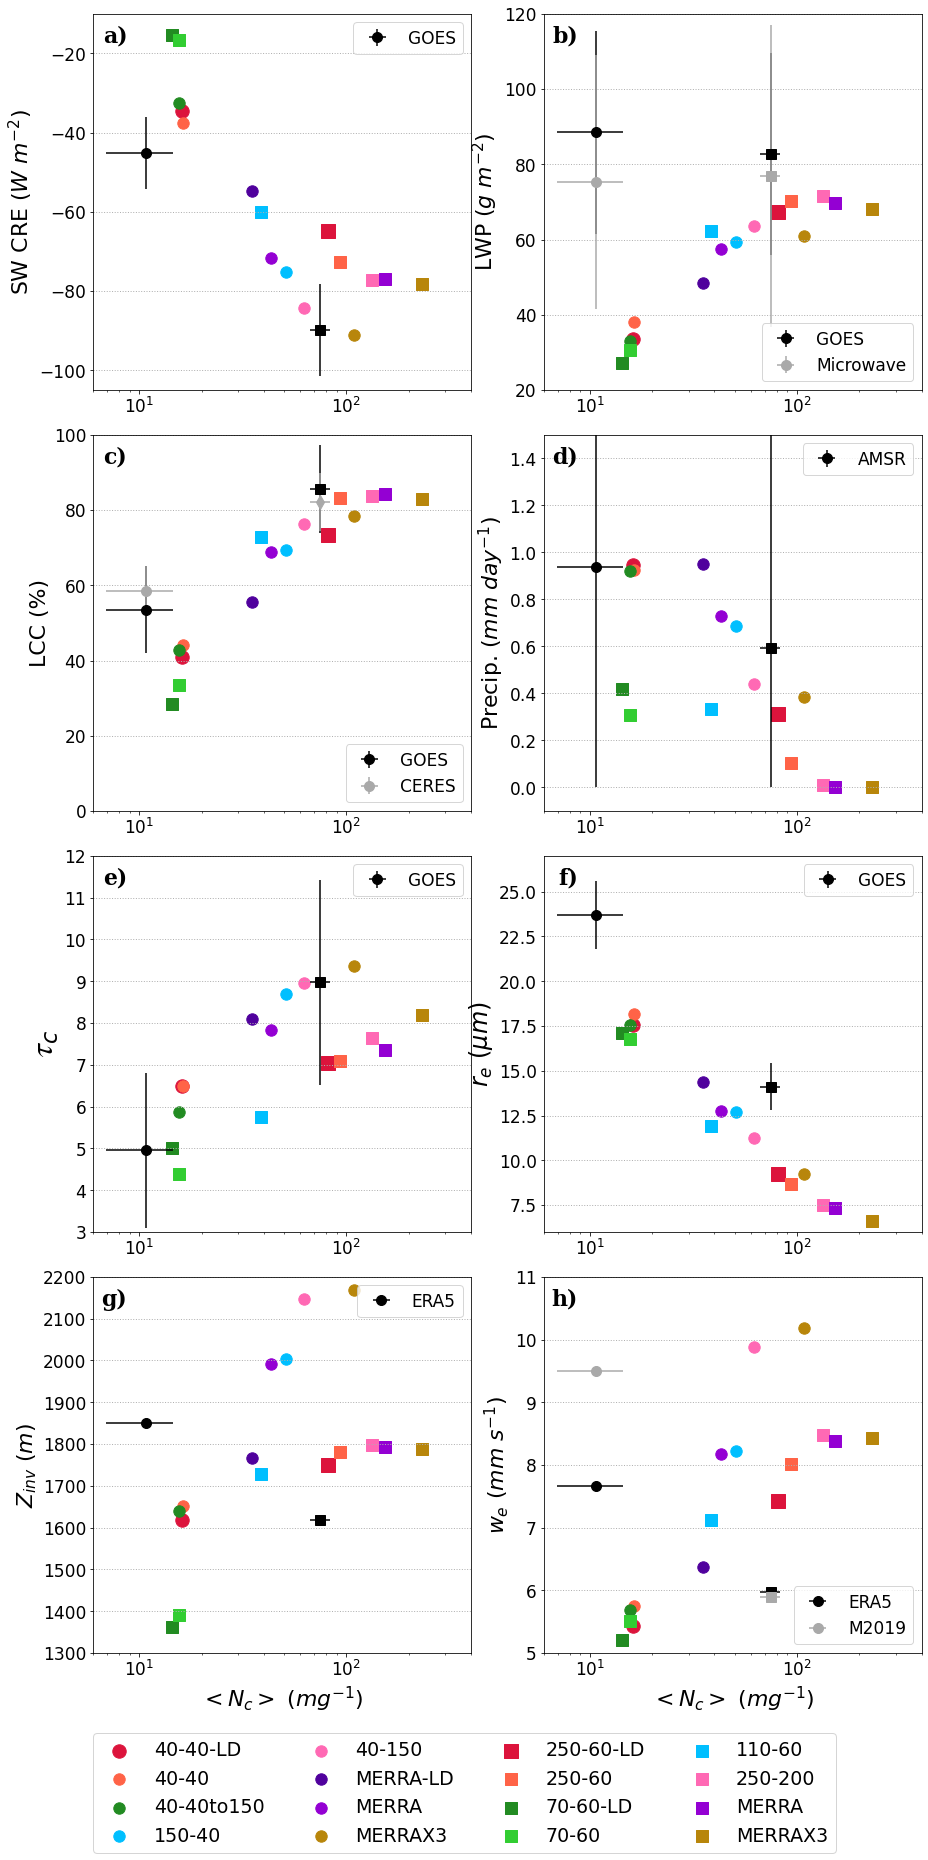

In [12]:
### Entrainment values from Mohrmann et al. (2019):
M_entr1 = 9.5; M_entr2 = 5.9 # mm/s

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']


#########
file2d   = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file2d1  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file2d2  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file2d3  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file2d4  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file2d5  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file2d6  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d7  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')

file2d00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
file2d10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file2d20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file2d30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
file2d40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file2d50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file2d60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d70 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')


fn2d     = [file2d , file2d1 , file2d2 , file2d3 , file2d4 , file2d5 , file2d6 ,  file2d7,\
           file2d00, file2d10, file2d20, file2d30, file2d40, file2d50, file2d60,  file2d70]

#########
fig, axis = plt.subplots(4, 2,figsize=(13,24))

###
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(file)

CERES_sw_cre, CERES_sw_cre_std, GOES_Nd, goes_Nd_final_std, goes_lwp_mean, GOES_lwp_std, GOES_LCC, goes_LCC_std,\
           CERES_cld, CERES_cld_std, SSMI_lwp, SSMI_lwp_std, AMSR_lwp, AMSR_lwp_std, microwave_lwp, microwave_lwp_std,\
          goes_cod_mean, goes_cod_all_std, goes_re_mean, goes_re_all_std, ERA_ZINV, ERA_entr,\
          AMSR_prec, AMSR_prec_std, GOES_time, MERRA_time2 = read_obs_Tr2p3()


###
ceres_cld_up = np.nanmean(CERES_cld_std)
ceres_cld_dn = np.nanmean(CERES_cld_std)
if np.nanmean(CERES_cld) + ceres_cld_up > 100:
    ceres_cld_up = 100 - np.nanmean(CERES_cld)
    
goes_cld_up = np.nanmean(goes_LCC_std)
goes_cld_dn = np.nanmean(goes_LCC_std)
if np.nanmean(GOES_LCC) + goes_cld_up > 100:
    goes_cld_up = 100 - np.nanmean(GOES_LCC)

AMSR_prec_up = np.nanmean(AMSR_prec_std)
AMSR_prec_dn = np.nanmean(AMSR_prec_std)
if np.nanmean(AMSR_prec) - AMSR_prec_dn < 0:
    AMSR_prec_dn = np.nanmean(AMSR_prec)

###
i = 0; j = 0
axis[i,j].set_ylabel('SW CRE ($W$ $m^{-2}$)', fontsize=22)
#axis[i,j].set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
#axis[i,j].set_title('Tr6.0', fontsize=26)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([-105, -10])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(CERES_sw_cre) \
    , xerr = np.nanmean(goes_Nd_final_std), yerr = np.nanmean(CERES_sw_cre_std), markersize=10, fmt='o', color='k', label='GOES')
#, xerr = [[abs(np.nanmean(GOES_Nd) - np.nanmean(goes_Nd_25))], [abs(np.nanmean(goes_Nd_75) - np.nanmean(GOES_Nd_med))]]\
axis[i,j].legend(fontsize=17)#, loc='lower right')
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 0; j = 1
axis[i,j].set_ylabel('LWP ($g$ $m^{-2}$)', fontsize=22)
#axis[i,j].set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([20, 120])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(goes_lwp_mean), yerr = np.nanmean(GOES_lwp_std), \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='o', color='k', label='GOES')
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(microwave_lwp), yerr = np.nanmean(microwave_lwp_std), \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='o', color='darkgrey', label='Microwave')
axis[i,j].legend(fontsize=17, loc='lower right')
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 1; j = 0
axis[i,j].set_ylabel('LCC (%)', fontsize=22)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([0, 100])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
obs1 = axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(GOES_LCC) \
             , yerr = [[goes_cld_dn], [goes_cld_up]], xerr =  np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='o', color='k')#, label='GOES')
obs2 = axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(CERES_cld) \
             , yerr = [[ceres_cld_dn], [ceres_cld_up]], xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='o', color='darkgrey')#, label='CERES')
#axis[i,j].legend(fontsize=17)#, loc='lower right')
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

#####
i = 1; j = 1
axis[i,j].set_ylabel('Precip. ($mm$ ${day}^{-1}$)', fontsize=22)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([-0.1, 1.5])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(AMSR_prec), yerr = [[AMSR_prec_dn], [AMSR_prec_up]], \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='o', color='k', label='AMSR')
axis[i,j].legend(fontsize=17)#, loc='lower right')
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
i = 2; j = 0
axis[i,j].set_ylabel('$𝜏_c$', fontsize=32)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([3, 12])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(goes_cod_mean), yerr = np.nanmean(goes_cod_all_std), \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='o', color='k', label='GOES')
axis[i,j].legend(fontsize=17)
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 2; j = 1
axis[i,j].set_ylabel('$r_e$ ($μm$)', fontsize=24)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([6, 27])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(goes_re_mean), yerr = np.nanmean(goes_re_all_std), \
               xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='o', color='k', label='GOES')
axis[i,j].legend(fontsize=17)
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 3; j = 0
axis[i,j].set_ylabel('$Z_{inv}$ ($m$)', fontsize=22)
axis[i,j].set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([1300, 2200])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(ERA_ZINV), xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='o', color='k', label='ERA5')
axis[i,j].legend(fontsize=17)
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

#####
i = 3; j = 1
axis[i,j].set_ylabel('$w_e$ ($mm$ $s^{-1}$)', fontsize=22)
axis[i,j].set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
axis[i,j].set_xscale('log')
axis[i,j].set_xlim([6, 400])
axis[i,j].set_ylim([5, 11])
axis[i,j].tick_params(axis='both', which='major', labelsize=17)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(ERA_entr), xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='o', color='k', label='ERA5')
axis[i,j].errorbar(np.nanmean(GOES_Nd), M_entr1, xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='o', color='darkgrey', label='M2019')
axis[i,j].legend(fontsize=17, loc='lower right')
axis[i,j].text(0.09, .97, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')


########
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(file00)

CERES_sw_cre, CERES_sw_cre_std, GOES_Nd, goes_Nd_final_std, goes_lwp_mean, GOES_lwp_std, GOES_LCC, goes_LCC_std,\
           CERES_cld, CERES_cld_std, SSMI_lwp, SSMI_lwp_std, AMSR_lwp, AMSR_lwp_std, microwave_lwp, microwave_lwp_std,\
          goes_cod_mean, goes_cod_all_std, goes_re_mean, goes_re_all_std, ERA_ZINV, ERA_entr,\
          AMSR_prec, AMSR_prec_std, GOES_time, MERRA_time2 = read_obs_Tr6p0()

###
ceres_cld_up = np.nanmean(CERES_cld_std)
ceres_cld_dn = np.nanmean(CERES_cld_std)
if np.nanmean(CERES_cld) + ceres_cld_up > 100:
    ceres_cld_up = 100 - np.nanmean(CERES_cld)
    
goes_cld_up = np.nanmean(goes_LCC_std)
goes_cld_dn = np.nanmean(goes_LCC_std)
if np.nanmean(GOES_LCC) + goes_cld_up > 100:
    goes_cld_up = 100 - np.nanmean(GOES_LCC)

AMSR_prec_up = np.nanmean(AMSR_prec_std)
AMSR_prec_dn = np.nanmean(AMSR_prec_std)
if np.nanmean(AMSR_prec) - AMSR_prec_dn < 0:
    AMSR_prec_dn = np.nanmean(AMSR_prec)
###

i = 0; j = 0
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(CERES_sw_cre) \
    , xerr = np.nanmean(goes_Nd_final_std), yerr = np.nanmean(CERES_sw_cre_std), markersize=10, fmt='s', color='k')#, label='GOES')

####
i = 0; j = 1
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(goes_lwp_mean), yerr = np.nanmean(GOES_lwp_std), \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='s', color='k', label='GOES')
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(microwave_lwp), yerr = np.nanmean(microwave_lwp_std), \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='s', color='darkgrey', label='Microwave')

####
i = 1; j = 0
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(GOES_LCC) \
             , yerr = [[goes_cld_dn], [goes_cld_up]], xerr =  np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='s', color='k')#, label='GOES')
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(CERES_cld) \
             , yerr = [[ceres_cld_dn], [ceres_cld_up]], xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='d', color='darkgrey')#, label='CERES')

#####
i = 1; j = 1
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(AMSR_prec), yerr = [[AMSR_prec_dn], [AMSR_prec_up]], \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='s', color='k', label='AMSR')


############
i = 2; j = 0
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(goes_cod_mean), yerr = np.nanmean(goes_cod_all_std), \
                   xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='s', color='k', label='GOES')

####
i = 2; j = 1
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(goes_re_mean), yerr = np.nanmean(goes_re_all_std), \
               xerr = np.nanmean(goes_Nd_final_std), markersize=10, fmt='s', color='k', label='GOES')

####
i = 3; j = 0
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(ERA_ZINV), xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='s', color='k', label='ERA5')

#####
i = 3; j = 1
axis[i,j].errorbar(np.nanmean(GOES_Nd), np.nanmean(ERA_entr), xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='s', color='k', label='ERA5')
axis[i,j].errorbar(np.nanmean(GOES_Nd), M_entr2, xerr = np.nanmean(goes_Nd_final_std)\
             , markersize=10, fmt='s', color='darkgrey', label='M2019')


LESs = []
###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])
    
    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP# + RWP
    LWP_m = LWP.copy()
    
    ######
    T3D      = fn2d[ii].variables['time'][:]       # time: day
    QCPATH   = fn2d[ii].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn2d[ii].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
    t3d   = T3D - int(T3D[0])

    CDNC_m = CDNC[:,0,0].copy()
    CDNC_m[:] = np.nan
    for jj in range(len(CDNC_m)):
        CDNC_m[jj] = np.nanmean(CDNC[jj,:,:])

    ##########
    i = 0    
    j = 0
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nanmean(SW_CRE), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii])
    
    ####
    j = 1
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nanmean(LWP_m), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii]) 
    
    #### = 2
    i = 1
    j = 0
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nanmean(LCC) * 100, \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii]) 
#    leg1 = axis[i,j].legend(fontsize=17, loc='lower right', ncol=2)        
    
    ####
    j = 1
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nanmean(PREC),\
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii])
    
    ##########
    i = 2
    j = 0
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nansum(SOLIN2 * COD / ISCCPTOT) / np.nansum(SOLIN2), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii])
    
    ####
    j = 1
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nansum(SOLIN2 * SAM_re) / np.nansum(SOLIN2), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii]) 
    
    ####
    i = 3
    j = 0
    axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nanmean(ZINV), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii]) 

    ####
    j = 1
    LES = axis[i,j].scatter(np.nansum(SOLIN2 * CDNC_m) / np.nansum(SOLIN2), np.nanmean(entr), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii]) 
    LESs.append(LES)

leg2 = axis[1,0].legend([obs1, obs2],['GOES', 'CERES'], fontsize=17, loc='lower right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.figlegend(handles=LESs, loc='lower center', ncol=4, bbox_to_anchor = (0,-0.08,1,1), fontsize=19)#, labelspacing=0. )
plt.tight_layout(w_pad=0)
plt.savefig('all_scatter.pdf' , format='pdf', dpi=500, bbox_inches='tight')

## Domain Maps

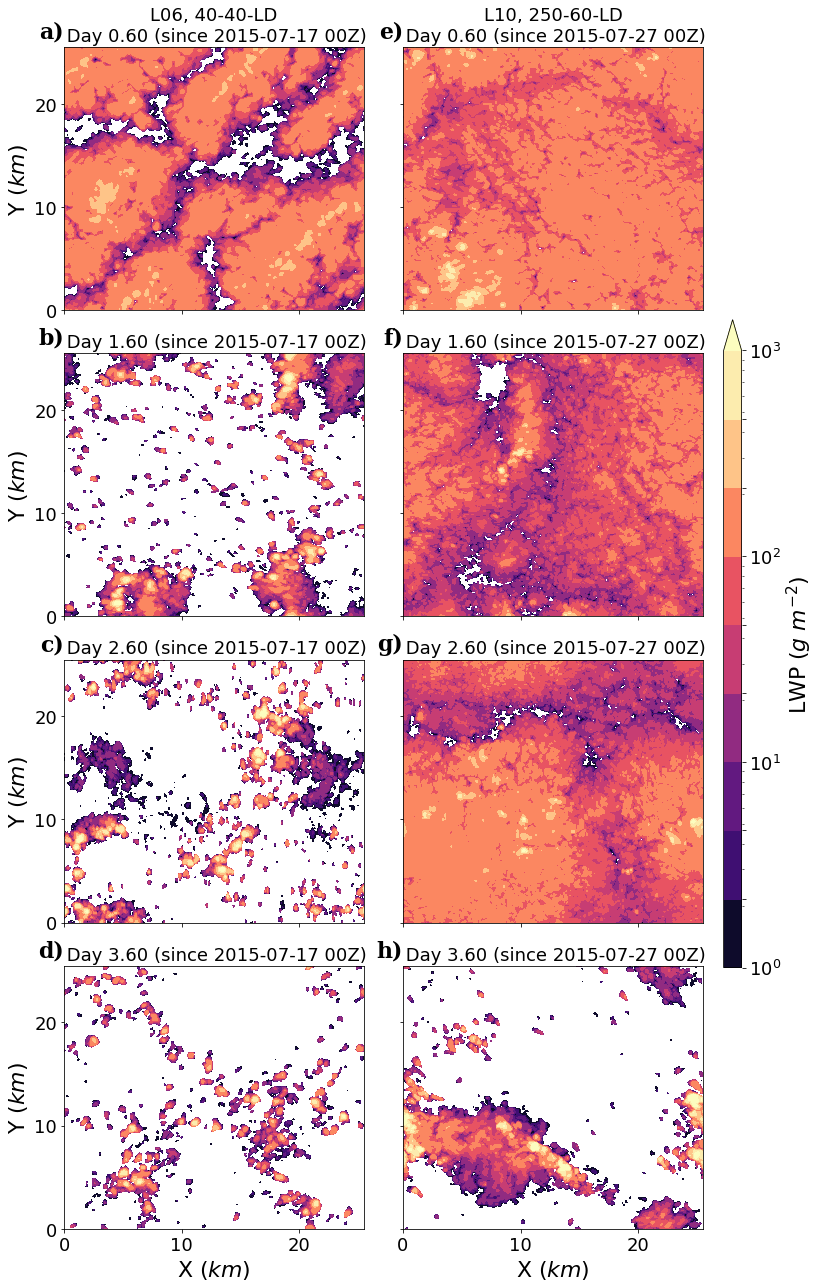

In [13]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
fn3d    = [file3d0, file3d3]#, file3d1, file3d2, file3d3]
days    = [0.597, 1.597, 2.597, 3.597]
DAYS    = ['0.60', '1.60', '2.60', '3.60']
t_init  = ['2015-07-17 00Z', '2015-07-27 00Z']#, '2015-07-17 00Z', '2015-07-27 00Z', '2015-07-27 00Z']

#PR3D = file.variables['Prec'][:]       # Surface Precip. Rate: mm/day
#NAd3D= file.variables['NAdPATH'][:] / 1e12   # Column dry aerosol (vertically integrated), unit: #/um2
#NC3D = file.variables['NCPATH'][:] / 1e12    # Column CDNC (vertically integrated)
#NR3D = file.variables['NRPATH'][:] / 1e12    # Column rain number (vertically integrated)
##REL  = file.variables['REL'][:] # Effective Radius for Cloud Liquid Water, unit: m$km$
#SWNTOA3D = file.variables['SWNT'][:]  # Net SW flux at TOA (w/m2)
#SOLIN3D  = file.variables['SOLIN'][:]  # Solar TOA insolation (w/m2)
#NA3D = NAd3D + NC3D + NR3D 
#SOLIN3D2 = SOLIN3D.copy()
#SOLIN3D2[SOLIN3D2 <= 100] = np.nan
#albedo3D = (SOLIN3D2 - SWNTOA3D) / SOLIN3D2

P_P = [['a)', 'b)', 'c)', 'd)'], ['e)', 'f)', 'g)', 'h)'], ['i)', 'j)', 'k)', 'l)'], ['m)', 'n)', 'o)', 'p)']]

####
fig, axis = plt.subplots(4, 2, figsize=(10,18))    

#clevs2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
clevs2 = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [1, 10, 100, 1000]

for j in range(len(fn3d)):

    x     = fn3d[j].variables['x'][:] / 1000   # $km$
    y     = fn3d[j].variables['y'][:] / 1000   # $km$
    T3D   = fn3d[j].variables['time'][:]       # time: day
    QN    = fn3d[j].variables['QCPATH'][:] * 1000    # Column cloud liquid mass (vertically integrated), unit: g/m2
    QP    = fn3d[j].variables['QRPATH'][:] * 1000    # Column rain mass (vertically integrated), unit: g/m2
    t3d   = T3D - int(T3D[0])
    LWC3d = QN # + QP
    x_mg, y_mg = np.meshgrid(x, y) # making meshgrid

    for i in range(len(days)):

        idx = np.where( (t3d > days[i] - 0.01) & (t3d < days[i] + 0.01) )[0][0]
        cc2 = axis[i,j].contourf(x_mg, y_mg, LWC3d[idx,:,:], clevs2, cmap = 'magma', extend='max', norm=matplotlib.colors.LogNorm())
        axis[i,j].tick_params(axis='both', which='major', labelsize=18)
        axis[i,j].text(0.0, 1.1, P_P[j][i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        axis[i,j].set_yticks(np.arange(0, 30, 10))   
        if i == 0:
            if j == 0:
                axis[i,j].set_title('L06, 40-40-LD\n'+' Day ' + DAYS[i] + ' (since ' + t_init[j] + ')', fontsize=18)                            
            elif j == 1:
                axis[i,j].set_title('L10, 250-60-LD\n'+' Day ' + DAYS[i] + ' (since ' + t_init[j] + ')', fontsize=18)                       
        else:
            axis[i,j].set_title(' Day ' + DAYS[i] + ' (since ' + t_init[j] + ')', fontsize=18)
        #if j == len(fn3d) - 1:
        #    cb2 = plt.colorbar(cc2, ax=axis[i,j], pad = 0.01, ticks = ticks2, norm=matplotlib.colors.LogNorm()) # ax = axis[i,j],
        if j == 0:
            axis[i,j].set_ylabel('Y ($km$)', fontsize=22)
        else:
            axis[i,j].axes.get_yaxis().set_ticklabels([])        
        if i == len(days) - 1:
            axis[i,j].set_xlabel('X ($km$)', fontsize=22)
        else:
            axis[i,j].axes.get_xaxis().set_ticklabels([])      

            
fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1.01, 0.25, 0.025, 0.5])
cbar = fig.colorbar(cc2, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('LWP ($g$ $m^{-2}$)', rotation=90, fontsize=22)
            
plt.tight_layout(w_pad=1)
plt.savefig('LWP_map_references.pdf' , format='pdf', dpi=500, bbox_inches='tight')

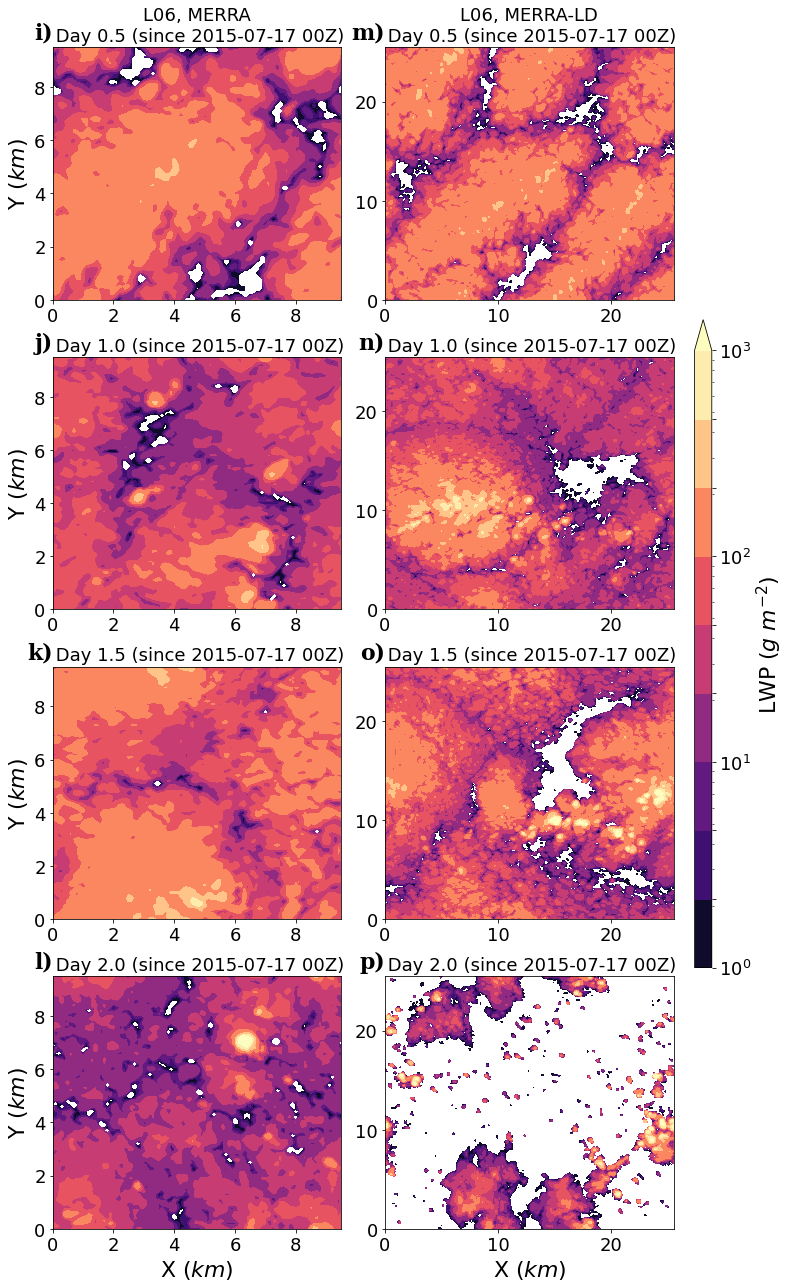

In [14]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
fn3d    = [file3d0, file3d1]
days    = [.5, 1.0, 1.5, 2.0]
t_init  = [ '2015-07-17 00Z', '2015-07-17 00Z']

P_P = [['i)', 'j)', 'k)', 'l)'], ['m)', 'n)', 'o)', 'p)']]

####
fig, axis = plt.subplots(4, 2,figsize=(9.6,18))    

#clevs2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
clevs2 = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [1, 10, 100, 1000]

for j in range(len(fn3d)):

    x     = fn3d[j].variables['x'][:] / 1000   # $km$
    y     = fn3d[j].variables['y'][:] / 1000   # $km$
    T3D   = fn3d[j].variables['time'][:]       # time: day
    QN    = fn3d[j].variables['QCPATH'][:] * 1000    # Column cloud liquid mass (vertically integrated), unit: g/m2
    QP    = fn3d[j].variables['QRPATH'][:] * 1000    # Column rain mass (vertically integrated), unit: g/m2
    t3d   = T3D - int(T3D[0])
    LWC3d = QN # + QP
    x_mg, y_mg = np.meshgrid(x, y) # making meshgrid

    for i in range(len(days)):

        idx = np.where( (t3d > days[i] - 0.01) & (t3d < days[i] + 0.01) )[0][0]
        cc2 = axis[i,j].contourf(x_mg, y_mg, LWC3d[idx,:,:], clevs2, cmap = 'magma', extend='max', norm=matplotlib.colors.LogNorm())
        axis[i,j].tick_params(axis='both', which='major', labelsize=18)
        axis[i,j].text(0.0, 1.1, P_P[j][i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        if i == 0:
            if j == 0:
                axis[i,j].set_title('L06, MERRA\n'+' Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)                                   
            elif j == 1:
                axis[i,j].set_title('L06, MERRA-LD\n'+' Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)                       
        else:
            axis[i,j].set_title(' Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)
        #if j == len(fn3d) - 1:
        #    cb2 = plt.colorbar(cc2, ax=axis[i,j], pad = 0.01, ticks = ticks2, norm=matplotlib.colors.LogNorm()) # ax = axis[i,j],
        if j == 0:
            axis[i,j].set_ylabel('Y ($km$)', fontsize=22)
        else:
            axis[i,j].set_yticks(np.arange(0, 30, 10))            
        if i == len(days) - 1:
            axis[i,j].set_xlabel('X ($km$)', fontsize=22)

            
fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1.01, 0.25, 0.025, 0.5])
cbar = fig.colorbar(cc2, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('LWP ($g$ $m^{-2}$)', rotation=90, fontsize=22)
            
plt.tight_layout(w_pad=1)
plt.savefig('LWP_map_RF06.pdf' , format='pdf', dpi=500, bbox_inches='tight')

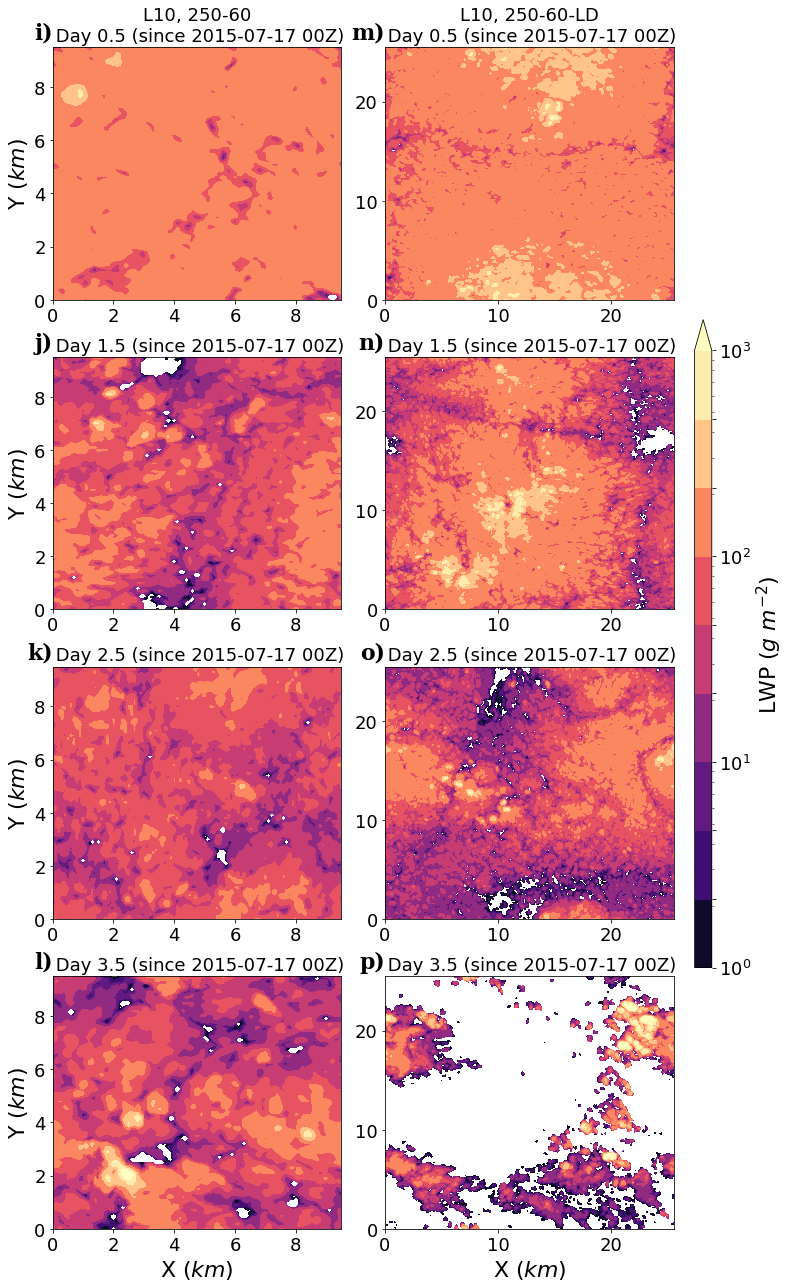

In [15]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')

fn3d    = [file3d2, file3d3]
days    = [.5, 1.5, 2.5, 3.5]
t_init  = [ '2015-07-17 00Z', '2015-07-17 00Z']

P_P = [['i)', 'j)', 'k)', 'l)'], ['m)', 'n)', 'o)', 'p)']]

####
fig, axis = plt.subplots(4, 2,figsize=(9.6,18))    

#clevs2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
clevs2 = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks2 = [1, 10, 100, 1000]

for j in range(len(fn3d)):

    x     = fn3d[j].variables['x'][:] / 1000   # $km$
    y     = fn3d[j].variables['y'][:] / 1000   # $km$
    T3D   = fn3d[j].variables['time'][:]       # time: day
    QN    = fn3d[j].variables['QCPATH'][:] * 1000    # Column cloud liquid mass (vertically integrated), unit: g/m2
    QP    = fn3d[j].variables['QRPATH'][:] * 1000    # Column rain mass (vertically integrated), unit: g/m2
    t3d   = T3D - int(T3D[0])
    LWC3d = QN # + QP
    x_mg, y_mg = np.meshgrid(x, y) # making meshgrid

    for i in range(len(days)):

        idx = np.where( (t3d > days[i] - 0.01) & (t3d < days[i] + 0.01) )[0][0]
        cc2 = axis[i,j].contourf(x_mg, y_mg, LWC3d[idx,:,:], clevs2, cmap = 'magma', extend='max', norm=matplotlib.colors.LogNorm())
        axis[i,j].tick_params(axis='both', which='major', labelsize=18)
        axis[i,j].text(0.0, 1.1, P_P[j][i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
        if i == 0:
            if j == 0:
                axis[i,j].set_title('L10, 250-60\n'+' Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)                                   
            elif j == 1:
                axis[i,j].set_title('L10, 250-60-LD\n'+' Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)                       
        else:
            axis[i,j].set_title(' Day ' + str(days[i]) + ' (since ' + t_init[j] + ')', fontsize=18)
        #if j == len(fn3d) - 1:
        #    cb2 = plt.colorbar(cc2, ax=axis[i,j], pad = 0.01, ticks = ticks2, norm=matplotlib.colors.LogNorm()) # ax = axis[i,j],
        if j == 0:
            axis[i,j].set_ylabel('Y ($km$)', fontsize=22)
        else:
            axis[i,j].set_yticks(np.arange(0, 30, 10))            
        if i == len(days) - 1:
            axis[i,j].set_xlabel('X ($km$)', fontsize=22)

            
fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1.01, 0.25, 0.025, 0.5])
cbar = fig.colorbar(cc2, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('LWP ($g$ $m^{-2}$)', rotation=90, fontsize=22)
            
plt.tight_layout(w_pad=1)
plt.savefig('LWP_map_RF10.pdf' , format='pdf', dpi=500, bbox_inches='tight')

## PDFs

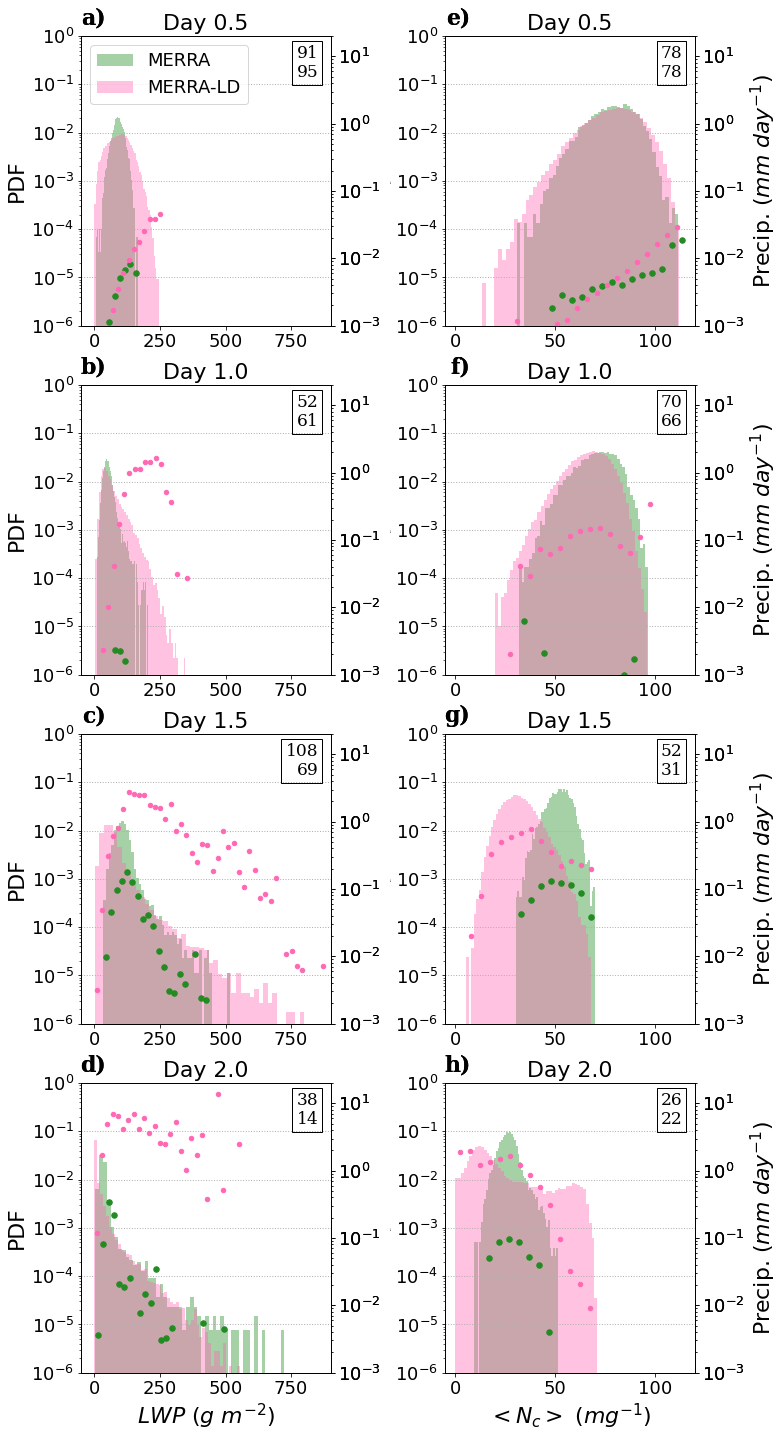

In [20]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file3d4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
file3d6 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file3d7 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')

file3d00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file3d30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
file3d50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file3d60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')


lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'MERRA'            , 'MERRAX3'      ,  '40-40-LD',  'MERRA-LD'\
       , '70-60'     , '250-60'     , '250-200', 'MERRA'      , 'MERRAX3'          , '70-60-LD'     ,  '250-60-LD']

color2= ['forestgreen' , 'forestgreen', 'hotpink', 'deepskyblue', 'forestgreen'      , 'darkgoldenrod',  'hotpink',  'hotpink'\
        ,'forestgreen' , 'forestgreen', 'hotpink', 'forestgreen'    , 'darkgoldenrod', 'hotpink'    , 'hotpink']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file10, file20, file30, file40, file50, file60]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6]
fn3d   = [file3d0,  file3d1,  file3d2,  file3d3,  file3d4,  file3d5, file3d6, file3d7,\
         file3d00, file3d10, file3d20, file3d30, file3d40, file3d50, file3d60]

###
#times    = [.5, 1.25, 2.0, 2.75]
times    = [.5, 1.0, 1.5, 2.0]
ii = 0
diff  = [20, 5]
bullet = [30, 30, 30, 30, 30, 30, 20, 20, 30, 30, 30, 30, 30, 20, 20]
####
wndw = 3
def var_prep(var, wndw):
    return np.reshape( np.log10(np.nanmean(var[idx - (wndw-1):idx + (wndw-1),:,:], 0)), -1)

def var_prep_nolog(var, wndw):
    return np.reshape( np.nanmean(var[idx - (wndw-1):idx + (wndw-1),:,:], 0), -1)

#####
def hist_bins(var1, var2, diff):
    bins = np.arange(np.nanmin(var1), np.nanmax(var1) + diff, diff)
    bins2= []
    for i in range(len(bins) - 1):
        bins2.append( (bins[i] + bins[i+1]) / 2 )
    bins2 = np.array(bins2)
    out  = bins2.copy()
    out[:] = np.nan
    for i in range(len(bins2)):
        idx    = np.where((var1 >= bins[i]) & (var1 < bins[i+1]))
        try:
            out[i] = np.nanmean(var2[idx])
        except:
            pass    
    return bins2, out


PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

CC_1 = []
NN_1 = []

#####
#fig, axis = plt.subplots(4, 3,figsize=(17,20))
fig, axis = plt.subplots(4, 2,figsize=(11,20))

for ii in [4, 7]:

    T3D      = fn3d[ii].variables['time'][:]    # time: day
    NCQCPATH = fn3d[ii].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    QCPATH   = fn3d[ii].variables['QCPATH'][:]  # Column cloud liquid mass (vertically integrated), unit: kg/m2
    Prec     = fn3d[ii].variables['Prec'][:]    # Surface Precip. Rate, unit: mm/day
    ZC       = fn3d[ii].variables['ZC'][:] * 1000 # Cloud top height (Instantaneous): converted to m
##    ISCCPTAU = fn3d[ii].variables['ISCCPTAU'][:] # ISCCP Optical Depth (~670nm, from RRTMG SW band 9: 625-778nm), unitless
#    NCQCPATH[NCQCPATH == 0] = np.nan
#    QCPATH[QCPATH     == 0] = np.nan
#    Prec[Prec         == 0] = np.nan
    ZC[ZC             == 0] = np.nan
    CDNC  = NCQCPATH / QCPATH 
    CDNC  = CDNC * 1e-6    # #/mg
#    CDNC[CDNC.mask == True] = np.nan
    CWP   = QCPATH * 1000  # g/m2
    #if ii == 8: # len(fn2) // 2:
    #    CDNC[:50,:,:][CDNC[:50,:,:] > 80] = 80
    t3d   = T3D - int(T3D[0])
    
    
    for i in range(len(times)):
        
        for j in range(2):
            
            axis[i,j].set_title('Day ' + str(times[i]), fontsize=22)
            axis[i,j].tick_params(axis='both', which='major', labelsize=18)
            axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
            axis[i,j].set_yscale('log')
            axis[i,j].text(0.1, 1.1, PANELS1[i+j*4], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
            ax = axis[i,j].twinx()
            ax.set_yscale('log')
            ax.tick_params(labelsize=18)
            #ax.set_xscale('log')
            #axis[i,j].set_xscale('log')
            ax.set_ylim([1e-3, 2e1])                

            
            idx = np.where((t3d > times[i] - .01) & (t3d < times[i] + .01))[0][0]
            #plt.plot(var, stats.norm().pdf(var))
            #sns.set(font_scale=1.5)
            
            if j == 0:
                if i == len(times) - 1:
                    axis[i,j].set_xlabel('$LWP$ ($g$ $m^{-2}$)', fontsize=22)
                var  = var_prep_nolog(CWP, wndw) #(np.log10(CWP[idx,:,:]), -1)
                var2 = var_prep_nolog(Prec, wndw)
                var[var.mask == True] = np.nan
                CC_1.append( np.nanmean(var) )
                bins2, out = hist_bins(var, var2, diff[j])                
                axis[i,j].set_xlim([-50, 900])
                axis[i,j].set_ylim([1e-6, 1e0])
                axis[i,j].set_ylabel('PDF', fontsize=22)

#             elif j == 1:
#                 if i == len(times) - 1:
#                     axis[i,j].set_xlabel('log($CWP <N_c>^{-1}$) ($g$ $m^{-2}$ $mg$)', fontsize = '18')
#                 var = var_prep(CWP / CDNC, wndw) # np.reshape(np.log10(CWP[idx,:,:] / CDNC[idx,:,:]), -1)
#                 var2 = var_prep_nolog(Prec, wndw)
#                 var[var.mask == True] = np.nan
#                 bins2, out = hist_bins(var, var2, diff[j])                
#                 axis[i,j].set_xlim([-4, 2])
#                 axis[i,j].set_ylim([1e-4, 1e1])
#                 axis[i,j].set_ylabel('', fontsize = '1')
            elif j == 1:
                if i == len(times) - 1:
                    axis[i,j].set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
                var = var_prep_nolog(CDNC, wndw) # np.reshape(np.log10(CWP[idx,:,:] / CDNC[idx,:,:]), -1)
                var2 = var_prep_nolog(Prec, wndw)
                var[var.mask == True] = np.nan
                NN_1.append( np.nanmean(var) )
                bins2, out = hist_bins(var, var2, diff[j])                
                axis[i,j].set_xlim([-5, 120])
                axis[i,j].set_ylim([1e-6, 1e0])
                axis[i,j].set_ylabel('', fontsize=1)                 
                if ii == 4:
                    ax.set_ylabel('Precip. ($mm$ $day^{-1}$)', fontsize=22)                    

            pdf = sns.distplot(var, color=color2[ii], ax=axis[i,j], label=lb[ii], kde_kws=dict(linewidth=.00))#, kde = False, ylabel='PDF')
            #plt.plot(bins2, out, '--', color=color2[ii])
            ax.scatter(bins2, out, color=color2[ii], s=bullet[ii])
            #pdf.set(xlabel='CWP ($g$ $m^{-2}$)', ylabel='PDF')
            if i ==0 and j == 0:
                axis[i,j].legend(fontsize=18, loc='upper left')

for i in range(4):    
    bbx1 = str( int(CC_1[i]) ) + '\n' + str( int(CC_1[i+4]) )
    axis[i,0].text(0.95, .97, bbx1, transform=axis[i,0].transAxes, fontsize=17, va='top', fontfamily='serif',\
                   ha='right', bbox=dict(facecolor='none', edgecolor='k'))
    bbx1 = str( int(NN_1[i]) ) + '\n' + str( int(NN_1[i+4]) )
    axis[i,1].text(0.95, .97, bbx1, transform=axis[i,1].transAxes, fontsize=17, va='top', fontfamily='serif',\
                   ha='right', bbox=dict(facecolor='none', edgecolor='k'))


plt.tight_layout(w_pad=1)
plt.savefig('PDF_RF06.pdf' , format='pdf', dpi=500)

It might be interesting to see how these distributions evolve early in the simulation (even when the mean is being nudged to the aircraft flight values). 

the relationship between the precipitation and the CWP and CWP/Nd.
___________________________________________________________________________________

the PDF of both LWP and LWP/Nc, with a plot of the mean precipitation rate in each bin of LWP or LWP/Nc.  The comparison of large and small domains might show which values of LWP/Nc are required for precipitation to pick up.
either on the full resolution data or (more quickly) on the coarsened MSE outputs.  
The MSE outputs are averaged over time, so it might capture the average effect of short-lived precipitation events, along with their time-averaged LWP or LWP/Nd

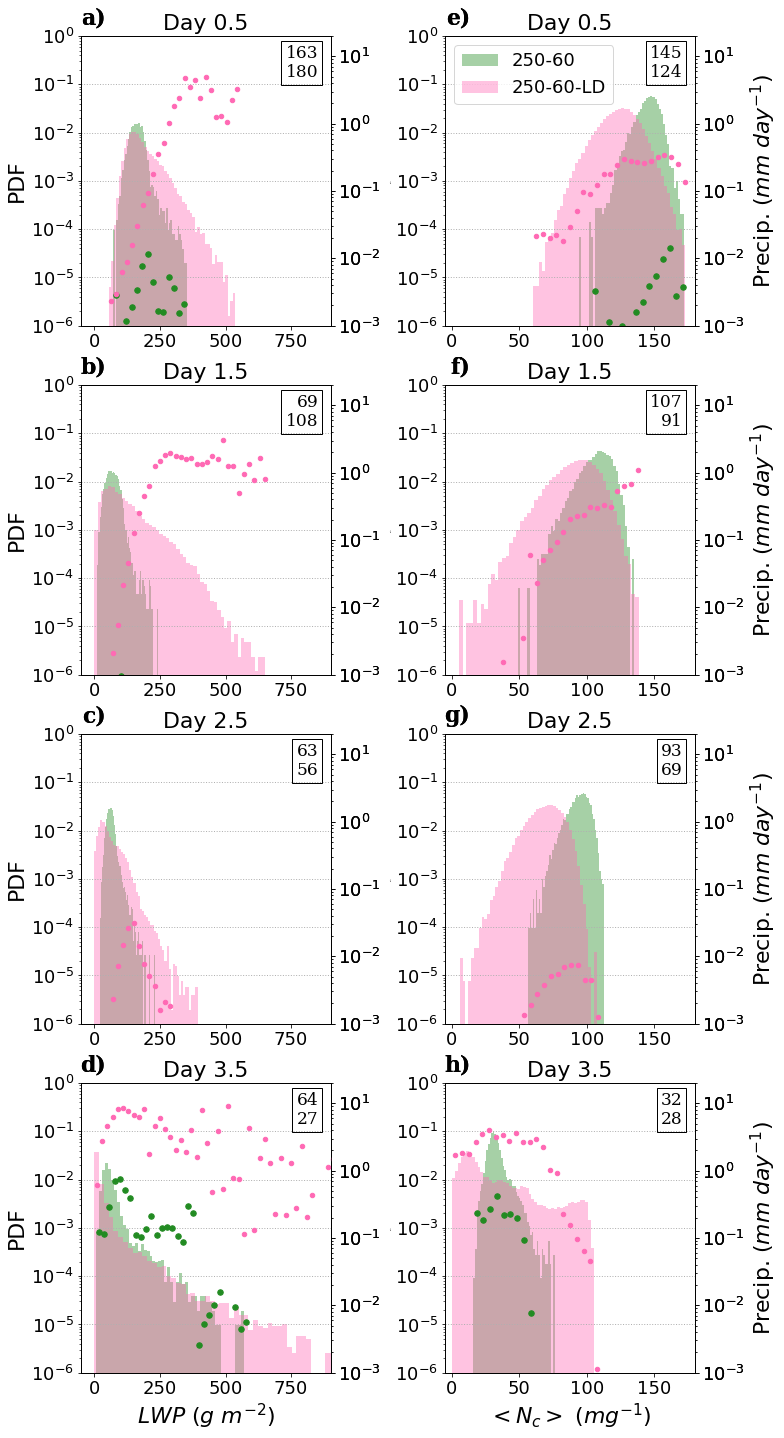

In [21]:
file3d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file3d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file3d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file3d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file3d4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
file3d6 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file3d7 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')

file3d00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file3d30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
file3d50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file3d60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')


lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'MERRA'            , 'MERRAX3'      ,  '40-40-LD',  'MERRA-LD'\
       , '70-60'     , '250-60'     , '250-200', 'MERRA'      , 'MERRAX3'          , '70-60-LD'     ,  '250-60-LD']

color2= ['forestgreen' , 'forestgreen', 'hotpink', 'deepskyblue', 'forestgreen'      , 'darkgoldenrod',  'hotpink',  'hotpink'\
        ,'forestgreen' , 'forestgreen', 'hotpink', 'forestgreen'    , 'darkgoldenrod', 'hotpink'    , 'hotpink']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file10, file20, file30, file40, file50, file60]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6]
fn3d   = [file3d0,  file3d1,  file3d2,  file3d3,  file3d4,  file3d5, file3d6, file3d7,\
         file3d00, file3d10, file3d20, file3d30, file3d40, file3d50, file3d60]

###
#times    = [.5, 1.25, 2.0, 2.75]
times    = [.5, 1.5, 2.5, 3.5]
ii = 0
diff  = [20, 5]
bullet = [30, 30, 30, 30, 30, 30, 20, 20, 30, 30, 30, 30, 30, 20, 20]
####
wndw = 3
def var_prep(var, wndw):
    return np.reshape( np.log10(np.nanmean(var[idx - (wndw-1):idx + (wndw-1),:,:], 0)), -1)

def var_prep_nolog(var, wndw):
    return np.reshape( np.nanmean(var[idx - (wndw-1):idx + (wndw-1),:,:], 0), -1)

#####
def hist_bins(var1, var2, diff):
    bins = np.arange(np.nanmin(var1), np.nanmax(var1) + diff, diff)
    bins2= []
    for i in range(len(bins) - 1):
        bins2.append( (bins[i] + bins[i+1]) / 2 )
    bins2 = np.array(bins2)
    out  = bins2.copy()
    out[:] = np.nan
    for i in range(len(bins2)):
        idx    = np.where((var1 >= bins[i]) & (var1 < bins[i+1]))
        try:
            out[i] = np.nanmean(var2[idx])
        except:
            pass    
    return bins2, out


PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

CC_1 = []
NN_1 = []

#####
#fig, axis = plt.subplots(4, 3,figsize=(17,20))
fig, axis = plt.subplots(4, 2,figsize=(11,20))

for ii in [9, 14]:

    T3D      = fn3d[ii].variables['time'][:]    # time: day
    NCQCPATH = fn3d[ii].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    QCPATH   = fn3d[ii].variables['QCPATH'][:]  # Column cloud liquid mass (vertically integrated), unit: kg/m2
    Prec     = fn3d[ii].variables['Prec'][:]    # Surface Precip. Rate, unit: mm/day
    ZC       = fn3d[ii].variables['ZC'][:] * 1000 # Cloud top height (Instantaneous): converted to m
##    ISCCPTAU = fn3d[ii].variables['ISCCPTAU'][:] # ISCCP Optical Depth (~670nm, from RRTMG SW band 9: 625-778nm), unitless
#    NCQCPATH[NCQCPATH == 0] = np.nan
#    QCPATH[QCPATH     == 0] = np.nan
#    Prec[Prec         == 0] = np.nan
    ZC[ZC             == 0] = np.nan
    CDNC  = NCQCPATH / QCPATH 
    CDNC  = CDNC * 1e-6    # #/mg
#    CDNC[CDNC.mask == True] = np.nan
    CWP   = QCPATH * 1000  # g/m2
    #if ii == 8: # len(fn2) // 2:
    #    CDNC[:50,:,:][CDNC[:50,:,:] > 80] = 80
    t3d   = T3D - int(T3D[0])
    
    
    for i in range(len(times)):
        
        for j in range(2):
            
            axis[i,j].set_title('Day ' + str(times[i]), fontsize=22)
            axis[i,j].tick_params(axis='both', which='major', labelsize=18)
            axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
            axis[i,j].set_yscale('log')
            axis[i,j].text(0.1, 1.1, PANELS1[i+j*4], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
            ax = axis[i,j].twinx()
            ax.set_yscale('log')
            ax.tick_params(labelsize=18)
            #ax.set_xscale('log')
            #axis[i,j].set_xscale('log')
            ax.set_ylim([1e-3, 2e1])                

            
            idx = np.where((t3d > times[i] - .01) & (t3d < times[i] + .01))[0][0]
            #plt.plot(var, stats.norm().pdf(var))
            #sns.set(font_scale=1.5)
            
            if j == 0:
                if i == len(times) - 1:
                    axis[i,j].set_xlabel('$LWP$ ($g$ $m^{-2}$)', fontsize=22)
                var  = var_prep_nolog(CWP, wndw) #(np.log10(CWP[idx,:,:]), -1)
                var2 = var_prep_nolog(Prec, wndw)
                var[var.mask == True] = np.nan
                CC_1.append( np.nanmean(var) )
                bins2, out = hist_bins(var, var2, diff[j])                
                axis[i,j].set_xlim([-50, 900])
                axis[i,j].set_ylim([1e-6, 1e0])
                axis[i,j].set_ylabel('PDF', fontsize=22)

#             elif j == 1:
#                 if i == len(times) - 1:
#                     axis[i,j].set_xlabel('log($CWP <N_c>^{-1}$) ($g$ $m^{-2}$ $mg$)', fontsize = '18')
#                 var = var_prep(CWP / CDNC, wndw) # np.reshape(np.log10(CWP[idx,:,:] / CDNC[idx,:,:]), -1)
#                 var2 = var_prep_nolog(Prec, wndw)
#                 var[var.mask == True] = np.nan
#                 bins2, out = hist_bins(var, var2, diff[j])                
#                 axis[i,j].set_xlim([-4, 2])
#                 axis[i,j].set_ylim([1e-4, 1e1])
#                 axis[i,j].set_ylabel('', fontsize = '1')
            elif j == 1:
                if i == len(times) - 1:
                    axis[i,j].set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
                var = var_prep_nolog(CDNC, wndw) # np.reshape(np.log10(CWP[idx,:,:] / CDNC[idx,:,:]), -1)
                var2 = var_prep_nolog(Prec, wndw)
                var[var.mask == True] = np.nan
                NN_1.append( np.nanmean(var) )
                bins2, out = hist_bins(var, var2, diff[j])                
                axis[i,j].set_xlim([-5, 180])
                axis[i,j].set_ylim([1e-6, 1e0])                
                axis[i,j].set_ylabel('', fontsize=1)                 
                if ii == 14:
                    ax.set_ylabel('Precip. ($mm$ $day^{-1}$)', fontsize=22)                    

            pdf = sns.distplot(var, color=color2[ii], ax=axis[i,j], label=lb[ii], kde_kws=dict(linewidth=.00))#, kde = False, ylabel='PDF')
            #plt.plot(bins2, out, '--', color=color2[ii])
            ax.scatter(bins2, out, color=color2[ii], s=bullet[ii])
            #pdf.set(xlabel='CWP ($g$ $m^{-2}$)', ylabel='PDF')
            if i ==0 and j == 1:
                axis[i,j].legend(fontsize=18, loc='upper left')

for i in range(4):    
    bbx1 = str( int(CC_1[i]) ) + '\n' + str( int(CC_1[i+4]) )
    axis[i,0].text(0.95, .97, bbx1, transform=axis[i,0].transAxes, fontsize=17, va='top', fontfamily='serif',\
                   ha='right', bbox=dict(facecolor='none', edgecolor='k'))
    bbx1 = str( int(NN_1[i]) ) + '\n' + str( int(NN_1[i+4]) )
    axis[i,1].text(0.95, .97, bbx1, transform=axis[i,1].transAxes, fontsize=17, va='top', fontfamily='serif',\
                   ha='right', bbox=dict(facecolor='none', edgecolor='k'))


plt.tight_layout(w_pad=1)
plt.savefig('PDF_RF10.pdf' , format='pdf', dpi=500)

# Quantify Twomey, LWP, and CF Effects

## Time series of CREs (Before temporal integration)

In [12]:
####################
def quant_CRE_alltime1(j1, j2):

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[j1])
    
    #CF1  = smooth(ISCCPTOT, 10)
    CF1  = ISCCPTOT
#     T_ft1= SWNTOAC / SOLIN2  # old method: transmissivity of the free troposphere
    RADSWDN  = fn2[j1].variables['RADSWDN'][:]       # Downward shortwave radiative flux: W/m2
    RADSWDN_Zinv = SOLIN2.copy()
    RADSWDN_Zinv[:] = np.nan
    for ij in range(len(RADSWDN_Zinv)):
        RADSWDN_Zinv[ij] = RADSWDN[ij,inv_idx[ij]+5]
    T_ft1 = RADSWDN_Zinv / SOLIN2  # new method: transmissivity of the free troposphere
    
    A1   = (albedo - (1 - CF1) * albd_clear) / CF1
    #A1   = albedo
    a1   = (a_ft - A1) / (a_ft ** 2 - A1 * a_ft - T_ft1 ** 2)
    #a1   = albedo #/ CF1
    N1   = np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )
    
    tau1 = COD / CF1
    r1   = SAM_re
    #L1   = smooth((CWP + RWP)/CF1, 10)
    L1   = smooth(CWP + RWP, 10)
    CRE1 = - a1 * SOLIN2 * CF1
    fact = SW_CRE / CRE1
    CRE1 = CRE1 * fact
    #CRE1 = SW_CRE 
    A1clr= albd_clear

    #####
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[j2])

    #CF2  = smooth(ISCCPTOT, 10)
    CF2  = ISCCPTOT
    RADSWDN  = fn2[j2].variables['RADSWDN'][:]       # Downward shortwave radiative flux: W/m2
    RADSWDN_Zinv = SOLIN2.copy()
    RADSWDN_Zinv[:] = np.nan
    for ij in range(len(RADSWDN_Zinv)):
        RADSWDN_Zinv[ij] = RADSWDN[ij,inv_idx[ij]+5]
    T_ft2 = RADSWDN_Zinv / SOLIN2  # new method: transmissivity of the free troposphere
    
    A2   = (albedo - (1 - CF2) * albd_clear) / CF2
    #A2   = albedo
    a2   = (a_ft - A2) / (a_ft ** 2 - A2 * a_ft - T_ft2 ** 2)
    N2   = np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )
    tau2 = COD / CF2
    r2   = SAM_re
    #L2   = smooth((CWP + RWP)/CF2, 10)
    L2   = smooth(CWP + RWP, 10)
    CRE2 = - a2 * SOLIN2 * CF2
    CRE2 = CRE2 * fact# SW_CRE / CRE2
    A2clr= albd_clear

    ###
    #CRE_M = - (A2 - A1) * SOLIN2 * fact * CF1
    CRE_M = CRE2 - CRE1
    A_M   = A2 - A1

    ### Twomey Effect:
    rN    = N2 / N1
    tau_T = tau1 * rN ** (1 / 3)
    r_T   = r1   * (1 / rN) ** (1 / 3)
    a_T   = a1 + a1 * (1 - a1) * ( rN ** (1/3) - 1 ) / ( 1 + a1 * ( rN ** (1/3) - 1 ) )
    #a_T   = a1 * ( rN ** (1/3)  ) / ( 1 + a1 * ( rN ** (1/3) - 1 ) )
    A_T   = a_ft + a_T * T_ft1 ** 2 / (1 - a_ft * a_T)
    #CRE_T = - A_T * SOLIN2 * CF1 * fact
    CRE_T = - (A_T - A1) * SOLIN2 * CF1 * fact

    ### LWP adjustment Effect:
    rL    = L2 / L1
    tau_L = tau1 * rL ** (5 / 6)
    r_L   = r1   * rL ** (1 / 6)
    a_L   = a1 + a1 * (1 - a1) * ( rL ** (5/6) - 1 ) / ( 1 + a1 * ( rL ** (5/6) - 1 ) )
    #a_L   = a1 * ( rL ** (5/6) ) / ( 1 + a1 * ( rL ** (5/6) - 1 ) )
    #a_L   = a1 + (L2 - L1) * a1 * (1 - a1) * (5 / 6) / L1 
    A_L   = a_ft + a_L * T_ft1 ** 2 / (1 - a_ft * a_L)
    #CRE_L = - A_L * SOLIN2 * CF1 * fact
    CRE_L = - (A_L - A1) * SOLIN2 * CF1 * fact

    ### CF adjustment Effect:
#    A_CF   = (CF2 - CF1) * (A2 - A2clr)
#    A_CF   = A1 + (CF2 - CF1) * (A2 - A2clr)

    A_CF = A_T.copy()

    for i in range(len(CF1)):
        if CF2[i] > CF1[i]:
            A_CF[i]   = A1[i] + (CF2[i] - CF1[i]) * (A2[i] - A2clr[i])
        else:
            A_CF[i]   = A1[i] + (CF2[i] - CF1[i]) * (A1[i] - A1clr[i])

    CRE_CF = - (A_CF - A1) * SOLIN2 * fact
    
    ### residual:
    A_rs   = A_T + A_L + A_CF - A_M
    CRE_rs = CRE_T + CRE_L + CRE_CF - CRE_M

    rC = CF2 / CF1


    return rN, rL, rC, CRE_M, CRE_T, CRE_L, CRE_CF, CRE_rs, A1, A_T, A_L, A_CF, A_rs, CRE1, CRE2, CF1



####################
def quant_CRE_alltime2(j1, j2):

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[j1])
    
    #CF1  = smooth(ISCCPTOT, 10)
    CF1  = ISCCPTOT
    RADSWDN  = fn2[j1].variables['RADSWDN'][:]       # Downward shortwave radiative flux: W/m2
    RADSWDN_Zinv = SOLIN2.copy()
    RADSWDN_Zinv[:] = np.nan
    for ij in range(len(RADSWDN_Zinv)):
        RADSWDN_Zinv[ij] = RADSWDN[ij,inv_idx[ij]+5]
    T_ft1 = RADSWDN_Zinv / SOLIN2  # new method: transmissivity of the free troposphere
    
    A1   = (albedo - (1 - CF1) * albd_clear) / CF1
    #A1   = albedo
    a1   = (a_ft - A1) / (a_ft ** 2 - A1 * a_ft - T_ft1 ** 2)
    #a1   = albedo #/ CF1
    N1   = np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )
    tau1 = COD / CF1
    r1   = SAM_re
    #L1   = smooth((CWP + RWP)/CF1, 10)
    L1   = smooth(CWP + RWP, 10)
    CRE1 = - a1 * SOLIN2 * CF1
    fact = SW_CRE / CRE1
    CRE1 = CRE1 * fact
    #CRE1 = SW_CRE 
    A1clr= albd_clear

    #####
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[j2])

    #CF2  = smooth(ISCCPTOT, 10)
    CF2  = ISCCPTOT
    RADSWDN  = fn2[j2].variables['RADSWDN'][:]       # Downward shortwave radiative flux: W/m2
    RADSWDN_Zinv = SOLIN2.copy()
    RADSWDN_Zinv[:] = np.nan
    for ij in range(len(RADSWDN_Zinv)):
        RADSWDN_Zinv[ij] = RADSWDN[ij,inv_idx[ij]+5]
    T_ft2 = RADSWDN_Zinv / SOLIN2  # new method: transmissivity of the free troposphere

    A2   = (albedo - (1 - CF2) * albd_clear) / CF2
    #A2   = albedo
    a2   = (a_ft - A2) / (a_ft ** 2 - A2 * a_ft - T_ft2 ** 2)
    N2   = np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )
    tau2 = COD / CF2
    r2   = SAM_re
    #L2   = smooth((CWP + RWP)/CF2, 10)
    L2   = smooth(CWP + RWP, 10)
    CRE2 = - a2 * SOLIN2 * CF2
    CRE2 = CRE2 * fact# SW_CRE / CRE2
    A2clr= albd_clear

    ###
    #CRE_M = - (A2 - A1) * SOLIN2 * fact * CF1
    CRE_M = -(CRE2 - CRE1)
    A_M   = A2 - A1

    ### Twomey Effect:
    rN    = N2 / N1
    tau_T = tau1 * rN ** (1 / 3)
    r_T   = r1   * (1 / rN) ** (1 / 3)
    a_T   = a1 - a1 * (1 - a1) * ( rN ** (1/3) - 1 ) / ( 1 + a1 * ( rN ** (1/3) - 1 ) )
    A_T   = a_ft + a_T * T_ft1 ** 2 / (1 - a_ft * a_T)
    CRE_T = - (A_T - A1) * SOLIN2 * CF1 * fact

    ### LWP adjustment Effect:
    rL    = L2 / L1
    tau_L = tau1 * rL ** (5 / 6)
    r_L   = r1   * rL ** (1 / 6)
    a_L   = a1 - a1 * (1 - a1) * ( rL ** (5/6) - 1 ) / ( 1 + a1 * ( rL ** (5/6) - 1 ) )
    A_L   = a_ft + a_L * T_ft1 ** 2 / (1 - a_ft * a_L)
    CRE_L = - (A_L - A1) * SOLIN2 * CF1 * fact

    ### CF adjustment Effect:
#    A_CF   = (CF2 - CF1) * (A2 - A2clr)
#    A_CF   = A1 + (CF2 - CF1) * (A2 - A2clr)
    
    A_CF = A_T.copy()
    
    for i in range(len(CF1)):
        if CF2[i] > CF1[i]:
            A_CF[i]   = A1[i] + (CF2[i] - CF1[i]) * (A2[i] - A2clr[i])
        else:
            A_CF[i]   = A1[i] + (CF2[i] - CF1[i]) * (A1[i] - A1clr[i])

    CRE_CF = + (A_CF - A1) * SOLIN2 * fact
    
    ### residual:
    A_rs   = A_T + A_L + A_CF - A_M
    CRE_rs = CRE_T + CRE_L + CRE_CF - CRE_M

    rC = CF2 / CF1


    return rN, rL, rC, CRE_M, CRE_T, CRE_L, CRE_CF, CRE_rs, A1, A_T, A_L, A_CF, A_rs, CRE1, CRE2, CF1

In [13]:
## model runs
file   = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40.nc')
file1  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_1_4.nc')
file2  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150.nc')
file3  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150.nc')
file4  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150.nc')
file5  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_STAT/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2.nc')
file6  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL.nc')
file7  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t.nc')

file00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60.nc')
file05 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va.nc')
file10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60.nc')
file20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW.nc')
file30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70.nc')
file40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200.nc')
file50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL.nc')
file60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t.nc')

#########
file2d   = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file2d1  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file2d2  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file2d3  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file2d4  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file2d5  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')
file2d6  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d7  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')

file2d00 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
file2d10 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file2d20 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file2d30 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
file2d40 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file2d50 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file2d60 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d70 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')

In [14]:
lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]
fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
color = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
color2 = [ 'k', 'b', 'tab:red', 'tab:green',   'k', 'b', 'tab:red', 'tab:green']

it  = '2015-07-17 00Z' 
it2 = '2015-07-27 00Z' 

init_time_all = [it, it, it, it, it2, it2, it2, it2] 

box = 5
lngh = 5
a_ft = 0.05  # albedo of free troposphere

marker = ['o', 'x', 's', '*', '^', '+', 'd', 'p']

box = 5
lngh = 5
a_ft = 0.05  # albedo of free troposphere

fn2d     = [file2d , file2d1 , file2d2 , file2d3 , file2d4 , file2d5 , file2d6 ,  file2d7,\
           file2d00, file2d10, file2d20, file2d30, file2d40, file2d50, file2d60,  file2d70]

## Scatter plots (After 3-day temporal integration)

## Time average at the very end

In [15]:
####################
def quant_CRE(j1, j2):

    rN1, rL1, rC1, CRE_M1, CRE_T1, CRE_L1, CRE_CF1, CRE_rs1, A1, A_T1, A_L1, A_CF1, A_rs1, CRE1, CRE2, CF1 = quant_CRE_alltime1(j1, j2)
    rN2, rL2, rC2, CRE_M2, CRE_T2, CRE_L2, CRE_CF2, CRE_rs2, A1_2, A_T2, A_L2, A_CF2, A_rs2, CRE1_2, CRE2_2, CF2 = quant_CRE_alltime2(j2, j1)
    
    rN = (rN1 + 1/rN2) / 2
    rL = (rL1 + 1/rL2) / 2
    rC = (rC1 + 1/rC2) / 2
        
    CRE_T  = (CRE_T1 + CRE_T2) / 2
    CRE_L  = (CRE_L1 + CRE_L2) / 2
    CRE_CF = (CRE_CF1 + CRE_CF2) / 2
    CRE_rs = (CRE_rs1 + CRE_rs2) / 2
    CRE_M  = (CRE_M1 + CRE_M2) / 2

    A_T  = (A_T1 - A1 + A_T2 - A1_2) / 2
    A_L  = (A_L1 - A1 + A_L2 - A1_2) / 2
    A_CF = (A_CF1 - A1 + A_CF2 - A1_2) / 2
    A_rs = (A_rs1 - A1 + A_rs2 - A1_2) / 2
    A_M  = A1_2 - A1

    CF = (CF1 + CF2) / 2

    CF1_nan = CF.copy()
    CF2_nan = CF.copy()
    CF_nan  = CF.copy()
    CF1_nan[np.isnan(SOLIN2) == 1] = np.nan
    CF2_nan[np.isnan(SOLIN2) == 1] = np.nan
    CF_nan[np.isnan(SOLIN2)  == 1] = np.nan

    CF1_nan_fd = np.nanmean(CF1_nan[10:-10]) 
    CF2_nan_fd = np.nanmean(CF2_nan[10:-10]) 
    CF_nan_fd  = np.nanmean(CF_nan[10:-10]) 
    
    rN_nan = rN.copy()
    rL_nan = rL.copy()
    rC_nan = rC.copy()
    rN_nan[np.isnan(SOLIN2) == 1] = np.nan
    rL_nan[np.isnan(SOLIN2) == 1] = np.nan
    rC_nan[np.isnan(SOLIN2) == 1] = np.nan
    
    rN_nan_fd = np.nanmean(rN_nan[10:-10]) 
    rL_nan_fd = np.nanmean(rL_nan[10:-10]) 
    rC_nan_fd = np.nanmean(rC_nan[10:-10]) 
    
    CRE_M_fd = np.nanmean(CRE_M[10:-10]) 
    CRE_T_fd = np.nanmean(CRE_T[10:-10]) 
    CRE_L_fd = np.nanmean(CRE_L[10:-10]) 
    CRE_CF_fd= np.nanmean(CRE_CF[10:-10]) 
    CRE_rs_fd= np.nanmean(CRE_rs[10:-10]) 

    CRE_M_fd = np.nanmean(CRE_M[10:-10]) 
    CRE_T_fd = np.nanmean(CRE_T[10:-10]) 
    CRE_L_fd = np.nanmean(CRE_L[10:-10]) 
    CRE_CF_fd= np.nanmean(CRE_CF[10:-10]) 
    CRE_rs_fd= np.nanmean(CRE_rs[10:-10]) 

    A_M_fd  = np.nanmean(A_M[10:-10]) 
    A_T_fd  = np.nanmean(A_T[10:-10]) 
    A_L_fd  = np.nanmean(A_L[10:-10]) 
    A_CF_fd = np.nanmean(A_CF[10:-10]) 
    A_rs_fd = np.nanmean(A_rs[10:-10]) 
    
#    rr_M_fd = np.nanmean((r2 / r1)[10:-10]) 
#    rr_T_fd = np.nanmean((r_T / r1)[10:-10]) 
#    rr_L_fd = np.nanmean((r_L / r1)[10:-10] ) #* (r_T / r1)[10:-10]) 
    
#    rt_M_fd = np.nanmean((tau2 / tau1)[10:-10]) 
#    rt_T_fd = np.nanmean((tau_T / tau1)[10:-10]) 
#    rt_L_fd = np.nanmean((tau_L / tau1)[10:-10] )# * (r_T / r1)[10:-10]) 


    return rN_nan_fd, rL_nan_fd, rC_nan_fd, CRE_M_fd, CRE_T_fd, CRE_L_fd, CRE_CF_fd, CRE_rs_fd, A_M_fd, A_T_fd, \
           A_L_fd, A_CF_fd, A_rs_fd, CF1_nan_fd, CF2_nan_fd, CF_nan_fd

#    return rN_nan_fd, rL_nan_fd, rC_nan_fd, CRE_M_fd, CRE_T_fd, CRE_L_fd, CRE_CF_fd, CRE_rs_fd, A_M_fd, A_T_fd, A_L_fd, A_CF_fd, \
#            A_rs_fd, rr_M_fd, rr_T_fd, rr_L_fd, rt_M_fd, rt_T_fd, rt_L_fd

## Ratios

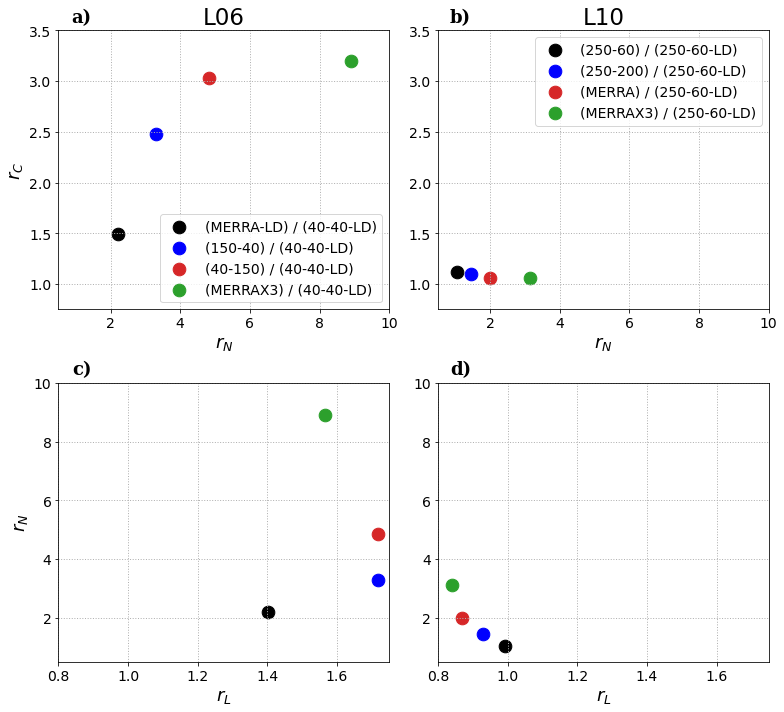

In [17]:
lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD' , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200'   , 'MERRA'      , 'MERRAX3' ]
fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
#fn2   = [file, file1, file2, file3, file4, file5, file00, file10, file20, file30, file40]
#lb    = ['40-40', '40-150', '150-40', 'M', 'MX3', '40-40to150', '250-60', '250-200', '70-60', 'M', 'MX3']
color = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
#color2 = [ 'deepskyblue', 'k', 'b', 'tab:red', 'tab:green', 'deepskyblue',   'k', 'b', 'tab:red', 'tab:green']
color2 = [ 'k', 'b', 'tab:red', 'tab:green',   'k', 'b', 'tab:red', 'tab:green']

fn2d     = [file2d , file2d1 , file2d2 , file2d3 , file2d4 , file2d5 , file2d6 ,  file2d7,\
           file2d00, file2d10, file2d20, file2d30, file2d40, file2d50, file2d60,  file2d70]

box = 5
lngh = 5
a_ft = 0.05  # albedo of free troposphere


################
#j1 = [0, 6, 1, 1, 1,   10, 14, 11, 11, 9 ]
#j2 = [5, 7, 3, 4, 7,   8 , 15,  9, 15, 15]
j1 = [0, 0, 0, 0,    8,  8,  8, 8 ]
j2 = [5, 3, 4, 7,    9,  13, 14, 15]
marker = ['o', 'x', 's', '*', '^', '+', 'd', 'p']

PANELS1 = ['a)', 'b)', 'c)', 'd)']

############
fig, axis = plt.subplots(2, 2,figsize=(11,10))

i = 0; j = 0
axis[i,j].set_ylabel('$r_C$', fontsize = '18')
axis[i,j].set_xlabel('$r_N$', fontsize = '18')
axis[i,j].set_title('L06', fontsize = '23')
axis[i,j].set_xlim([0.5, 10])
axis[i,j].set_ylim([.75, 3.5])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1) #axis='y',
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 0; j = 1
axis[i,j].set_xlabel('$r_N$', fontsize = '18')
axis[i,j].set_title('L10', fontsize = '23')
axis[i,j].set_xlim([0.5, 10])
axis[i,j].set_ylim([.75, 3.5])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1)
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 1; j = 0
axis[i,j].set_ylabel('$r_N$', fontsize = '18')
axis[i,j].set_xlabel('$r_L$', fontsize = '18')
axis[i,j].set_xlim([.8, 1.75])
axis[i,j].set_ylim([0.5, 10])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1)
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 1; j = 1
axis[i,j].set_xlabel('$r_L$', fontsize = '18')
axis[i,j].set_xlim([.8, 1.75])
axis[i,j].set_ylim([0.5, 10])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1)
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')


#####
for ii in range(len(j1)):
    Obs_jump = 18 if ii < (len(j1) // 2) else 17 

    rN_nan_fd, rL_nan_fd, rC_nan_fd, CRE_M_fd, CRE_T_fd, CRE_L_fd, CRE_CF_fd, CRE_rs_fd, A_M_fd, A_T_fd, \
           A_L_fd, A_CF_fd, A_rs_fd, CF1_nan_fd, CF2_nan_fd, CF_nan_fd = quant_CRE(j1[ii], j2[ii])

    ####
    if ii < len(j1) // 2:
        i = 0; j = 0
    else:
        i = 0; j = 1
    axis[i,j].scatter(rN_nan_fd, rC_nan_fd, s=160, marker=marker[0], color=color2[ii], label='('+lb[j2[ii]]+')'+' / '+'('+lb[j1[ii]]+')') 
    axis[i,j].legend(fontsize = '14')#, loc='lower right')

    ####
    if ii < len(j1) // 2:
        i = 1; j = 0
    else:
        i = 1; j = 1
    axis[i,j].scatter(rL_nan_fd, rN_nan_fd, s=160, marker=marker[0], color=color2[ii], label='('+lb[j2[ii]]+')'+' / '+'('+lb[j1[ii]]+')') 
        
#axis[i,j].scatter(Td, CRE_M_d, s=80, marker='X', color=cc[4]) 

plt.tight_layout()  # w_pad=1
plt.savefig('decomp_ratio.pdf' , format='pdf', dpi=500)

In [18]:
####################
def quant_CRE_extended(j1, j2):

    rN1, rL1, rC1, CRE_M1, CRE_T1, CRE_L1, CRE_CF1, CRE_rs1, A1, A_T1, A_L1, A_CF1, A_rs1, CRE1, CRE2, CF1 = quant_CRE_alltime1(j1, j2)
    rN2, rL2, rC2, CRE_M2, CRE_T2, CRE_L2, CRE_CF2, CRE_rs2, A1_2, A_T2, A_L2, A_CF2, A_rs2, CRE1_2, CRE2_2, CF2 = quant_CRE_alltime2(j2, j1)
    
    rN = (rN1 + 1/rN2) / 2
    rL = (rL1 + 1/rL2) / 2
    rC = (rC1 + 1/rC2) / 2
    
    CRE_T  = (CRE_T1 + CRE_T2) / 2
    CRE_L  = (CRE_L1 + CRE_L2) / 2
    CRE_CF = (CRE_CF1 + CRE_CF2) / 2
    CRE_rs = (CRE_rs1 + CRE_rs2) / 2
    CRE_M  = (CRE_M1 + CRE_M2) / 2

    A_T  = (A_T1 - A1 + A_T2 - A1_2) / 2
    A_L  = (A_L1 - A1 + A_L2 - A1_2) / 2
    A_CF = (A_CF1 - A1 + A_CF2 - A1_2) / 2
    A_rs = (A_rs1 - A1 + A_rs2 - A1_2) / 2
    A_M  = A1_2 - A1

    CF = (CF1 + CF2) / 2
    
    CF1_nan = CF1.copy()
    CF2_nan = CF2.copy()
    CF_nan  = CF.copy()
    CF1_nan[np.isnan(SOLIN2) == 1] = np.nan
    CF2_nan[np.isnan(SOLIN2) == 1] = np.nan
    CF_nan[np.isnan(SOLIN2)  == 1] = np.nan

    CF1_nan_fd = np.nanmean(CF1_nan[10:-10]) 
    CF2_nan_fd = np.nanmean(CF2_nan[10:-10]) 
    CF_nan_fd  = np.nanmean(CF_nan[10:-10]) 

    rN_nan = rN.copy()
    rL_nan = rL.copy()
    rC_nan = rC.copy()
    rN_nan[np.isnan(SOLIN2) == 1] = np.nan
    rL_nan[np.isnan(SOLIN2) == 1] = np.nan
    rC_nan[np.isnan(SOLIN2) == 1] = np.nan
    
    rN_nan_fd = np.nanmean(rN_nan[10:-10]) 
    rL_nan_fd = np.nanmean(rL_nan[10:-10]) 
    rC_nan_fd = np.nanmean(rC_nan[10:-10]) 
    
    CRE_M_fd = np.nanmean(CRE_M[10:-10]) 
    CRE_T_fd = np.nanmean(CRE_T[10:-10]) 
    CRE_L_fd = np.nanmean(CRE_L[10:-10]) 
    CRE_CF_fd= np.nanmean(CRE_CF[10:-10]) 
    CRE_rs_fd= np.nanmean(CRE_rs[10:-10]) 

    CRE_M_fd1 = np.nanmean(CRE_M1[10:-10]) 
    CRE_T_fd1 = np.nanmean(CRE_T1[10:-10]) 
    CRE_L_fd1 = np.nanmean(CRE_L1[10:-10]) 
    CRE_CF_fd1= np.nanmean(CRE_CF1[10:-10]) 
    CRE_rs_fd1= np.nanmean(CRE_rs1[10:-10]) 

    CRE_M_fd2 = np.nanmean(CRE_M2[10:-10]) 
    CRE_T_fd2 = np.nanmean(CRE_T2[10:-10]) 
    CRE_L_fd2 = np.nanmean(CRE_L2[10:-10]) 
    CRE_CF_fd2= np.nanmean(CRE_CF2[10:-10]) 
    CRE_rs_fd2= np.nanmean(CRE_rs2[10:-10]) 

    A_M_fd  = np.nanmean(A_M[10:-10]) 
    A_T_fd  = np.nanmean(A_T[10:-10]) 
    A_L_fd  = np.nanmean(A_L[10:-10]) 
    A_CF_fd = np.nanmean(A_CF[10:-10]) 
    A_rs_fd = np.nanmean(A_rs[10:-10]) 

    A_M_fd1  = np.nanmean(A1[10:-10]) 
    A_T_fd1  = np.nanmean((A_T1 - A1)[10:-10]) 
    A_L_fd1  = np.nanmean((A_L1 - A1)[10:-10]) 
    A_CF_fd1 = np.nanmean((A_CF1 - A1)[10:-10]) 
    A_rs_fd1 = np.nanmean((A_rs1 - A1)[10:-10]) 

    A_M_fd2  = np.nanmean(A1_2[10:-10]) 
    A_T_fd2  = np.nanmean((A_T2 - A1_2)[10:-10]) 
    A_L_fd2  = np.nanmean((A_L2 - A1_2)[10:-10]) 
    A_CF_fd2 = np.nanmean((A_CF2 - A1_2)[10:-10]) 
    A_rs_fd2 = np.nanmean((A_rs2 - A1_2)[10:-10]) 

    return rN_nan_fd, rL_nan_fd, rC_nan_fd, CRE_M_fd, CRE_T_fd, CRE_L_fd, CRE_CF_fd, CRE_rs_fd, A_M_fd, A_T_fd, \
           A_L_fd, A_CF_fd, A_rs_fd, CRE_M_fd1, CRE_T_fd1, CRE_L_fd1, CRE_CF_fd1, CRE_rs_fd1, A_M_fd1, A_T_fd1, \
           A_L_fd1, A_CF_fd1, A_rs_fd1, CRE_M_fd2, CRE_T_fd2, CRE_L_fd2, CRE_CF_fd2, CRE_rs_fd2, A_M_fd2, A_T_fd2, \
           A_L_fd2, A_CF_fd2, A_rs_fd2, CF1_nan_fd, CF2_nan_fd, CF_nan_fd

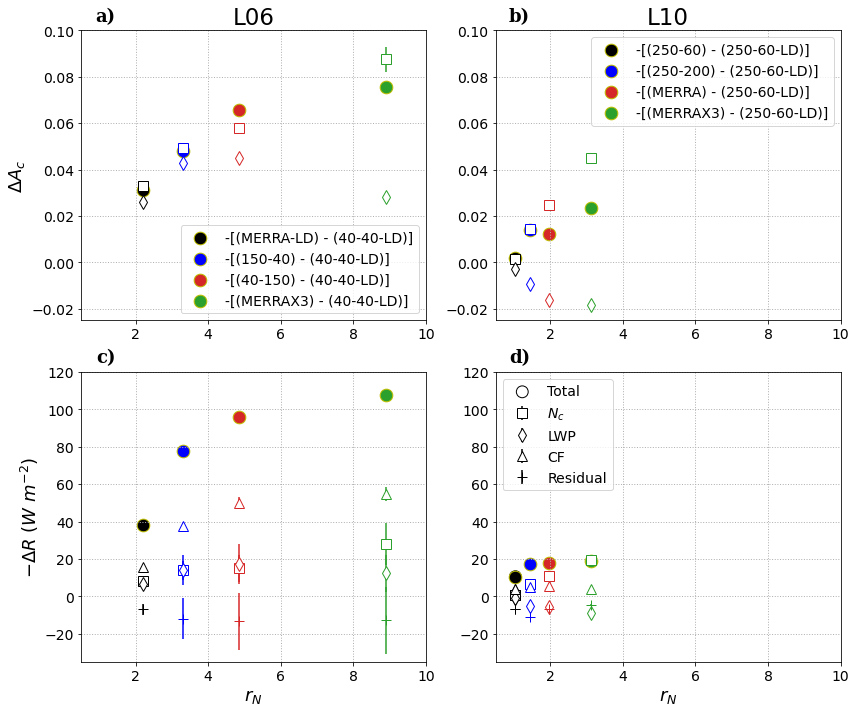

In [19]:
j1 = [0, 0, 0, 0,    8,  8,  8, 8 ]
j2 = [5, 3, 4, 7,    9,  13, 14, 15]

color2 = ['k', 'b', 'tab:red', 'tab:green', 'k', 'b', 'tab:red', 'tab:green']
marker10 = ['o', 's', 'd', '^', '+', 'x', '*', 'p']

PANELS1 = ['a)', 'b)', 'c)', 'd)']

#####
fig, axis = plt.subplots(2, 2,figsize=(12,10))

i = 0; j = 0
axis[i,j].set_ylabel('$ΔA_c$', fontsize = '18')
axis[i,j].set_title('L06', fontsize = '23')
axis[i,j].set_xlim([0.5, 10])
axis[i,j].set_ylim([-0.025, 0.1])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':',linewidth=1) # axis='y', 
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 0; j = 1
axis[i,j].set_title('L10', fontsize = '23')
axis[i,j].set_xlim([0.5, 10])
axis[i,j].set_ylim([-0.025, 0.1])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1)
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

######
i = 1; j = 0
axis[i,j].set_ylabel('$-ΔR$ ($W$ $m^{-2}$)', fontsize = '18')
axis[i,j].set_xlabel('$r_N$', fontsize = '18')
axis[i,j].set_xlim([0.5, 10])
axis[i,j].set_ylim([-35, 120])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1)
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 1; j = 1
axis[i,j].set_xlabel('$r_N$', fontsize = '18')
axis[i,j].set_xlim([0.5, 10])
axis[i,j].set_ylim([-35, 120])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', linewidth=1)
axis[i,j].text(0.1, 1.08, PANELS1[i*2+j], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')


#####
for ii in range(len(j1)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii < (len(j1) // 2) else 17 

    rN_nan_fd, rL_nan_fd, rC_nan_fd, CRE_M_fd, CRE_T_fd, CRE_L_fd, CRE_CF_fd, CRE_rs_fd, A_M_fd, A_T_fd, \
           A_L_fd, A_CF_fd, A_rs_fd, CRE_M_fd1, CRE_T_fd1, CRE_L_fd1, CRE_CF_fd1, CRE_rs_fd1, A_M_fd1, A_T_fd1, \
           A_L_fd1, A_CF_fd1, A_rs_fd1, CRE_M_fd2, CRE_T_fd2, CRE_L_fd2, CRE_CF_fd2, CRE_rs_fd2, A_M_fd2, A_T_fd2, \
           A_L_fd2, A_CF_fd2, A_rs_fd2, CF1_nan_fd, CF2_nan_fd, CF_nan_fd = quant_CRE_extended(j1[ii], j2[ii])

    ####
    i = 0
    if ii < len(j1) // 2:
        j = 0
    else:
        j = 1       

#     if ii == 0 or ii == 4:
#         axis[i,j].errorbar(rN_nan_fd, CF_nan_fd/10, yerr = abs(CF2_nan_fd - CF1_nan_fd) / 20, markersize=8, fmt=marker10[-1], color='tab:orange', label='CF/10')
#     #    axis[i,j].errorbar(rN_nan_fd, A_T_fd, yerr = abs(A_T_fd2 - A_T_fd1) / 2, fmt=marker10[ii], color='tab:red', label='Twomey')
#     #    axis[i,j].errorbar(rN_nan_fd, A_L_fd, yerr = abs(A_L_fd2 - A_L_fd1) / 2, fmt=marker10[ii], color='tab:green', label='LWP')
#     else:
#         axis[i,j].errorbar(rN_nan_fd, CF_nan_fd/10, yerr = abs(CF2_nan_fd - CF1_nan_fd) / 20, markersize=8, fmt=marker10[-1], color='tab:orange')
    axis[i,j].errorbar(rN_nan_fd, A_T_fd, yerr = abs(A_T_fd2 - A_T_fd1) / 2, markersize=10, fmt=marker10[1], color=color2[ii], mfc='white')#,alpha=.8)
    axis[i,j].errorbar(rN_nan_fd, A_L_fd, yerr = abs(A_L_fd2 - A_L_fd1) / 2, markersize=10, fmt=marker10[2], color=color2[ii], mfc='white')#,alpha=.8)
 
    axis[i,j].scatter(rN_nan_fd, A_M_fd, s=160, marker=marker10[0], color=color2[ii],  edgecolors='y', label='-[('+lb[j2[ii]]+')'+' - '+'('+lb[j1[ii]]+')]') 
    if j == 0:
        axis[i,j].legend(fontsize = '14', loc='lower right')
    elif j == 1:
        axis[i,j].legend(fontsize = '14', loc='upper right')
        
    
    ####
    i = 1
    if ii < len(j1) // 2:
        j = 0
    else:
        j = 1       

    if ii == 4: #ii == 0 or 
        pp1 = axis[i,j].scatter(rN_nan_fd, - CRE_M_fd, s=140, marker=marker10[0], facecolors='none', edgecolors=color2[ii])#, label='-[('+lb[j2[ii]]+')'+' - '+'('+lb[j1[ii]]+')]') 
        pp2 = axis[i,j].errorbar(rN_nan_fd, - CRE_T_fd, yerr = abs(CRE_T_fd2 - CRE_T_fd1) / 2, markersize=10, fmt=marker10[1], color=color2[ii], mfc='white')#,alpha=.8)
        pp3 = axis[i,j].errorbar(rN_nan_fd, - CRE_L_fd, yerr = abs(CRE_L_fd2 - CRE_L_fd1) / 2, markersize=10, fmt=marker10[2], color=color2[ii], mfc='white')#,alpha=.8)
        pp4 = axis[i,j].errorbar(rN_nan_fd, - CRE_CF_fd, yerr = abs(CRE_CF_fd2 - CRE_CF_fd1) / 2, markersize=10, fmt=marker10[3], color=color2[ii], mfc='white')#,alpha=.8)
        pp5 = axis[i,j].errorbar(rN_nan_fd, - CRE_rs_fd, yerr = abs(CRE_rs_fd2 - CRE_rs_fd1) / 2, markersize=10, fmt=marker10[4], color=color2[ii], mfc='white')#,alpha=.8)        
    axis[i,j].errorbar(rN_nan_fd, - CRE_T_fd, yerr = abs(CRE_T_fd2 - CRE_T_fd1) / 2, markersize=10, fmt=marker10[1], color=color2[ii], mfc='white')#,alpha=.8)
    axis[i,j].errorbar(rN_nan_fd, - CRE_L_fd, yerr = abs(CRE_L_fd2 - CRE_L_fd1) / 2, markersize=10, fmt=marker10[2], color=color2[ii], mfc='white')#,alpha=.8)
    axis[i,j].errorbar(rN_nan_fd, - CRE_CF_fd, yerr = abs(CRE_CF_fd2 - CRE_CF_fd1) / 2, markersize=10, fmt=marker10[3], color=color2[ii], mfc='white')#,alpha=.8)
    axis[i,j].errorbar(rN_nan_fd, - CRE_rs_fd, yerr = abs(CRE_rs_fd2 - CRE_rs_fd1) / 2, markersize=10, fmt=marker10[4], color=color2[ii], mfc='white')#,alpha=.8)
    
    axis[i,j].scatter(rN_nan_fd, - CRE_M_fd, s=160, marker=marker10[0], color=color2[ii],  edgecolors='y', label='-[('+lb[j2[ii]]+')'+' - '+'('+lb[j1[ii]]+')]') 


    #leg1 = axis[i,j].legend(fontsize = '10')
    
#axis[i,j].scatter(Td, CRE_M_d, s=80, marker='X', color=cc[4]) 

leg2 = axis[1,1].legend([pp1, pp2, pp3, pp4, pp5],['Total', '$N_c$', 'LWP', 'CF', 'Residual'], fontsize = '14', loc='upper left')
#axis[1,1].add_artist(leg1) # Manually add the first legend back    

plt.tight_layout()  # w_pad=1
plt.savefig('decomp_CRE.pdf' , format='pdf', dpi=500)

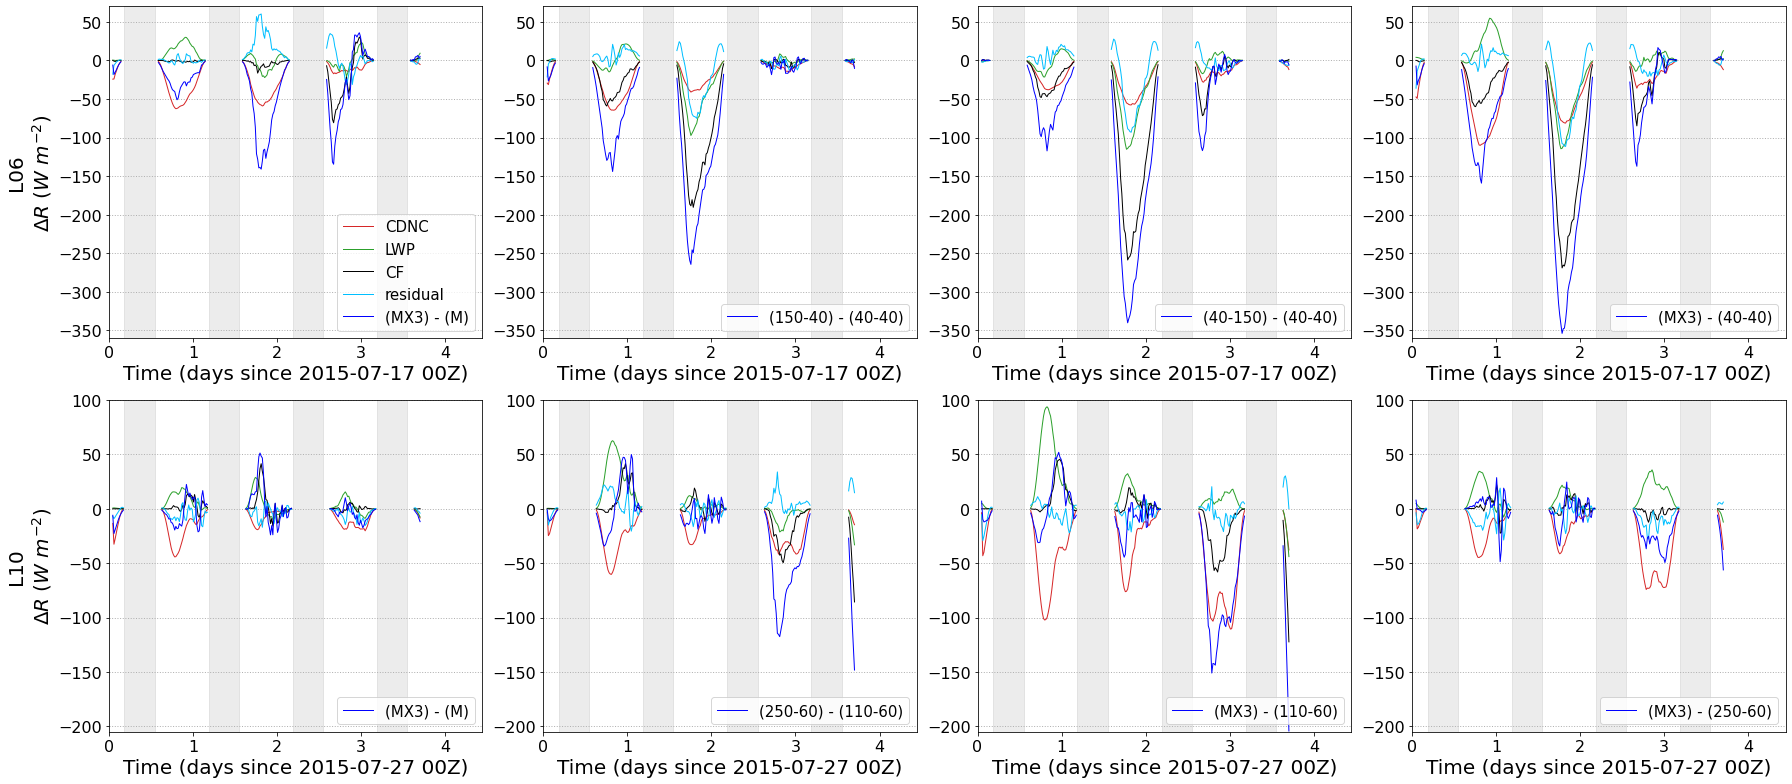

In [12]:
lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]
fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
color = ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
color2 = [ 'k', 'b', 'tab:red', 'tab:green',   'k', 'b', 'tab:red', 'tab:green']

it  = '2015-07-17 00Z' 
it2 = '2015-07-27 00Z' 

init_time_all = [it, it, it, it, it2, it2, it2, it2] 

box = 5
lngh = 5
a_ft = 0.05  # albedo of free troposphere

j1 = [6, 1, 1, 1,   14, 12, 12, 9 ]
j2 = [7, 3, 4, 7,   15,  9, 15, 15]

marker = ['o', 'x', 's', '*', '^', '+', 'd', 'p']

box = 5
lngh = 5
a_ft = 0.05  # albedo of free troposphere

fn2d     = [file2d , file2d1 , file2d2 , file2d3 , file2d4 , file2d5 , file2d6 ,  file2d7,\
           file2d00, file2d10, file2d20, file2d30, file2d40, file2d50, file2d60,  file2d70]


######

fig, axis = plt.subplots(2, 4,figsize=(25,11))
i = 0; j = 0
########
for ii in range(len(j1)):

    if ii == 0 or ii == 4:
        j = 0
    elif ii == 1 or ii == 5:
        j = 1
    elif ii == 2 or ii == 6:
        j = 2
    else:
        j = 3

    if ii <= 3:
        i = 0
    else:
        i = 1
        
    if j == 0 and i == 0:
        axis[i,j].set_ylabel('L06\n$ΔR$ ($W$ $m^{-2}$)', fontsize = '20')
    elif j == 0 and i == 1:
        axis[i,j].set_ylabel('L10\n$ΔR$ ($W$ $m^{-2}$)', fontsize = '20')

    ####
    rN, rL, rC_nan_fd, CRE_M, CRE_T, CRE_L, CRE_CF, CRE_rs, A_M, A_T, A_L, A_CF, A_rs, CRE1, CRE2, CF1 = quant_CRE_alltime1(j1[ii], j2[ii])

    axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
    #axis[i,j].plot(MERRA_time2[:idx_end_MER], CERES_sw_cre[:idx_end_MER], ':', linewidth= 3, color='darkslategray', label='CERES')
    axis[i,j].set_xlabel('Time (days since '+init_time_all[ii]+')', fontsize = '20')
    axis[i,j].set_xlim([0, xlim + xlim / lngh])
    axis[i,j].tick_params(axis='both', which='major', labelsize=16)
    axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

    if i == 0:
        axis[i,j].set_ylim([-360, 70])
    else:
        axis[i,j].set_ylim([-205, 100])
        
#    jj = j2
##    axis[i,j].plot(time, CRE_M, '-', linewidth= 1, color='b', label='('+lb[j2[ii]]+')'+' - '+'('+lb[j1[ii]]+')') 
#    axis[i,j].set_xlim([0, xlim + xlim / lngh])
#    axis[i,j].plot(time, CRE_T, '-.', linewidth= .5, color='r') #
#    axis[i,j].plot(time, CRE_L, '-', linewidth= .5, color='g') #
#    axis[i,j].plot(time, CRE_CF, '-.', linewidth= .5, color='k') #
#    axis[i,j].plot(time, CRE_rs, '-.', linewidth= .5, color='deepskyblue') #
#    axis[i,j].legend(fontsize = '13', loc='lower right')

    ####
    rN, rL, rC_nan_fd, CRE_M2, CRE_T2, CRE_L2, CRE_CF2, CRE_rs2, A_M, A_T, A_L, A_CF, A_rs, CRE1_2, CRE2_2, CF2 = quant_CRE_alltime2(j2[ii], j1[ii])

#    jj = j2
#    axis[i,j].set_xlim([0, xlim + xlim / lngh])
#    axis[i,j].plot(time, CRE_T2, '--', linewidth= .5, color='r') #
#    axis[i,j].plot(time, CRE_L2, '--', linewidth= .5, color='g') #
#    axis[i,j].plot(time, CRE_CF2, '--', linewidth= .5, color='k') #
#    axis[i,j].plot(time, CRE_rs2, '--', linewidth= .5, color='deepskyblue') #
#    axis[i,j].legend(fontsize = '13', loc='lower right')

    #####
    jj = j2
    if i == 0 and j == 0:
        axis[i,j].set_xlim([0, xlim + xlim / lngh])
        axis[i,j].plot(time, (CRE_T + CRE_T2) / 2, linewidth= 1, color='tab:red', label='CDNC') 
        axis[i,j].plot(time, (CRE_L + CRE_L2) / 2, linewidth= 1, color='tab:green', label='LWP') 
        axis[i,j].plot(time, (CRE_CF + CRE_CF2) / 2, linewidth= 1, color='k', label='CF') 
        axis[i,j].plot(time, (CRE_rs + CRE_rs2) / 2, linewidth= 1, color='deepskyblue', label='residual') 
    else:
        axis[i,j].set_xlim([0, xlim + xlim / lngh])
        axis[i,j].plot(time, (CRE_T + CRE_T2) / 2, linewidth= 1, color='tab:red') 
        axis[i,j].plot(time, (CRE_L + CRE_L2) / 2, linewidth= 1, color='tab:green') 
        axis[i,j].plot(time, (CRE_CF + CRE_CF2) / 2, linewidth= 1, color='k') 
        axis[i,j].plot(time, (CRE_rs + CRE_rs2) / 2, linewidth= 1, color='deepskyblue') 
    axis[i,j].plot(time, (CRE_M + CRE_M2) / 2, '-', linewidth= 1, color='b', label='('+lb[j2[ii]]+')'+' - '+'('+lb[j1[ii]]+')') 
    axis[i,j].legend(fontsize = '15', loc='lower right')


plt.tight_layout(w_pad=1)
plt.show()

## Transmissivity

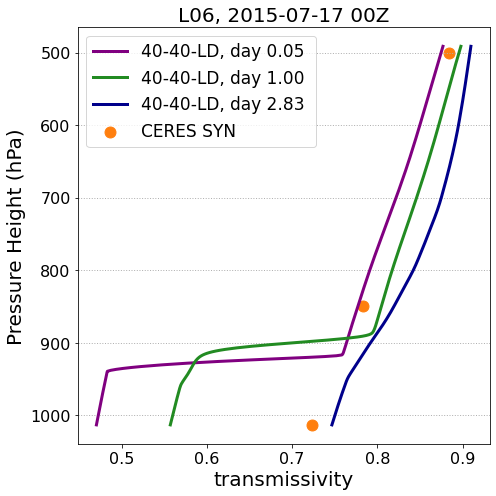

In [331]:
from datetime import timedelta
from datetime import date, timedelta
from scipy import interpolate
from datetime import date, timedelta
from scipy.interpolate import griddata

def interp_point(x, y, var, st_lon, st_lat):
    X, Y = np.meshgrid(st_lon, st_lat)
    interp = griddata( (np.reshape(x, -1), np.reshape(y, -1)), np.reshape(var, -1), (X, Y), method='linear' )[0][0]
    return interp

# find date from days after a specific date
def find_date(days, start):       # This may work for floats in general, but using integers is more precise (e.g. days = int(9465.0))
    delta = timedelta(int(days))  # Create a time delta object from the number of days
    date_dmc = start + delta      # Add the specified number of days to start
    return date_dmc

ceres_L06_date = date(2015,7,15)


#######
ii = 0
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
        acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
        height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
        SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])

RADSWUP  = fn2[ii].variables['RADSWUP'][:]       # Upward   shortwave radiative flux: W/m2
RADSWDN  = fn2[ii].variables['RADSWDN'][:]       # Downward shortwave radiative flux: W/m2
RADLWUP  = fn2[ii].variables['RADLWUP'][:]       # Upward    longwave radiative flux: W/m2
RADLWDN  = fn2[ii].variables['RADLWDN'][:]       # Downward  longwave radiative flux: W/m2

T_ft1= SWNTOAC / SOLIN2  # old method: transmissivity of the free troposphere
RADSWDN_Zinv = SOLIN2.copy()
RADSWDN_Zinv[:] = np.nan
for i in range(len(RADSWDN_Zinv)):
    RADSWDN_Zinv[i] = RADSWDN[i,inv_idx[i]+5]

T_ft1_new = RADSWDN_Zinv / SOLIN2  # old method: transmissivity of the free troposphere

# plt.plot(time, T_ft1)
# plt.plot(time, T_ft1_new)

########
forcing = Dataset('../CSET_RF06_Tr2p3/Forcings_CSET_rf06_traj2p3_v1p2_2021-01-08_MERRA2loglogMBL.nc')
lat     =  np.array( forcing.variables['lat'][:] )[0]   
lon     =  np.array( forcing.variables['lon'][:] )[0]     

########
ceres_file = Dataset('/home/disk/eos3/erfani/Data/CERES_SYN1deg-Month_Terra-Aqua-MODIS_Ed4.1_Subset_200003-202201_clearsky_T.nc')
ceres_time = ceres_file.variables['time'][:]
ceres_lat = ceres_file.variables['lat'][:]
ceres_lon = ceres_file.variables['lon'][:]
ceres_lon_msh, ceres_lat_msh = np.meshgrid(ceres_lon, ceres_lat)

i_lat_c = np.where( abs(ceres_lat - lat) == np.nanmin( abs(ceres_lat - lat) ) )[0][0]
i_lon_c = np.where( abs(ceres_lon - (360 + lon)) == np.nanmin( abs(ceres_lon - (360 + lon)) ) )[0][0]

ceres_date = []
for i in range(len(ceres_time)):
    ceres_date.append(find_date( ceres_time[ii], date(2000,3,1) ))
ceres_date = np.array(ceres_date)


adj_atmos_sw_down_clr_toa_mon = np.array(ceres_file.variables['adj_atmos_sw_down_clr_toa_mon'][i_ceres,i_lat_c,i_lon_c])
adj_atmos_sw_down_clr_500mb_mon = np.array(ceres_file.variables['adj_atmos_sw_down_clr_500mb_mon'][i_ceres,i_lat_c,i_lon_c])
adj_atmos_sw_down_clr_850mb_mon = np.array(ceres_file.variables['adj_atmos_sw_down_clr_850mb_mon'][i_ceres,i_lat_c,i_lon_c])
adj_atmos_sw_down_clr_surface_mon = np.array(ceres_file.variables['adj_atmos_sw_down_clr_surface_mon'][i_ceres,i_lat_c,i_lon_c])

i_day = np.where( abs(time - t_presc1) == np.nanmin( abs(time - t_presc1) ) )[0][0]    

########################
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Pressure Height (hPa)', fontsize = '20')
axis.set_xlabel('transmissivity', fontsize = '20')
#axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=16)
axis.grid(linestyle=':', axis='y', linewidth=1)

axis.plot(RADSWDN[0,:]/SOLIN2[0], P, color='purple', label=lb[ii] + ', day {:.2f} '.format(time[0]), linewidth = 3)
axis.plot(RADSWDN[i_day,:]/SOLIN2[i_day], P, color='forestgreen', label=lb[ii] + ', day {:.2f} '.format(t_presc1), linewidth = 3)
axis.plot(RADSWDN[200,:]/SOLIN2[200], P, color='darkblue', label=lb[ii] + ', day {:.2f} '.format(time[200]), linewidth = 3)
#plt.plot(RADSWDN[-1,:]/SOLIN2[-1], P)
axis.scatter(ceres_f_ta, ceres_p, s=120, color='tab:orange', label='CERES SYN')
        
plt.gca().invert_yaxis()

leg1 = axis.legend(fontsize = '17')#, loc='lower right')        

axis.set_title('L06, 2015-07-17 00Z', fontsize = '20')        

plt.tight_layout(w_pad=1)
plt.show()

## Turbulence for PNNL collaboration

### run-time averages

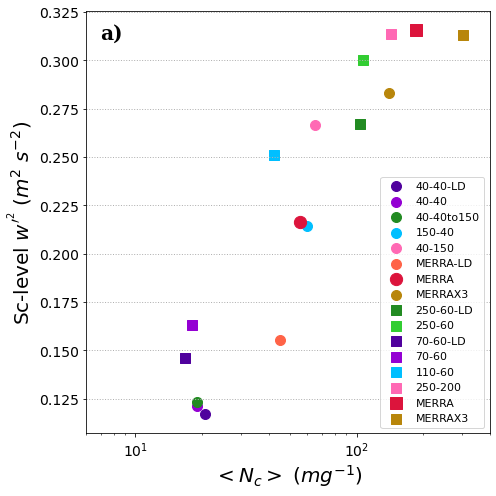

In [320]:
myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)

lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]

color2= [myblue1     , 'darkviolet', 'forestgreen', 'deepskyblue', 'hotpink'    ,  'tomato', 'crimson', 'darkgoldenrod',\
        'forestgreen','limegreen'  , myblue1      ,'darkviolet'  , 'deepskyblue', 'hotpink', 'crimson', 'darkgoldenrod']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 100, 150, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  ]

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']


#########
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize = '20')
axis.set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize = '20')
axis.set_xscale('log')
axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])
    
    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    ##########
    i = 0    
    j = 0
    axis.scatter(np.nansum(SOLIN2 * NC_m) / np.nansum(SOLIN2), np.nanmean(W2_Zinv_200), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii], alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11', loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

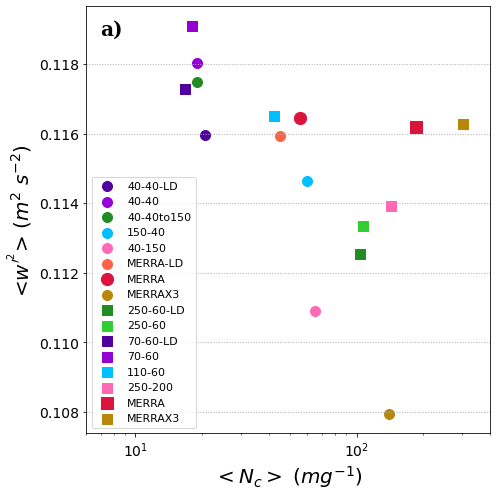

In [321]:
########################
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('<$w^{{\prime}^2}$> ($m^2$ $s^{-2}$)', fontsize = '20')
axis.set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize = '20')
axis.set_xscale('log')
axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])

    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    W2  = fn2[ii].variables['W2'][:]       # Variance of the z wind component: m2/s2

    W2_500    = W2[:,0].copy()
    W2_500[:] = np.nan
    for i in range(W2[:,0].size):
        ix_w2 = np.where( abs(z - 500) == np.nanmin( abs(z - 500) ) )[0][0]
        W2_500[i] = np.nanmean(W2[i,:ix_w2+1],0)
        
    ##########
    i = 0    
    j = 0
    axis.scatter(np.nansum(SOLIN2 * NC_m) / np.nansum(SOLIN2), np.nanmean(W2_500), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii])#, alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11')#, loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

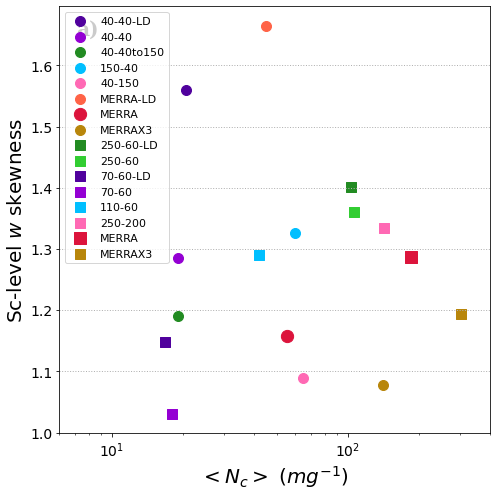

In [322]:
########################
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w$ skewness', fontsize = '20')
axis.set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize = '20')
axis.set_xscale('log')
axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])

    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    
    # calculate skewness
    W2    = fn2[ii].variables['W2'][:]       # Variance of the z wind component: m2/s2
    W3    = fn2[ii].variables['W3'][:]       # Variance of the z wind component: m2/s2
    wskew = W3 / (W2 ** 1.5)
    
    wskew_Sc    = wskew[:,0].copy()
    wskew_Sc[:] = np.nan
    for i in range(wskew[:,0].size):
        ix_wskew = np.where(abs(ZINV[i] - z) == np.nanmin(abs(ZINV[i] - z)))[0]
        wskew_Sc[i] = wskew[i,ix_wskew]
        
    ##########
    i = 0    
    j = 0
    axis.scatter(np.nansum(SOLIN2 * NC_m) / np.nansum(SOLIN2), np.nanmean(wskew_Sc), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii])#, alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11')#, loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

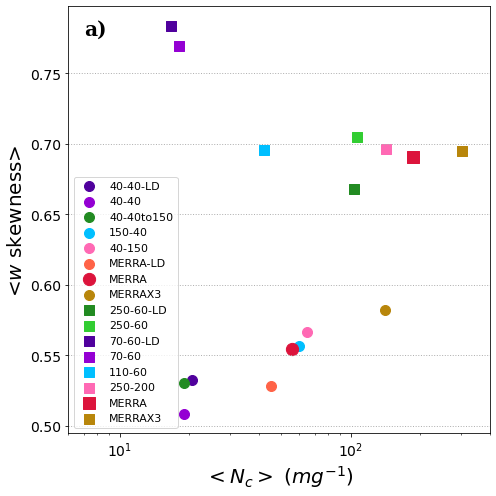

In [323]:
########################
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('<$w$ skewness>', fontsize = '20')
axis.set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize = '20')
axis.set_xscale('log')
axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18       if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])

    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()
    
    # calculate skewness
    W2  = fn2[ii].variables['W2'][:]       # Variance of the z wind component: m2/s2
    W3  = fn2[ii].variables['W3'][:]       # Variance of the z wind component: m2/s2
    wskew = np.nanmean(W3, 0) / ( ( np.nanmean(W2, 0) ) ** 1.5 )
    
    ix_wskew  = np.where(abs(z - 500) == np.nanmin(abs(z - 500)))[0][0]
    wskew_500 = np.nanmean(wskew[:ix_wskew+1])
    
    ##########
    i = 0    
    j = 0
    axis.scatter(np.nansum(SOLIN2 * NC_m) / np.nansum(SOLIN2), wskew_500, \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii])#, alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11')#, loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

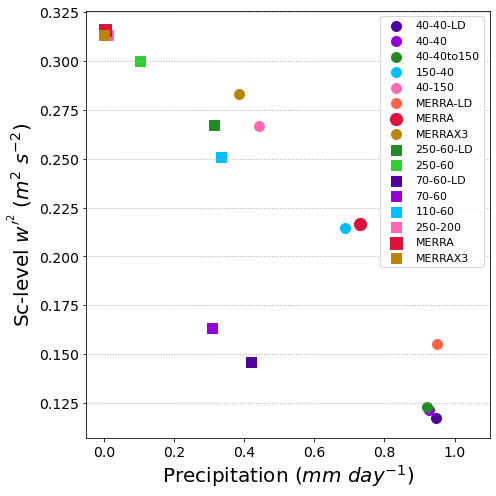

In [511]:
myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)

lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]

color2= [myblue1     , 'darkviolet', 'forestgreen', 'deepskyblue', 'hotpink'    ,  'tomato', 'crimson', 'darkgoldenrod',\
        'forestgreen','limegreen'  , myblue1      ,'darkviolet'  , 'deepskyblue', 'hotpink', 'crimson', 'darkgoldenrod']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 100, 150, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  ]

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']


#########
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize = '20')
axis.set_xlabel('Precipitation ($mm$ $day^{-1}$)', fontsize = '20')
#axis.set_xscale('log')
axis.set_xlim([-0.05, 1.1])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])
    
    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    ##########
    i = 0    
    j = 0
    axis.scatter(np.nanmean(PREC), np.nanmean(W2_Zinv_200), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii], alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11')#, loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

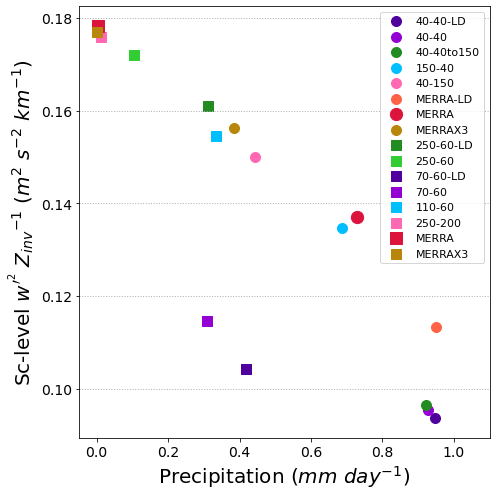

In [515]:
myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)

lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]

color2= [myblue1     , 'darkviolet', 'forestgreen', 'deepskyblue', 'hotpink'    ,  'tomato', 'crimson', 'darkgoldenrod',\
        'forestgreen','limegreen'  , myblue1      ,'darkviolet'  , 'deepskyblue', 'hotpink', 'crimson', 'darkgoldenrod']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 100, 150, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  ]

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']


#########
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w^{{\prime}^2}$ ${Z_{inv}}^{-1}$ ($m^2$ $s^{-2}$ $km^{-1}$)', fontsize = '20')
axis.set_xlabel('Precipitation ($mm$ $day^{-1}$)', fontsize = '20')
#axis.set_xscale('log')
axis.set_xlim([-0.05, 1.1])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])
    
    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    ##########
    i = 0    
    j = 0
    axis.scatter(np.nanmean(PREC), np.nanmean(W2_Zinv_200 * 1000 / ZINV), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii], alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11')#, loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

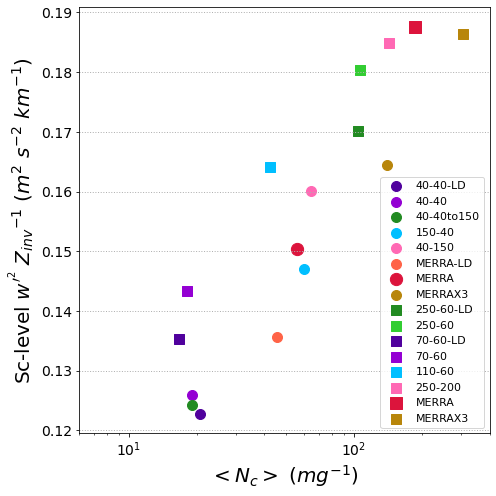

In [521]:
myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)

lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]

color2= [myblue1     , 'darkviolet', 'forestgreen', 'deepskyblue', 'hotpink'    ,  'tomato', 'crimson', 'darkgoldenrod',\
        'forestgreen','limegreen'  , myblue1      ,'darkviolet'  , 'deepskyblue', 'hotpink', 'crimson', 'darkgoldenrod']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 100, 150, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  ]

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']


#########
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w^{{\prime}^2}$ ${Z_{inv}}^{-1}$ ($m^2$ $s^{-2}$ $km^{-1}$)', fontsize = '20')
axis.set_xlabel('$<N_c>$ ($mg^{-1}$)', fontsize = '20')
axis.set_xscale('log')
axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])
    
    W2  = fn2[ii].variables['W2'][:]       # Variance of the z wind component: m2/s2
    W2_max = np.nanmax(W2,1)    

    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    ##########
    i = 0    
    j = 0
    axis.scatter(np.nansum(SOLIN2 * NC_m) / np.nansum(SOLIN2), np.nanmean(W2_max * 1000 / ZINV), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii], alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11', loc='lower right')        
    
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

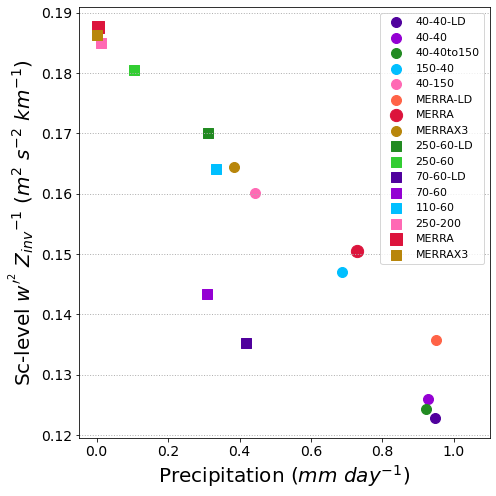

In [519]:
myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)

lb    = [ '40-40-LD' ,  '40-40'    , '40-40to150' , '150-40'     , '40-150'     ,  'MERRA-LD'  , 'MERRA'      , 'MERRAX3'          \
       , '250-60-LD' , '250-60'    , '70-60-LD'   , '70-60'      , '110-60'     , '250-200', 'MERRA'      , 'MERRAX3' ]

color2= [myblue1     , 'darkviolet', 'forestgreen', 'deepskyblue', 'hotpink'    ,  'tomato', 'crimson', 'darkgoldenrod',\
        'forestgreen','limegreen'  , myblue1      ,'darkviolet'  , 'deepskyblue', 'hotpink', 'crimson', 'darkgoldenrod']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file05, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 100, 150, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  ]

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']


#########
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w^{{\prime}^2}$ ${Z_{inv}}^{-1}$ ($m^2$ $s^{-2}$ $km^{-1}$)', fontsize = '20')
axis.set_xlabel('Precipitation ($mm$ $day^{-1}$)', fontsize = '20')
#axis.set_xscale('log')
axis.set_xlim([-0.05, 1.1])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.text(0.09, .97, PANELS1[i*4+j], transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', fontfamily='serif', ha='right')

###########
for ii in range(len(fn2)): # [0, 1, 4, 5]:
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])
 
    W2  = fn2[ii].variables['W2'][:]       # Variance of the z wind component: m2/s2
    W2_max = np.nanmax(W2,1)    
    
    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()

    ##########
    i = 0    
    j = 0
    axis.scatter(np.nanmean(PREC), np.nanmean(W2_max * 1000 / ZINV), \
                      s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii], alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '11')#, loc='lower right')        
    
plt.tight_layout(w_pad=1)
plt.show()

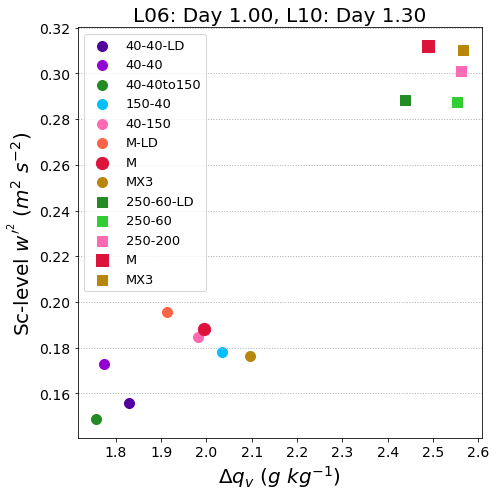

In [330]:
########################
fig, axis = plt.subplots(1, 1,figsize=(7,7))

i = 0; j = 0
axis.set_ylabel('Sc-level $w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize = '20')
axis.set_xlabel('$Δq_v$ ($g$ $kg^{-1}$)', fontsize = '20')
#axis.set_xscale('log')
#axis.set_xlim([6, 400])
#axis.set_ylim([-105, -10])
axis.tick_params(axis='both', which='major', labelsize=14)
axis.grid(linestyle=':', axis='y', linewidth=1)

###########
for ii in turb_cases: 
    Obs_jump = 18 if ii <= len(fn2) // 2 - 1 else 17 
    t_presc  = t_presc1 if ii <= len(fn2) // 2 - 1 else t_presc2 

    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE,\
            SWNTOAC, PRECIP, CLD, W2, WOBS, QV = read_model_vars(fn2[ii])

    LCC = ISCCPTOT.copy()    
    NC_m = integ_NC_BL.copy()
    LWP = CWP + RWP
    LWP_m = LWP.copy()
    
    ### calculate decoupling
    QV_25 = ZINV.copy() 
    QV_75 = ZINV.copy() 
    for ij in range(len(ZINV)):
        QV_25[ij], QV_75[ij] = calc_decoupling(z, dz, RHO[ij,:], inv_idx[ij], ZINV[ij], QV[ij,:])

    ##########
    i = 0    
    j = 0
    i_day = np.where( abs(time - t_presc) == np.nanmin( abs(time - t_presc) ) )[0][0]    
    axis.scatter(np.nanmean( ( QV_25 - QV_75) [i_day-5:i_day+6]), np.nanmean(W2_Zinv_200[i_day-5:i_day+6]), \
                 s=mrk_siz[ii], marker=marker3[ii], color=color2[ii], label=lb[ii], alpha=alpha[ii])
    
    leg1 = axis.legend(fontsize = '13')#, loc='lower right')        

axis.set_title('L06: Day {:.2f}, '.format(t_presc1) + 'L10: Day {:.2f}'.format(t_presc2), fontsize = '20')        
#leg2 = axis[0,2].legend([obs1, obs2],['GOES', 'CERES'], fontsize = '11', loc='upper right')
#axis[0,2].add_artist(leg1) # Manually add the first legend back

plt.tight_layout(w_pad=1)
plt.show()

## Coefficient of variation

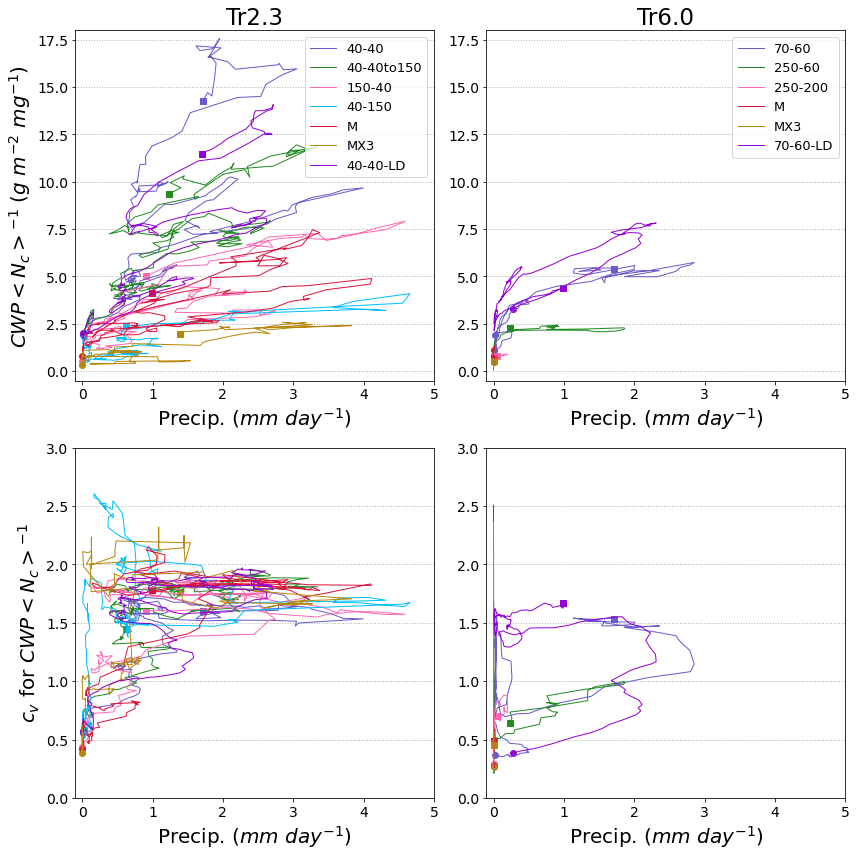

In [13]:
file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
#file3d7 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')

file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
#file3d60 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96_TEST.2Dbin_1.nc')


###
#lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'M'            , 'MX3'          ,  '40-40-LD',  'M-LD'\
#       , '70-60'     , '250-60'     , '250-200', 'M'          , 'MX3'          , '70-60-LD'     ,  '250-60-LD']

#color2= ['slateblue' , 'forestgreen', 'hotpink', 'deepskyblue', 'crimson'      , 'darkgoldenrod',  'darkviolet',  'tomato'\
#        ,'slateblue' , 'forestgreen', 'hotpink', 'crimson'    , 'darkgoldenrod', 'darkviolet'    , 'limegreen']

#fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file10, file20, file30, file40, file50, file60]
#marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
#marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
#mrk_siz = [100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 150, 100, 100, 100]
#alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6]

lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'M'            , 'MX3'          ,  '40-40-LD'\
       , '70-60'     , '250-60'     , '250-200', 'M'          , 'MX3'          , '70-60-LD'   ]

color2= ['slateblue' , 'forestgreen', 'hotpink', 'deepskyblue', 'crimson'      , 'darkgoldenrod',  'darkviolet'\
        ,'slateblue' , 'forestgreen', 'hotpink', 'crimson'    , 'darkgoldenrod', 'darkviolet'   ]

fn3d   = [file3d0,  file3d1,  file3d2,  file3d3,  file3d4,  file3d5, file3d6,\
         file3d00, file3d10, file3d20, file3d30, file3d40, file3d50]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 150, 100, 100, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 ]
lw      = ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
###
box = 9
def coef_var(var):
    #mean = np.nanmean(np.nanmean(var, 2), 1)
    #std  = np.nanstd( np.nanstd( var, 2), 1)
    #return smooth(std / mean, box) 
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanstd(var[i,:,:]) / np.nanmean(var[i,:,:])  
#        output[i] = variation(variation(var[i,:,:], 1), 0)
    return smooth(output, box)
    
def domain_mean(var):
    #return smooth( np.nanmean(np.nanmean(var, 2), 1) , box)
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanmean(var[i,:,:])  
    return smooth(output, box)

################    
fig, axis = plt.subplots(2, 2,figsize=(12,12))

i = 0; j = 0
axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
axis[i,j].set_ylabel('$CWP <N_c>^{-1}$ ($g$ $m^{-2}$ $mg^{-1}$)', fontsize = '20')
axis[i,j].set_title('Tr2.3', fontsize = '23')
axis[i,j].set_xlim([-.1, 5])
axis[i,j].set_ylim([-.5, 18])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
#axis[i,j].legend(fontsize = '13')#, loc='lower right')

####
i = 0; j = 1
axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
axis[i,j].set_title('Tr6.0', fontsize = '23')
axis[i,j].set_xlim([-.1, 5])
axis[i,j].set_ylim([-.5, 18])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

#######
i = 1; j = 0
axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
axis[i,j].set_ylabel('$c_v$ for $CWP <N_c>^{-1}$', fontsize = '20')
axis[i,j].set_xlim([-.1, 5])
axis[i,j].set_ylim([0, 3])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

####
i = 1; j = 1
axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
axis[i,j].set_xlim([-.1, 5])
axis[i,j].set_ylim([0, 3])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)


######
for ii in range(len(fn3d)):
    if ii <= len(fn3d) // 2: j = 0
    else: j = 1

    T3D      = fn3d[ii].variables['time'][:]    # time: day
    QCPATH   = fn3d[ii].variables['QCPATH'][:]  # Column cloud liquid mass (vertically integrated), unit: kg/m2
    Prec     = fn3d[ii].variables['Prec'][:]    # Surface Precip. Rate, unit: mm/day
#    ISCCPTAU = fn3d[ii].variables['ISCCPTAU'][:]  # ISCCP Optical Depth (~670nm, from RRTMG SW band 9: 625-778nm), unitless
    NCQCPATH = fn3d[ii].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = NCQCPATH / QCPATH 
    CDNC     = CDNC * 1e-6    # #/mg
    CWP      = QCPATH * 1000  # g/m2
    if ii == len(fn2) // 2:
        CDNC[:50,:,:][CDNC[:50,:,:] > 80] = 80
    #QRPATH = fn3d[j].variables['QRPATH'][:]   # Column rain mass (vertically integrated), unit: kg/m2
    t3d   = T3D - int(T3D[0])
    #LWC3d = QN + QP
    
    i = 0
    axis[i,j].plot(domain_mean(Prec)[box:-box], domain_mean(CWP / CDNC)[box:-box], color=color2[ii], label=lb[ii], linewidth= lw[ii])
    axis[i,j].scatter(domain_mean(Prec)[box], domain_mean(CWP / CDNC)[box],marker='o', color=color2[ii])
    axis[i,j].scatter(domain_mean(Prec)[-box-1], domain_mean(CWP / CDNC)[-box-1],marker='s', color=color2[ii])
    axis[i,j].legend(fontsize = '13')

    i = 1
    axis[i,j].plot(domain_mean(Prec)[box:-box], coef_var(CWP / CDNC)[box:-box], color=color2[ii], label=lb[ii], linewidth= lw[ii])
    axis[i,j].scatter(domain_mean(Prec)[box], coef_var(CWP / CDNC)[box],marker='o', color=color2[ii])
    axis[i,j].scatter(domain_mean(Prec)[-box-1], coef_var(CWP / CDNC)[-box-1],marker='s', color=color2[ii])
    
       
plt.tight_layout(w_pad=1)
plt.show()    

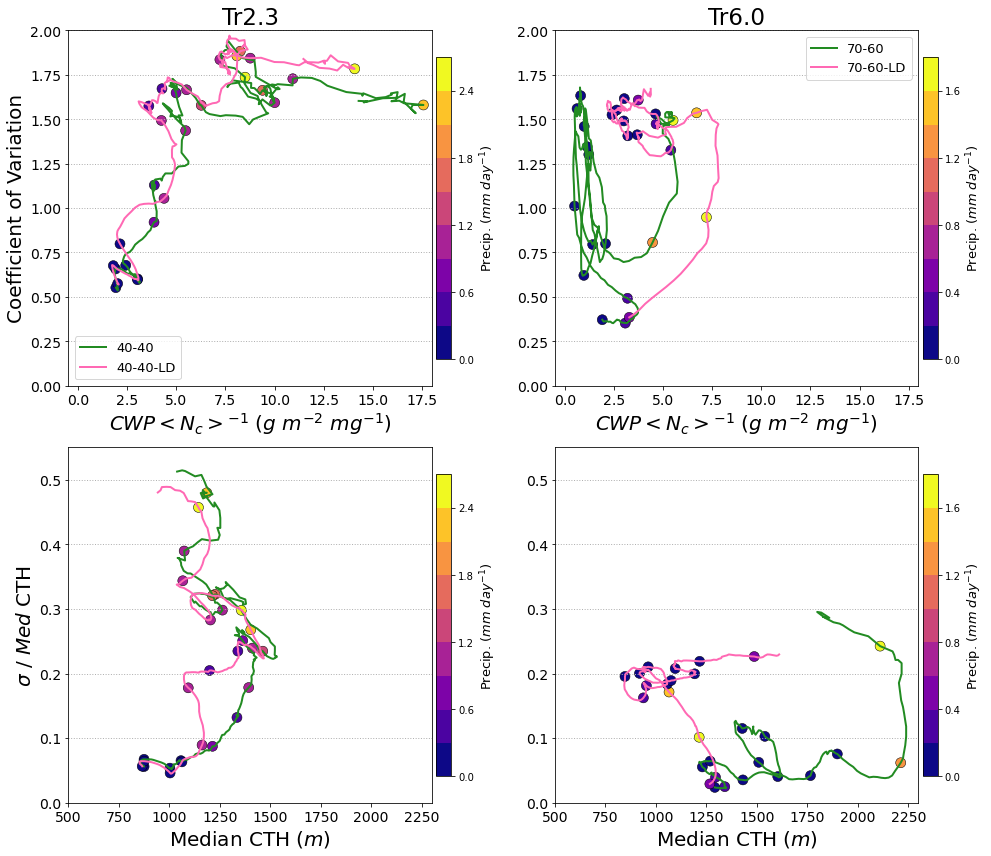

In [8]:
def calc_h_ave(time, ZINV, t_entr):
    len_12 = time[-1] / t_entr + 1
    array_12 = np.arange(0,len_12).astype(float)
    #ZINV_12h = np.arange(0,len_12 - 1).astype(float)
    ZINV_12h = time.copy()
    ZINV_12h[:] = np.nan
    for i in range(int(len_12) - 1):
        tind = np.where( ((time - time[0]) >= array_12[i] * t_entr) & ( (time - time[0]) < array_12[i+1] * t_entr)  )[0]
        ttt  = (array_12[i] * t_entr + array_12[i+1] * t_entr) / 2
        idx  = np.where( abs(time - time[0] - ttt) == np.nanmin( abs(time - time[0] - ttt ) ) )[0]
        ZINV_12h[idx] = np.nanmean(ZINV[tind])
    return ZINV_12h

t_entr = 1 / 4 # in days (= 6 hours) 

####
file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
#file3d7 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')

file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
#file3d60 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96_TEST.2Dbin_1.nc')


###
#lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'M'            , 'MX3'          ,  '40-40-LD',  'M-LD'\
#       , '70-60'     , '250-60'     , '250-200', 'M'          , 'MX3'          , '70-60-LD'     ,  '250-60-LD']

#color2= ['slateblue' , 'forestgreen', 'hotpink', 'deepskyblue', 'crimson'      , 'darkgoldenrod',  'darkviolet',  'tomato'\
#        ,'slateblue' , 'forestgreen', 'hotpink', 'crimson'    , 'darkgoldenrod', 'darkviolet'    , 'limegreen']

#fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file0lw0, file10, file20, file30, file40, file50, file60]
#marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
#marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
#mrk_siz = [100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 150, 100, 100, 100]
#alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6]

lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'M'            , 'MX3'          ,  '40-40-LD'\
       , '70-60'     , '250-60'     , '250-200', 'M'          , 'MX3'          , '70-60-LD'   ]

color2= ['forestgreen' , 'forestgreen', 'hotpink', 'deepskyblue', 'crimson'      , 'darkgoldenrod',  'hotpink'\
        ,'forestgreen' , 'forestgreen', 'hotpink', 'crimson'    , 'darkgoldenrod', 'hotpink'   ]

fn3d   = [file3d0,  file3d1,  file3d2,  file3d3,  file3d4,  file3d5, file3d6,\
         file3d00, file3d10, file3d20, file3d30, file3d40, file3d50]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 150, 100, 100, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 ]
lw      = ['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2']
###

box = 9
def coef_var(var):
    #mean = np.nanmean(np.nanmean(var, 2), 1)
    #std  = np.nanstd( np.nanstd( var, 2), 1)
    #return smooth(std / mean, box) 
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanstd(var[i,:,:]) / np.nanmean(var[i,:,:])  
#        output[i] = variation(variation(var[i,:,:], 1), 0)
    return smooth(output, box)
    
def domain_mean(var):
    #return smooth( np.nanmean(np.nanmean(var, 2), 1) , box)
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanmean(var[i,:,:])  
    return smooth(output, box)

def std_median(var):
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanstd(var[i,:,:]) / np.nanmedian(var[i,:,:])  
    return smooth(output, box)
    
def domain_median(var):
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanmedian(var[i,:,:])  
    return smooth(output, box)

################    
fig, axis = plt.subplots(2, 2,figsize=(14,12))

i = 0; j = 0
axis[i,j].set_ylabel('Coefficient of Variation', fontsize = '20')
axis[i,j].set_xlabel('$CWP <N_c>^{-1}$ ($g$ $m^{-2}$ $mg^{-1}$)', fontsize = '20')
axis[i,j].set_title('Tr2.3', fontsize = '23')
#axis[i,j].set_xscale('log')
axis[i,j].set_xlim([-.5, 18])
axis[i,j].set_ylim([0, 2])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
#axis[i,j].legend(fontsize = '13')#, loc='lower right')

####
i = 0; j = 1
axis[i,j].set_xlabel('$CWP <N_c>^{-1}$ ($g$ $m^{-2}$ $mg^{-1}$)', fontsize = '20')
axis[i,j].set_title('Tr6.0', fontsize = '23')
axis[i,j].set_xlim([-.5, 18])
axis[i,j].set_ylim([0, 2])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)



#######
i = 1; j = 0
axis[i,j].set_ylabel('$σ$ / $Med$ CTH', fontsize = '20')
#axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
#axis[i,j].set_xlim([-.1, 4])
#axis[i,j].set_ylim([0, 22])
axis[i,j].set_xlabel('Median CTH ($m$)', fontsize = '20')
axis[i,j].set_xlim([500, 2300])
axis[i,j].set_ylim([0, .55])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

####
i = 1; j = 1
#axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
#axis[i,j].set_xlim([-.1, 4])
#axis[i,j].set_ylim([0, 22])
axis[i,j].set_xlabel('Median CTH ($m$)', fontsize = '20')
axis[i,j].set_xlim([500, 2300])
axis[i,j].set_ylim([0, .55])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

clevs2 = [np.arange(0, 3.0, .3), np.arange(0, 2., .2)]
ticks2 = [np.arange(0, 3.0, .6), np.arange(0, 2., .4)]
cmap   = plt.cm.plasma
norm   = [matplotlib.colors.BoundaryNorm(clevs2[0], cmap.N),  matplotlib.colors.BoundaryNorm(clevs2[1], cmap.N)]

######
for ii in [0, 6, 7, 12]:
    if ii <= len(fn3d) // 2: j = 0
    else: j = 1

    T3D      = fn3d[ii].variables['time'][:]    # time: day
    NCQCPATH = fn3d[ii].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    QCPATH   = fn3d[ii].variables['QCPATH'][:]  # Column cloud liquid mass (vertically integrated), unit: kg/m2
    Prec     = fn3d[ii].variables['Prec'][:]    # Surface Precip. Rate, unit: mm/day
    ZC       = fn3d[ii].variables['ZC'][:] * 1000 # Cloud top height (Instantaneous): converted to m
##    ISCCPTAU = fn3d[ii].variables['ISCCPTAU'][:] # ISCCP Optical Depth (~670nm, from RRTMG SW band 9: 625-778nm), unitless
#    NCQCPATH[NCQCPATH == 0] = np.nan
#    QCPATH[QCPATH     == 0] = np.nan
#    Prec[Prec         == 0] = np.nan
    ZC[ZC             == 0] = np.nan
    CDNC  = NCQCPATH / QCPATH 
    CDNC  = CDNC * 1e-6    # #/mg
#    CDNC[CDNC.mask == True] = np.nan
    CWP   = QCPATH * 1000  # g/m2
    if ii == len(fn2) // 2:
        CDNC[:50,:,:][CDNC[:50,:,:] > 80] = 80
    t3d   = T3D - int(T3D[0])
    Prec_6h = calc_h_ave(t3d, domain_mean(Prec), t_entr)
    
    m_CWP_CDNC  = domain_mean(CWP / CDNC)
    m_CWP_CDNC[np.isnan(Prec_6h) == 1] = np.nan
    cv_CWP_CDNC = coef_var(CWP / CDNC)
    cv_CWP_CDNC[np.isnan(Prec_6h) == 1] = np.nan
    
    m_ZC  = domain_median(ZC)
    m_ZC[np.isnan(Prec_6h) == 1] = np.nan
    cv_ZC = std_median(ZC)
    cv_ZC[np.isnan(Prec_6h) == 1] = np.nan
    
    
    i = 0
    axis[i,j].plot(domain_mean(CWP / CDNC)[box:-box], coef_var(CWP / CDNC)[box:-box], color=color2[ii], label=lb[ii], linewidth= lw[ii])
    csf1 = axis[i,j].scatter(m_CWP_CDNC, cv_CWP_CDNC, c=Prec_6h, s=100, cmap=cmap, norm=norm[j], edgecolors='k', linewidths=.5)
    if ii == 0 or ii == 7:
        cb1  = plt.colorbar(csf1, ax=axis[i,j], shrink=.85, pad=0.01, ticks=ticks2[j])#, orientation='horizontal')
        cb1.set_label('Precip. ($mm$ $day^{-1}$)', fontsize=13)#, rotation=270)
#    axis[i,j].scatter(domain_mean(CWP / CDNC)[box], coef_var(CWP / CDNC)[box],marker='o', color=color2[ii])
#    axis[i,j].scatter(domain_mean(CWP / CDNC)[-box-1], coef_var(CWP / CDNC)[-box-1],marker='s', color=color2[ii])
    axis[i,j].legend(fontsize = '13')

    i = 1
    axis[i,j].plot(domain_median(ZC)[box:-box], std_median(ZC)[box:-box], color=color2[ii], label=lb[ii], linewidth= lw[ii])
    csf1 = axis[i,j].scatter(m_ZC, cv_ZC, c=Prec_6h, s=100, cmap=cmap, norm=norm[j], edgecolors='k', linewidths=.5)
    if ii == 0 or ii == 7:
        cb1  = plt.colorbar(csf1, ax=axis[i,j], shrink=.85, pad=0.01, ticks=ticks2[j])#, orientation='horizontal')
        cb1.set_label('Precip. ($mm$ $day^{-1}$)', fontsize=13)#, rotation=270)
#    axis[i,j].scatter(domain_median(ZC)[box], std_median(ZC)[box],marker='o', color=color2[ii])
#    axis[i,j].scatter(domain_median(ZC)[-box-1], std_median(ZC)[-box-1],marker='s', color=color2[ii])

       
plt.tight_layout(w_pad=1)
plt.show()    

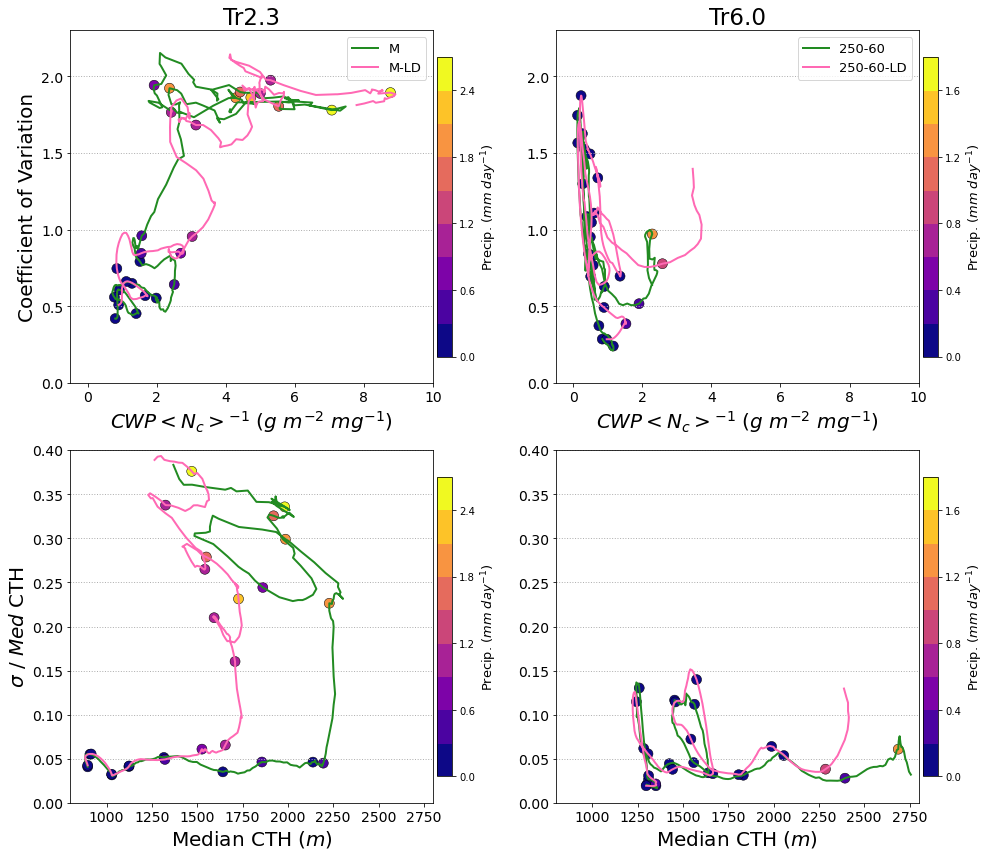

In [26]:
def calc_h_ave(time, ZINV, t_entr):
    len_12 = time[-1] / t_entr + 1
    array_12 = np.arange(0,len_12).astype(float)
    #ZINV_12h = np.arange(0,len_12 - 1).astype(float)
    ZINV_12h = time.copy()
    ZINV_12h[:] = np.nan
    for i in range(int(len_12) - 1):
        tind = np.where( ((time - time[0]) >= array_12[i] * t_entr) & ( (time - time[0]) < array_12[i+1] * t_entr)  )[0]
        ttt  = (array_12[i] * t_entr + array_12[i+1] * t_entr) / 2
        idx  = np.where( abs(time - time[0] - ttt) == np.nanmin( abs(time - time[0] - ttt ) ) )[0]
        ZINV_12h[idx] = np.nanmean(ZINV[tind])
    return ZINV_12h

t_entr = 1 / 4 # in days (= 6 hours) 

####
file3d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_va_48.2Dbin_1.nc')
file3d1 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_BL40_FT40_150_96.2Dbin_1.nc')
file3d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vc_BL_150_96.2Dbin_1.nc')
file3d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_vb_FTNA_150_96.2Dbin_1.nc')
file3d4 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d5 = Dataset('../OUT_2D/CSET_RF06_Tr2p3_96sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_3t_96.2Dbin_1.nc')
file3d6 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_40_40_128.2Dbin_1.nc')
file3d7 = Dataset('../../SAMUWgh-CSET-3D-ProgAer/OUT_2D/CSET_RF06_Tr2p3_256sqx432_100m_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2_128.2Dbin_1.nc')

file3d00 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file3d10 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file3d20 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file3d30 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file3d40 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')
file3d50 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file3d60 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')


###
lb    = ['40-40'     , '40-40to150' , '150-40' , '40-150'     , 'M'            , 'MX3'          ,  '40-40-LD',  'M-LD'\
       , '70-60'     , '250-60'     , '250-200', 'M'          , 'MX3'          , '70-60-LD'     ,  '250-60-LD']

color2= ['slateblue' , 'forestgreen', 'hotpink', 'deepskyblue', 'forestgreen'      , 'darkgoldenrod',  'darkviolet',  'hotpink'\
        ,'slateblue' , 'forestgreen', 'hotpink', 'forestgreen'    , 'darkgoldenrod', 'darkviolet'    , 'hotpink']

fn2   = [file, file1, file2, file3, file4, file5, file6, file7, file00, file10, file20, file30, file40, file50, file60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 150, 100, 100, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6]


fn3d   = [file3d0,  file3d1,  file3d2,  file3d3,  file3d4,  file3d5, file3d6, file3d7,\
         file3d00, file3d10, file3d20, file3d30, file3d40, file3d50, file3d60]
marker2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
marker3 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's']
mrk_siz = [100, 100, 100, 100, 150, 100, 100, 100, 100, 100, 100, 150, 100, 100, 100]
alpha   = [1  , 1  , 1  , 1  , 1  , 1  , 1  , .6 , .6 , .6 , .6 , .6 , .6 , .6 , .6 ]
lw      = ['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2']
###

box = 9
def coef_var(var):
    #mean = np.nanmean(np.nanmean(var, 2), 1)
    #std  = np.nanstd( np.nanstd( var, 2), 1)
    #return smooth(std / mean, box) 
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanstd(var[i,:,:]) / np.nanmean(var[i,:,:])  
#        output[i] = variation(variation(var[i,:,:], 1), 0)
    return smooth(output, box)
    
def domain_mean(var):
    #return smooth( np.nanmean(np.nanmean(var, 2), 1) , box)
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanmean(var[i,:,:])  
    return smooth(output, box)

def std_median(var):
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanstd(var[i,:,:]) / np.nanmedian(var[i,:,:])  
    return smooth(output, box)
    
def domain_median(var):
    output = var[:,0,0].copy()
    output[:] = np.nan
    for i in range(var.shape[0]):
        output[i] = np.nanmedian(var[i,:,:])  
    return smooth(output, box)

################    
fig, axis = plt.subplots(2, 2,figsize=(14,12))

i = 0; j = 0
axis[i,j].set_ylabel('Coefficient of Variation', fontsize = '20')
axis[i,j].set_xlabel('$CWP <N_c>^{-1}$ ($g$ $m^{-2}$ $mg^{-1}$)', fontsize = '20')
axis[i,j].set_title('Tr2.3', fontsize = '23')
#axis[i,j].set_xscale('log')
axis[i,j].set_xlim([-.5, 10])
axis[i,j].set_ylim([0, 2.3])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
#axis[i,j].legend(fontsize = '13')#, loc='lower right')

####
i = 0; j = 1
axis[i,j].set_xlabel('$CWP <N_c>^{-1}$ ($g$ $m^{-2}$ $mg^{-1}$)', fontsize = '20')
axis[i,j].set_title('Tr6.0', fontsize = '23')
axis[i,j].set_xlim([-.5, 10])
axis[i,j].set_ylim([0, 2.3])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)



#######
i = 1; j = 0
axis[i,j].set_ylabel('$σ$ / $Med$ CTH', fontsize = '20')
#axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
#axis[i,j].set_xlim([-.1, 4])
#axis[i,j].set_ylim([0, 22])
axis[i,j].set_xlabel('Median CTH ($m$)', fontsize = '20')
axis[i,j].set_xlim([800, 2800])
axis[i,j].set_ylim([0, .4])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

####
i = 1; j = 1
#axis[i,j].set_xlabel('Precip. ($mm$ $day^{-1}$)', fontsize = '20')
#axis[i,j].set_xlim([-.1, 4])
#axis[i,j].set_ylim([0, 22])
axis[i,j].set_xlabel('Median CTH ($m$)', fontsize = '20')
axis[i,j].set_xlim([800, 2800])
axis[i,j].set_ylim([0, .4])
axis[i,j].tick_params(axis='both', which='major', labelsize=14)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

clevs2 = [np.arange(0, 3.0, .3), np.arange(0, 2., .2)]
ticks2 = [np.arange(0, 3.0, .6), np.arange(0, 2., .4)]
cmap   = plt.cm.plasma
norm   = [matplotlib.colors.BoundaryNorm(clevs2[0], cmap.N),  matplotlib.colors.BoundaryNorm(clevs2[1], cmap.N)]

######
for ii in [4, 7, 9, 14]:
    if ii <= len(fn3d) // 2: j = 0
    else: j = 1

    T3D      = fn3d[ii].variables['time'][:]    # time: day
    NCQCPATH = fn3d[ii].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    QCPATH   = fn3d[ii].variables['QCPATH'][:]  # Column cloud liquid mass (vertically integrated), unit: kg/m2
    Prec     = fn3d[ii].variables['Prec'][:]    # Surface Precip. Rate, unit: mm/day
    ZC       = fn3d[ii].variables['ZC'][:] * 1000 # Cloud top height (Instantaneous): converted to m
##    ISCCPTAU = fn3d[ii].variables['ISCCPTAU'][:] # ISCCP Optical Depth (~670nm, from RRTMG SW band 9: 625-778nm), unitless
#    NCQCPATH[NCQCPATH == 0] = np.nan
#    QCPATH[QCPATH     == 0] = np.nan
#    Prec[Prec         == 0] = np.nan
    ZC[ZC             == 0] = np.nan
    CDNC  = NCQCPATH / QCPATH 
    CDNC  = CDNC * 1e-6    # #/mg
#    CDNC[CDNC.mask == True] = np.nan
    CWP   = QCPATH * 1000  # g/m2
    if ii == len(fn2) // 2:
        CDNC[:50,:,:][CDNC[:50,:,:] > 80] = 80
    t3d   = T3D - int(T3D[0])
    Prec_6h = calc_h_ave(t3d, domain_mean(Prec), t_entr)
    
    m_CWP_CDNC  = domain_mean(CWP / CDNC)
    m_CWP_CDNC[np.isnan(Prec_6h) == 1] = np.nan
    cv_CWP_CDNC = coef_var(CWP / CDNC)
    cv_CWP_CDNC[np.isnan(Prec_6h) == 1] = np.nan
    
    m_ZC  = domain_median(ZC)
    m_ZC[np.isnan(Prec_6h) == 1] = np.nan
    cv_ZC = std_median(ZC)
    cv_ZC[np.isnan(Prec_6h) == 1] = np.nan
    
    
    i = 0
    axis[i,j].plot(domain_mean(CWP / CDNC)[box:-box], coef_var(CWP / CDNC)[box:-box], color=color2[ii], label=lb[ii], linewidth= lw[ii])
    csf1 = axis[i,j].scatter(m_CWP_CDNC, cv_CWP_CDNC, c=Prec_6h, s=100, cmap=cmap, norm=norm[j], edgecolors='k', linewidths=.5)
    if ii == 4 or ii == 9:
        cb1  = plt.colorbar(csf1, ax=axis[i,j], shrink=.85, pad=0.01, ticks=ticks2[j])#, orientation='horizontal')
        cb1.set_label('Precip. ($mm$ $day^{-1}$)', fontsize=13)#, rotation=270)
#    axis[i,j].scatter(domain_mean(CWP / CDNC)[box], coef_var(CWP / CDNC)[box],marker='o', color=color2[ii])
#    axis[i,j].scatter(domain_mean(CWP / CDNC)[-box-1], coef_var(CWP / CDNC)[-box-1],marker='s', color=color2[ii])
    axis[i,j].legend(fontsize = '13')

    i = 1
    axis[i,j].plot(domain_median(ZC)[box:-box], std_median(ZC)[box:-box], color=color2[ii], label=lb[ii], linewidth= lw[ii])
    csf1 = axis[i,j].scatter(m_ZC, cv_ZC, c=Prec_6h, s=100, cmap=cmap, norm=norm[j], edgecolors='k', linewidths=.5)
    if ii == 4 or ii == 9:
        cb1  = plt.colorbar(csf1, ax=axis[i,j], shrink=.85, pad=0.01, ticks=ticks2[j])#, orientation='horizontal')
        cb1.set_label('Precip. ($mm$ $day^{-1}$)', fontsize=13)#, rotation=270)
#    axis[i,j].scatter(domain_median(ZC)[box], std_median(ZC)[box],marker='o', color=color2[ii])
#    axis[i,j].scatter(domain_median(ZC)[-box-1], std_median(ZC)[-box-1],marker='s', color=color2[ii])

       
plt.tight_layout(w_pad=1)
plt.show()    